# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### INDEX

#### 1. Importing necessary libraries and data

#### 2. Data Overview

#### 3.Exploratory Data Analysis (EDA)

a. Statistical summary categorical variables

b. Statistical summary numerical variables

#### 3.1 univariate analysis

1.'Current Price' variable

2.'Price Change' variable

3.'Volatility' variable

4.'ROE' variable

5.'Cash Ratio' variable

6.'Net Cash Flow' variable

7.'Net Income' variable

8.'Earnings Per Share' variable

9.'Estimated Shares Outstanding'variable

10.'P/E Ratio' variable

10.BIS. "P/E_ratio_new" variable

11.'P/B Ratio' variable

12.'Ticker Symbol' Variable

13.'Security' variable

14.'GICS Sector' variable

15.'GICS Sub Industry' variable

#### 3.2 Bivariate analysis

1.Pair plot of all numeric variables

2.Heatmap

3.Current price per Industry

4.'Price chance' per industry

5.Cash Ratio per industry

6.P/E Ratio per industry

7.Volatility per industry

8.'Earnings Per Share' per industry

9.ROE per industry

### 4.Data Preprocessing

a. Outlier check/treatment

b. Scaling data

### 5. K-means Clustering

5.1 K-Means clustering without outlier treatment

5.2 K-Means clustering with outlier treatment

5.3 Choosing 3 as number of clusters for data without outlier treatment

5.4 Cluster Profiling

### 6.Hierarchical Clustering

6.1 Dendrograms

6.2 Choosing the Hierarchical clustering model with 4 clusters

6.3 Cluster profiling

### 7.K-means vs Hierarchical Clustering

### 8.Actionable Insights and Recommendations










## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## 1. Importing necessary libraries and data

In [149]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [150]:
# importing data
data = pd.read_csv(r"C:\Users\charo\Downloads\stock_data.csv")
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


<IPython.core.display.Javascript object>

In [151]:
# Making a copy of the data
df = data.copy()

<IPython.core.display.Javascript object>

In [152]:
# Checking the data
df.sample(5)

Ticker Symbol                   Security             GICS Sector  \
217           MTB             M&T Bank Corp.              Financials   
250           PHM           Pulte Homes Inc.  Consumer Discretionary   
241          PCAR                PACCAR Inc.             Industrials   
239          PBCT  People's United Financial              Financials   
62            CHK          Chesapeake Energy                  Energy   

                                GICS Sub Industry  Current Price  \
217                                         Banks        121.180   
250                                  Homebuilding         17.820   
241  Construction & Farm Machinery & Heavy Trucks         47.400   
239                    Thrifts & Mortgage Finance         16.150   
62                           Integrated Oil & Gas          4.500   

     Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
217        -0.362       1.380    7          99       -5317000   1079667000   
250        -5.564       1.695   10          25     -533785000    494090000   
241        -9.317       1.440   23         110      278800000   1604000000   
239         3.129       1.133    5          99     -298400000    260100000   
62        -38.102       4.560  687          22    -3283000000 -14685000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
217               7.220                 149538365.700     16.784     -0.938  
250               1.380                 358036231.900     12.913     -0.308  
241               4.520                 354867256.600     10.487      6.291  
239               0.860                 302441860.500     18.779     -0.427  
62              -22.430                 654703522.100     28.408     -1.841

<IPython.core.display.Javascript object>

## 2.Data Overview

- Observations
- Sanity checks

In [153]:
# checking the structure of the data
df.shape

(340, 15)

<IPython.core.display.Javascript object>

In [154]:
print(f" The data set contains {df.shape[0]} rows and {df.shape[1]} columns")

 The data set contains 340 rows and 15 columns


<IPython.core.display.Javascript object>

In [155]:
# Checking for data type of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

- The data set contains 15 columns that include 4 object type predictors and 11 numeric type variables (from which 4 are integers and the rest are float type variables). 
- In order to avoid future issues working with object type variables, we are changing them into categories.

In [156]:
#  let's convert object type variables in categories.

col_cat = df.select_dtypes("object").columns

for i in col_cat:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

In [157]:
# let's check the changes in data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

<IPython.core.display.Javascript object>

- Now the data set contains 4 categories and 11 numerical variables.

In [158]:
# checking for duplicated data

df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- We do not have any duplicates in the data set.

In [159]:
# checking for null values

df.isnull().any()

Ticker Symbol                   False
Security                        False
GICS Sector                     False
GICS Sub Industry               False
Current Price                   False
Price Change                    False
Volatility                      False
ROE                             False
Cash Ratio                      False
Net Cash Flow                   False
Net Income                      False
Earnings Per Share              False
Estimated Shares Outstanding    False
P/E Ratio                       False
P/B Ratio                       False
dtype: bool

<IPython.core.display.Javascript object>

- There is not null data in the data set.

## 3.Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

- 1. What does the distribution of stock prices look like? 
    **Answer: please refer to: Univariate EDA section 1.'Current price' variable and Bivariate EDA section 3. 'Current price per industry'**

- 2. The stocks of which economic sector have seen the maximum price increase on average?
    **Answer: please refer to: Bivariate EDA section 4.'Price Change' per industry**

- 3. How are the different variables correlated with each other? 
    **Answer: please refer to: Bivariate EDA section 2. Heatmap**

- 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**Answer: please refer to: Bivariate EDA section 5. Cash ratio per industry**

- 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across  economic sectors? **Answer: please refer to: Bivariate EDA section 6. P/E ratio per industry**



### a.. Statistical  summary categorical variables

In [160]:
# Let's check the stats summary for categorical variables.
df.describe(include="category")

Ticker Symbol    Security  GICS Sector  \
count            340         340          340   
unique           340         340           11   
top              AAL  3M Company  Industrials   
freq               1           1           53   

                         GICS Sub Industry  
count                                  340  
unique                                 104  
top     Oil & Gas Exploration & Production  
freq                                    16

<IPython.core.display.Javascript object>

In [161]:
# checking the differetn symbols in descendind order
df["Ticker Symbol"].value_counts().sort_values(ascending=False).head()

AAL     1
AIG     1
ABT     1
ADBE    1
ADI     1
Name: Ticker Symbol, dtype: int64

<IPython.core.display.Javascript object>

In [162]:
# checking the security names in descendind order
df["Security"].value_counts().sort_values(ascending=False).head()

3M Company              1
Alaska Air Group Inc    1
AMETEK Inc              1
AT&T Inc                1
AbbVie                  1
Name: Security, dtype: int64

<IPython.core.display.Javascript object>

In [163]:
df["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

<IPython.core.display.Javascript object>

In [164]:
# showing the twenty-five first subindustries in the data.
df["GICS Sub Industry"].value_counts().head(25)

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Internet Software & Services                       12
Electric Utilities                                 12
MultiUtilities                                     11
Health Care Equipment                              11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Semiconductors                                      6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Diversified Chemicals                               5
Consumer Finance                                    5
Industrial Machinery                                5
Health Care Facilities      

<IPython.core.display.Javascript object>

**Observations**

- We can observe the data set includes 40 companies’ financial products (securities) with different Ticker Symbol assigned to each one.
- The data base contains 340 companies that belong to different industries.

- The industrial sector is the one that groups the greatest number of companies (53 companies), followed by financial services and consumer discretionary and healthcare.

- GICS Sub Industry' refers to the number of different sub-industry types available in the data, which appears to be 104 different subindustry fields. The most common is 'Oil & Gas Exploration & Production' followed by 'REITS'(Real estate investment),’ industrial conglomerates’, ‘internet software and electric utilities’. ‘Healthcare equipment’ and’ banks’ are also very frequently found among the investment fields

### b. Statistical  summary numerical variables

In [165]:
# Let's check the stats summary for numeric variables.
df.describe().T


count           mean            std  \
Current Price                340.000         80.862         98.055   
Price Change                 340.000          4.078         12.006   
Volatility                   340.000          1.526          0.592   
ROE                          340.000         39.597         96.548   
Cash Ratio                   340.000         70.024         90.421   
Net Cash Flow                340.000   55537620.588 1946365312.176   
Net Income                   340.000 1494384602.941 3940150279.328   
Earnings Per Share           340.000          2.777          6.588   
Estimated Shares Outstanding 340.000  577028337.754  845849595.418   
P/E Ratio                    340.000         32.613         44.349   
P/B Ratio                    340.000         -1.718         13.967   

                                          min            25%           50%  \
Current Price                           4.500         38.555        59.705   
Price Change                          -47.130         -0.939         4.820   
Volatility                              0.733          1.135         1.386   
ROE                                     1.000          9.750        15.000   
Cash Ratio                              0.000         18.000        47.000   
Net Cash Flow                -11208000000.000 -193906500.000   2098000.000   
Net Income                   -23528000000.000  352301250.000 707336000.000   
Earnings Per Share                    -61.200          1.558         2.895   
Estimated Shares Outstanding     27672156.860  158848216.100 309675137.800   
P/E Ratio                               2.935         15.045        20.820   
P/B Ratio                             -76.119         -4.352        -1.067   

                                        75%             max  
Current Price                        92.880        1274.950  
Price Change                         10.695          55.052  
Volatility                            1.696           4.580  
ROE                                  27.000         917.000  
Cash Ratio                           99.000         958.000  
Net Cash Flow                 169810750.000 20764000000.000  
Net Income                   1899000000.000 24442000000.000  
Earnings Per Share                    4.620          50.090  
Estimated Shares Outstanding  573117457.325  6159292035.000  
P/E Ratio                            31.765         528.039  
P/B Ratio                             3.917         129.065

<IPython.core.display.Javascript object>

 **Observations**:
The numeric stats information will provide indicators for the global portfolio of the securities included by Trade&Ahead consultancy firm. Even though customers may decide to invest in several of the financial products include, the information will provide with a generic trend of the market for the overall selection. Later we will have to analyze the data more in detail because the behavior of each of the stocks selected may be very different from one another. 

- The market price mean value for all the selected securities is 80.86 dollars. The price range varies significantly from the minimum value is 4.5 dollars to the maximum price 1274.85 dollars. Since mean is greater than median, we can tell the distribution is highly right skewed. Also, we may consider outliers, especially in the upper values of the distribution.
    
- Price change variable register the overall percentage change in the last two weeks (13 days to be exact) for the different products. In average the overall selection increase 4 percent in the last 13 days. This is not the case for all the securities, as we can see the mean and median values are very close so the chance price may be normally distributed. The range of values goes from a decrease of 47 percent to a maximum value of increase 55 percent in the last 13 months. when comparing both extreme values with the first quartile (9 percent decrease) the third quartile (10 percent increase), the maximum and minimum values are indicating that we have outliers.
   
- Volatility is referring to the standard deviation of the stock prices in the last 13 days. The volatility of the products will be also associated to the risk. The most volatile the riskier the investment. In our case, the mean value and the median values are very similar (1.5 and 1.35 respectively). Also, we can see the present of outliers in both extremes of the distribution. A priori it seems to be normally distributed.
    
- ROE.The return of equity will tell you how well the money is invested( the income of the security / total assets).The overall average performance of the dataset is 39.5 per cent. This distribution is highly right skewed with present of outliers in the upper values of the distribution. The mean value and median value for ROE are very different. The minimum value registered is 1 percent, which is a very low performance, and the best performance item will provide with a ROE of 917 percent.

- Cash Ratio. The cash ratio measures the percentage of cash available to cover the company liabilities. The mean value is 70% what means that the cash available at the time would cover up to 70% of the liabilities for the overall list of companies included. Since the median value is much smaller than the mean (40 vs 70 percent) we can expect a right skewed distribution. AS per the maximum value reported for Cash ratio, we can see how there are outlier in the upper extreme of the distribution.

- Net cash flow. This measure is important to know the input (from sales or loans) of cash and the output of cash and it is vital for a company to grow and survive. This variable is very high skewed, since the mean value is 55.5 million dollars and the median value is much smaller, around 2 million. The data is very dispersed with a minimum value of -11,208 million dollars (outflows surpass inflow, which is a terrible situation) and on the opposite side, a maximum value of 20,700 million dollars.

- Net income. Net income is talking about the profitability of the company for a period of time. All incomes minus all expenditure, taxes and interest. With a mean value of 1,494 million dollars, the mean value is far greater than the median value with 707 million dollars, therefore this distribution is right skewed. We can see outliers in both extremes since the maximum and minimum values are very far from the Q3 and Q1 quartiles respectively. million dollars.

- Earnings Per Share: This variable is providing with the net income per share. So, it will explain how much income each share is producing. The mean value per share would be 2.7 dollars, while median value is very similar, 2.8 dollars per share. There are outliers in both extremes but specially in the lower values of the distribution. The data is very dispersed.

- Estimated Shares Outstanding. The number of shares in each company differs considerable from one to others. The mean number of stocks per company is 577 million and the median value is only 309 million, so the distribution is right skewed. The minimum quantity is 27 million of shares and the maximum is 6,159 shares. Definitely, we can expect to find outliers in this distribution.

- P/E Ratio is the stock current market price value divided by the earning per share. The mean value of this distribution is 32.6 per cent and the mean value is 20.8 per cent. We can expect a right skewed distribution with outliers in the upper values of the distribution.

- P/B Ratio is the ratio between the stock price divided by balance sheet value. the mean value is negative -1.7 per cent, so the average value of the distribution is telling us that some companies hold a negative book value, their liabilities exceed their asset value which is a sign of financial stress. The median value is -1 per cent so the distribution in this case is slightly left skewed. There are outliers in both extremes of the distribution.




## 3.1 univariate analysis

### NUMERIC VARIABLES

### 1.'Current Price' variable


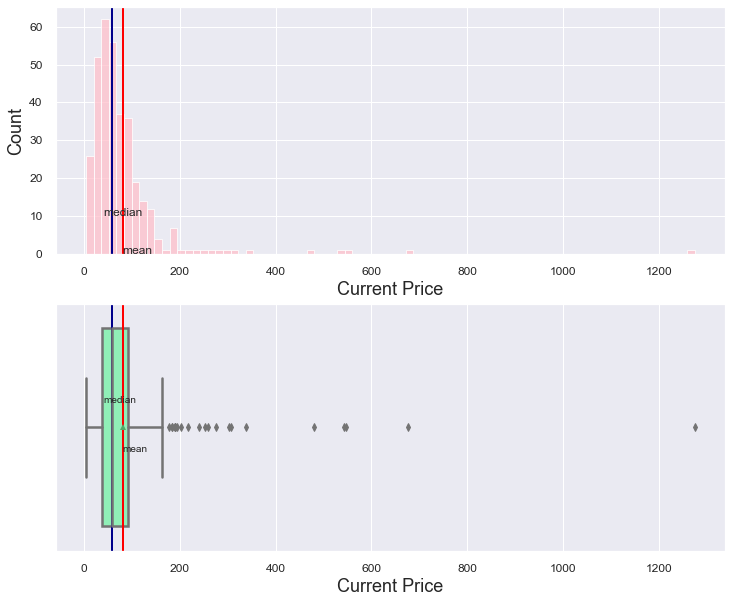

<IPython.core.display.Javascript object>

In [166]:
plt.figure(figsize=(12, 10))#plot size

plt.subplot(2, 1, 1)#subplot 1
sns.histplot(data=df, x=df['Current Price'], stat='count', color="pink", bins=80)
plt.axvline(x=59.7, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=80.8, linewidth=2, color="red")  # we draw the mean value
plt.text(x=40, y=10, s="median", fontsize=12)  # we add text on the plot with names for the lines
plt.text(x=81, y=0.1, s="mean", fontsize=12)  # we add text on the plot with names for the lines
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(2, 1, 2)#subplot 2
sns.boxplot(
    data=df,
    x=df['Current Price'],
    showmeans=True,
    linewidth=2.5,
    palette="rainbow")
plt.axvline(x=59.7, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=80.8, linewidth=2, color="red")  # we draw the mean value
plt.text(x=40, y=-0.1, s="median",fontsize=10)  # we add text on the plot with names for the lines
plt.text(x=81, y=0.1, s="mean",fontsize=10)  # we add text on the plot with names for the lines
plt.xticks(size = 12)# change size x axis
plt.yticks(size = 12)# change size y axis
plt.show()


**Observations:**
**What does the distribution of stock prices look like?**

- The distribution is right skewed and we can see most of the finalcial items price is under 100 dollars. 
- In the upper values of distribution we can see outliers with a maximum price of more than 1200 dollars.

### 2.'Price Change' variable

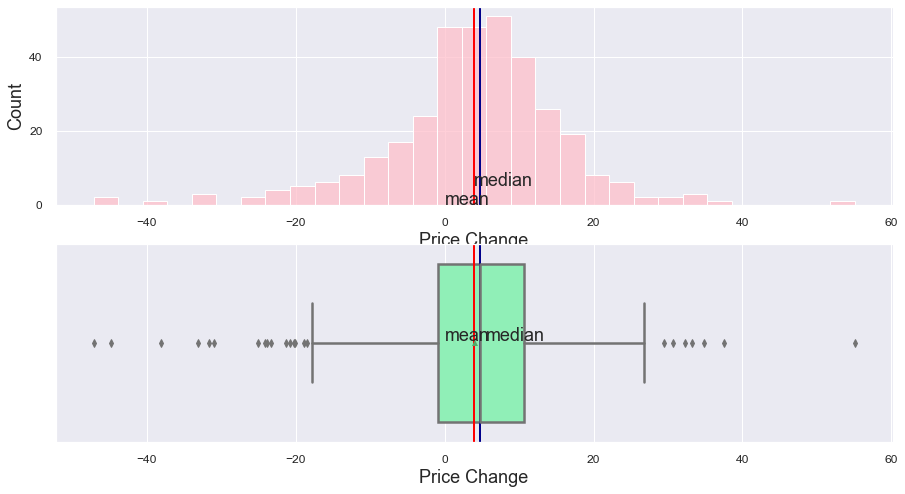

<IPython.core.display.Javascript object>

In [167]:
plt.figure(figsize=(15, 8))#plot size

plt.subplot(2, 1, 1)#subplot 1
sns.histplot(data=df, x=df['Price Change'], stat='count', color="pink")
plt.axvline(x=4.7, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=4, linewidth=2, color="red")  # we draw the mean value
plt.text(x=4, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=0, y=0, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.subplot(2, 1, 2)#subplot 2
sns.boxplot(
    data=df,
    x=df['Price Change'],
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",)
plt.axvline(x=4.7, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=4, linewidth=2, color="red")  # we draw the mean value
plt.text(x=5.5, y=-0.01, s="median")  # we add text on the plot with names for the lines
plt.text(x=-0.02, y=-0.01, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size = 12)# change size x axis
plt.yticks(size = 12)# change size y axis
plt.show()


**Observations:**
    
- The price change distribution shows an almost bell-shaped distribution with outlier on both extremes.
- The price change for the overall portfolio gained 4 per cent in the last 13 days.
- There are securities prices increased above the average, and others that registered a decrease in terms of price for the  mentioned period.
- For the most part the global price of all securities increased.
- on the upper extreme of the distribution, we can find stocks with a price increase on the range of 30 to 58 percent.
- on the lower outliers, the data registered for some stocks a fall on the price from 20 to 45 percent.


### 3.'Volatility' variable

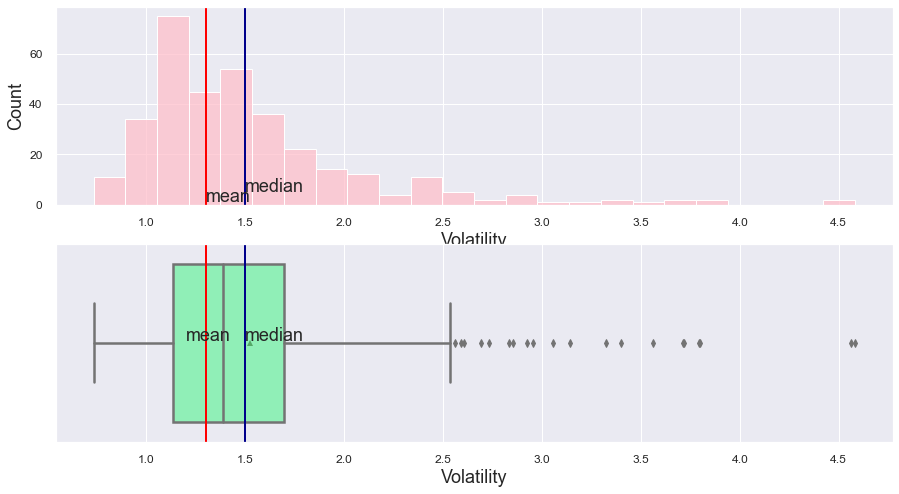

<IPython.core.display.Javascript object>

In [168]:
plt.figure(figsize=(15, 8))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(data=df, x=df["Volatility"], stat="count", color="pink")
plt.axvline(x=1.5, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=1.3, linewidth=2, color="red")  # we draw the mean value
plt.text(x=1.5, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=1.3, y=1, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df, x=df["Volatility"], showmeans=True, linewidth=2.5, palette="rainbow",
)
plt.axvline(x=1.5, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=1.3, linewidth=2, color="red")  # we draw the mean value
plt.text(x=1.5, y=-0.01, s="median")  # we add text on the plot with names for the lines
plt.text(x=1.2, y=-0.01, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

**Observations**:
- Most of the stock volatility concentrates around 1.5 and 1 values. 
- The volatility data is very dispersed; we can find values in the range of 0.5 to 4.5.
- The distribution is right skewed and there are lots of outliers on the upper values of the distribution.
- Volatility is showing how quick the prices move in the last 13 days, so higher volatility is associated to riskier financial products.



### 4.'ROE' variable

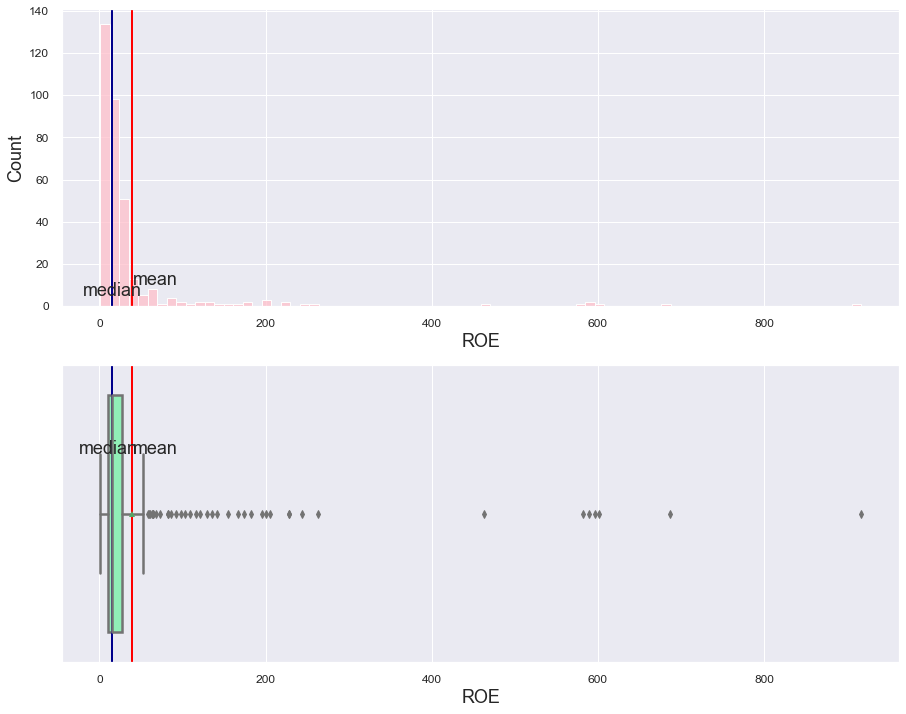

<IPython.core.display.Javascript object>

In [169]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(data=df, x=df["ROE"], stat="count", color="pink", bins=80)
plt.axvline(x=15, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=39, linewidth=2, color="red")  # we draw the mean value
plt.text(x=-20, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=40, y=10, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df, x=df["ROE"], showmeans=True, linewidth=2.5, palette="rainbow",
)
plt.axvline(x=15, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=39, linewidth=2, color="red")  # we draw the mean value
plt.text(x=-25, y=-0.2, s="median")  # we add text on the plot with names for the lines
plt.text(x=40, y=-0.2, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

- ROE represent how good the company is doing in getting returns in relation with the equity invested. In general terms, the higher the ratio, the most capacity a business has to generate returns, but this always has to be put into context and compare with the average ROE of the industry.

- The ROE distribution is highly right skewed, the average return level for all the items included in the dataset is 39.4 percent but this result is obviously being affected by the outliers on the upper extreme of the distribution.

- In this case medium value may be more representative of the average value. The median value of the ROE variable is 15 percent. So, in general the shares included in the data set manage to generate 15 per cent of return over the company equity. 

- Outliers on the upper values of the ROE variable are showing a much higher return, we can see a group of stock for which ROE was above 400 and a maximum value of 950.



### 5.'Cash Ratio' variable.

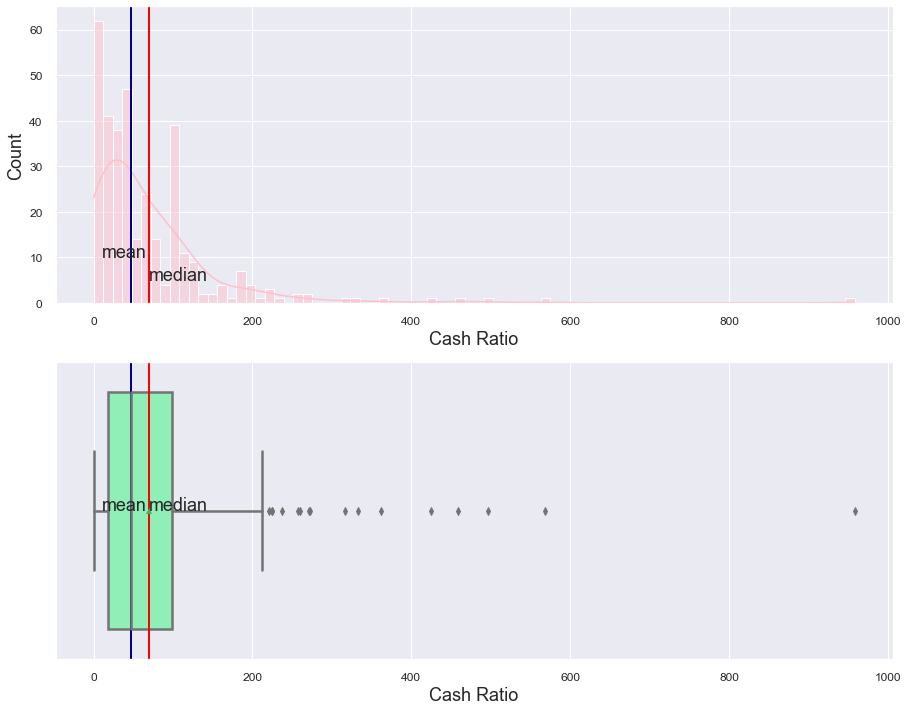

<IPython.core.display.Javascript object>

In [170]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(data=df, x=df["Cash Ratio"], stat="count", color="pink", bins=80, kde=True)
plt.axvline(x=47, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=70, linewidth=2, color="red")  # we draw the mean value
plt.text(x=70, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=10, y=10, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df, x=df["Cash Ratio"], showmeans=True, linewidth=2.5, palette="rainbow",
)
plt.axvline(x=47, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=70, linewidth=2, color="red")  # we draw the mean value
plt.text(x=70, y=0, s="median")  # we add text on the plot with names for the lines
plt.text(x=10, y=0, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

**Observations**:

- Most of  the companies cash ratio is around 47 per cent, that means that in general the mentioned companies keep enough cash or liquidity to cover the 45 per cent of their liabilities. Since we have so many outliers, the median is a much better representation of the data than the mean, which is highly affected for the upper values.

- We can see an important variation in the data, a second group of the data concentrates around the 100% value, that means that some companies, more conservative, would hold enough cash (liquidity) to cover liabilities in case of need.

- some of the outliers are showing another group of companies that hold much more cash than necessary to cover liabilities, it may depend on the industry, and we will need to further study this matter.


### 6.'Net Cash Flow' variable.

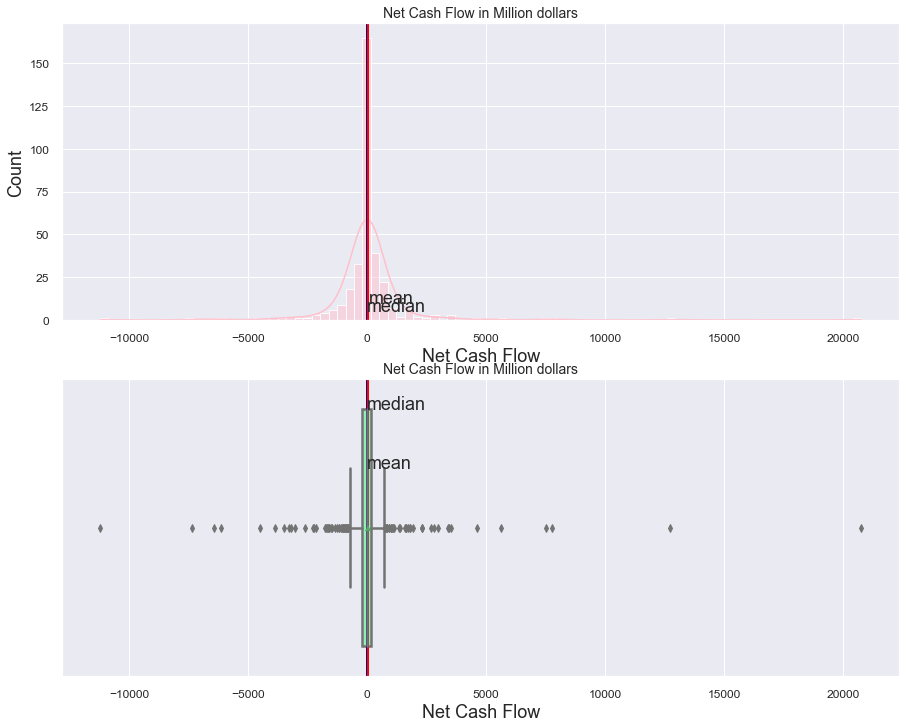

<IPython.core.display.Javascript object>

In [171]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(
    data=df,
    x=df["Net Cash Flow"] / 1000000,
    stat="count",
    color="pink",
    bins=90,
    kde=True,
)
plt.axvline(
    x=2098000 / 1000000, linewidth=2, color="darkblue"
)  # we draw the median value
plt.axvline(x=55537620 / 1000000, linewidth=2, color="red")  # we draw the mean value
plt.text(
    x=2098000 / 1000000, y=5, s="median"
)  # we add text on the plot with names for the lines
plt.text(
    x=55537620 / 1000000, y=10, s="mean"
)  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Net Cash Flow in Million dollars", fontsize=14)
plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df,
    x=df["Net Cash Flow"] / 1000000,
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",
)
plt.axvline(
    x=2098000 / 1000000, linewidth=2, color="darkblue"
)  # we draw the median value
plt.axvline(x=55537620 / 1000000, linewidth=2, color="red")  # we draw the mean value
plt.text(x=0, y=-0.40, s="median")  # we add text on the plot with names for the lines
plt.text(x=0, y=-0.2, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.title("Net Cash Flow in Million dollars", fontsize=14)
plt.show()

**Observations**:

- Net cash flow distribution is plotting the net value of cash inputs (sales or loans) and cash outputs (liabilities/payments). 
- The average value for net cash flow is near 55 million dollars, and the median value is 22 million dollars. The distribution values are concentrated in the middle area, and it is almost normally distributed.
- We cans see outliers in both extreme of the distribution. Regulations and business activity may request certain sectors to keep more cash available than others.
- The lower extreme of the distribution is showing negative values, some of them relatively high. This is obviously not desirable; it can be a sign of financial stress for some the companies.


### 7.'Net Income' variable

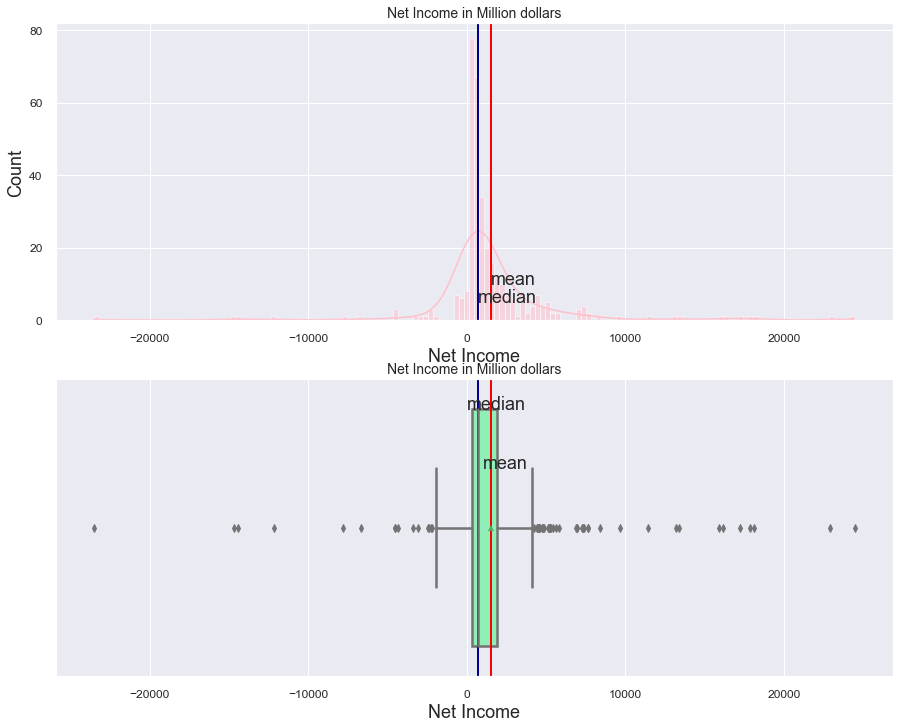

<IPython.core.display.Javascript object>

In [172]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(
    data=df,
    x=df["Net Income"] / 1000000,
    stat="count",
    color="pink",
    bins=150,
    kde=True,
)
plt.axvline(
    x=707336000 / 1000000, linewidth=2, color="darkblue"
)  # we draw the median value
plt.axvline(x=1494384602 / 1000000, linewidth=2, color="red")  # we draw the mean value
plt.text(
    x=707336000 / 1000000, y=5, s="median"
)  # we add text on the plot with names for the lines
plt.text(
    x=1494384602 / 1000000, y=10, s="mean"
)  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Net Income in Million dollars", fontsize=14)
plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df,
    x=df["Net Income"] / 1000000,
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",
)
plt.axvline(
    x=707336000 / 1000000, linewidth=2, color="darkblue"
)  # we draw the median value
plt.axvline(x=1494384602 / 1000000, linewidth=2, color="red")  # we draw the mean value
plt.text(x=0, y=-0.40, s="median")  # we add text on the plot with names for the lines
plt.text(x=1000, y=-0.2, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.title("Net Income in Million dollars", fontsize=14)
plt.show()

In [173]:
# Checking negative earning per share values
sub_net_income_neg = df[df["Net Income"] < 0]
sub_net_income_neg.sample(10)

Ticker Symbol                 Security GICS Sector  \
222           NBL         Noble Energy Inc      Energy   
117           ETR            Entergy Corp.   Utilities   
323           WMB            Williams Cos.      Energy   
30            APA       Apache Corporation      Energy   
31            APC  Anadarko Petroleum Corp      Energy   
227           NFX  Newfield Exploration Co      Energy   
74            CNP       CenterPoint Energy   Utilities   
328           XEC           Cimarex Energy      Energy   
62            CHK        Chesapeake Energy      Energy   
267           RRC    Range Resources Corp.      Energy   

                      GICS Sub Industry  Current Price  Price Change  \
222  Oil & Gas Exploration & Production         32.930         7.299   
117                  Electric Utilities         68.360         4.911   
323  Oil & Gas Exploration & Production         25.700       -30.988   
30   Oil & Gas Exploration & Production         44.470        11.398   
31   Oil & Gas Exploration & Production         48.580       -20.802   
227  Oil & Gas Exploration & Production         32.560        -3.297   
74                       MultiUtilities         18.360         1.436   
328  Oil & Gas Exploration & Production         89.380       -14.403   
62                 Integrated Oil & Gas          4.500       -38.102   
267  Oil & Gas Exploration & Production         24.610       -25.107   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
222       2.509   24          57     -155000000  -2441000000   
117       1.217    2          44      -71065000   -156734000   
323       3.720    9           4     -140000000   -571000000   
30        2.405  917          80      698000000 -23528000000   
31        2.435   52          22    -6430000000  -6692000000   
227       2.422  244           1       -9000000  -3362000000   
74        1.390   20          43      -34000000   -692000000   
328       2.398   86         190      373520000  -2408948000   
62        4.560  687          22    -3283000000 -14685000000   
267       3.713   26           0          23000   -713685000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
222              -6.070                 402141680.400     93.089      1.171  
117              -0.990                 158317171.700     18.457      6.174  
323              -0.760                 751315789.500     93.089    -14.561  
30              -61.200                 384444444.400     93.089      4.971  
31              -13.180                 507738998.500     93.089    -12.861  
227             -21.180                 158734655.300     93.089     -0.139  
74               -1.610                 429813664.600     17.313      0.517  
328             -25.920                  92937808.640     93.089      7.186  
62              -22.430                 654703522.100     28.408     -1.841  
267              -4.290                 166360139.900     93.089      0.525

<IPython.core.display.Javascript object>

In [174]:
# checking negative net income securities
sub_net_income_neg.groupby(["Security", "GICS Sub Industry"])[
    ["Net Income"]
].mean().sort_values(by="Net Income", ascending=True).head(20)

Net Income
Security                    GICS Sub Industry                                  
Apache Corporation          Oil & Gas Exploration & Production -23528000000.000
Chesapeake Energy           Integrated Oil & Gas               -14685000000.000
Devon Energy Corp.          Oil & Gas Exploration & Production -14454000000.000
Freeport-McMoran Cp & Gld   Copper                             -12156000000.000
Occidental Petroleum        Oil & Gas Exploration & Production  -7829000000.000
Anadarko Petroleum Corp     Oil & Gas Exploration & Production  -6692000000.000
Southwestern Energy         Oil & Gas Exploration & Production  -4556000000.000
EOG Resources               Oil & Gas Exploration & Production  -4524515000.000
Yahoo Inc.                  Internet Software & Services        -4359082000.000
Newfield Exploration Co     Oil & Gas Exploration & Production  -3362000000.000
Hess Corporation            Integrated Oil & Gas                -3056000000.000
Noble Energy Inc            Oil & Gas Exploration & Production  -2441000000.000
Cimarex Energy              Oil & Gas Exploration & Production  -2408948000.000
Murphy Oil                  Integrated Oil & Gas                -2270833000.000
Marathon Oil Corp.          Oil & Gas Exploration & Production  -2204000000.000
Baker Hughes Inc            Oil & Gas Equipment & Services      -1967000000.000
National Oilwell Varco Inc. Oil & Gas Equipment & Services       -769000000.000
Range Resources Corp.       Oil & Gas Exploration & Production   -713685000.000
CenterPoint Energy          MultiUtilities                       -692000000.000
Halliburton Co.             Oil & Gas Equipment & Services       -671000000.000

<IPython.core.display.Javascript object>

**Observations:**

- Net income distribution is informing us about the profitability of the different companies after taxes and interest deducted.
- This distribution is asymmetrical but at the same time we can see the’ kde’ plot follows a normal distribution.
- There are outliers that shows very bad results for some companies, with a minimum of -23,000 million dollars. Those companies are showing very bad results since their net income is negative.
- As per our additional research, the negative values belong for the most part to the oil and gas explotaion industry.
- On the upper extreme of the distribution we can see values with very positive results, with a maximum of 24,000 million dollars, those are companies that a priori seems to be very profitable.
- Most of the companies included in the dataset show a net income in the range of o to 2,500 million dollars.





### 8.'Earnings Per Share' variable

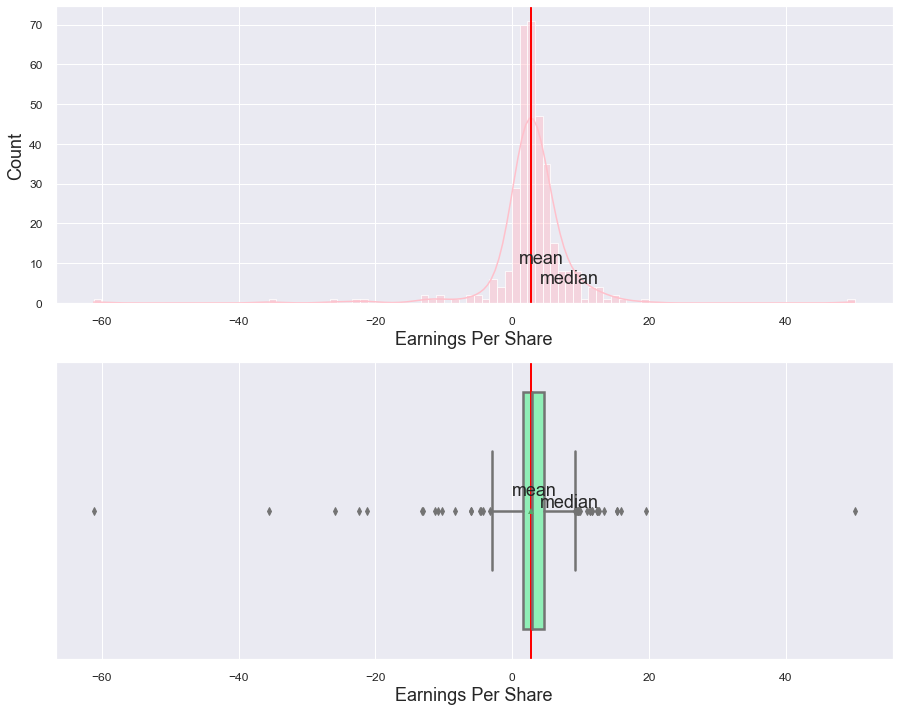

<IPython.core.display.Javascript object>

In [175]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(
    data=df, x=df["Earnings Per Share"], stat="count", color="pink", bins=100, kde=True
)
plt.axvline(x=2.8, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=2.7, linewidth=2, color="red")  # we draw the mean value
plt.text(x=4, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=1, y=10, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df,
    x=df["Earnings Per Share"],
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",
)
plt.axvline(x=2.8, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=2.7, linewidth=2, color="red")  # we draw the mean value
plt.text(x=4, y=-0.01, s="median")  # we add text on the plot with names for the lines
plt.text(x=0, y=-0.05, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

**NEGATIVE EARNING PER SHARE**

In [176]:
# Checking negative earning per share values
sub_earning = df[df["Earnings Per Share"] < 0]
sub_earning.head()

Ticker Symbol                 Security  GICS Sector  \
30           APA       Apache Corporation       Energy   
31           APC  Anadarko Petroleum Corp       Energy   
33          ARNC              Arconic Inc  Industrials   
44           BHI         Baker Hughes Inc       Energy   
49           BSX        Boston Scientific  Health Care   

                     GICS Sub Industry  Current Price  Price Change  \
30  Oil & Gas Exploration & Production         44.470        11.398   
31  Oil & Gas Exploration & Production         48.580       -20.802   
33                 Aerospace & Defense          7.399         1.648   
44      Oil & Gas Equipment & Services         46.150       -12.312   
49               Health Care Equipment         18.440        11.758   

    Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
30       2.405  917          80      698000000 -23528000000   
31       2.435   52          22    -6430000000  -6692000000   
33       2.592    3          37       42000000   -322000000   
44       2.560   12          84      584000000  -1967000000   
49       1.492    4          13     -268000000   -239000000   

    Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
30             -61.200                 384444444.400     93.089      4.971  
31             -13.180                 507738998.500     93.089    -12.861  
33              -0.310                1038709677.000     18.688      2.640  
44              -4.490                 438084632.500     93.089     13.491  
49              -0.180                1327777778.000     31.469     -3.881

<IPython.core.display.Javascript object>

In [177]:
# showing negative earning per share base on industry
sub_earning.groupby(["Security", "GICS Sub Industry"])[[
    "Earnings Per Share"
]].mean().sort_values(by="Earnings Per Share", ascending=True).head(20)


Earnings Per Share
Security                    GICS Sub Industry                                     
Apache Corporation          Oil & Gas Exploration & Production             -61.200
Devon Energy Corp.          Oil & Gas Exploration & Production             -35.550
Cimarex Energy              Oil & Gas Exploration & Production             -25.920
Chesapeake Energy           Integrated Oil & Gas                           -22.430
Newfield Exploration Co     Oil & Gas Exploration & Production             -21.180
Anadarko Petroleum Corp     Oil & Gas Exploration & Production             -13.180
Murphy Oil                  Integrated Oil & Gas                           -13.030
Freeport-McMoran Cp & Gld   Copper                                         -11.310
Hess Corporation            Integrated Oil & Gas                           -10.780
Occidental Petroleum        Oil & Gas Exploration & Production             -10.230
EOG Resources               Oil & Gas Exploration & Production              -8.290
Southwestern Energy         Oil & Gas Exploration & Production              -6.070
Noble Energy Inc            Oil & Gas Exploration & Production              -6.070
Yahoo Inc.                  Internet Software & Services                    -4.640
Baker Hughes Inc            Oil & Gas Equipment & Services                  -4.490
Range Resources Corp.       Oil & Gas Exploration & Production              -4.290
Marathon Oil Corp.          Oil & Gas Exploration & Production              -3.260
L-3 Communications Holdings Industrial Conglomerates                        -2.970
Discovery Communications-A  Cable & Satellite                               -2.430
Charter Communications      Cable & Satellite                               -2.430

<IPython.core.display.Javascript object>

**OUTSTANDING EARNING PER SHARE**

In [178]:
# Checking negative earning per share values
sub_earning_plus = df[df["Earnings Per Share"] > 10]
sub_earning_plus.head()

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
45           BIIB         BIOGEN IDEC Inc.             Health Care   
70            CMG   Chipotle Mexican Grill  Consumer Discretionary   
140          GILD          Gilead Sciences             Health Care   
146           GWW     Grainger (W.W.) Inc.             Industrials   

        GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0                Airlines         42.350        10.000       1.687  135   
45          Biotechnology        306.350         4.918       1.826   38   
70            Restaurants        479.850       -33.131       2.474   22   
140         Biotechnology        101.190         2.689       1.494   98   
146  Industrial Materials        202.590        -5.336       1.349   34   

     Cash Ratio  Net Cash Flow   Net Income  Earnings Per Share  \
0            51     -604000000   7610000000              11.390   
45          133      148900000   3547000000              15.380   
70          237     -171460000    475602000              15.300   
140         148     2824000000  18108000000              12.370   
146          16       63492000    768996000              11.690   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                   668129938.500      3.718     -8.784  
45                  230624187.300     19.919      0.163  
70                   31085098.040     31.363     17.201  
140                1463864188.000      8.180      3.159  
146                  65782378.100     17.330     12.113

<IPython.core.display.Javascript object>

In [179]:
#Checking the industries with better performance based on earning per share
sub_earning_plus.groupby(['Security',"GICS Sub Industry"])[["Earnings Per Share"]].mean().sort_values(by="Earnings Per Share",
    ascending=False
).head(10)


Earnings Per Share
Security                        GICS Sub Industry                                                  
Priceline.com Inc               Internet & Direct Marketing Retail                           50.090
United Continental Holdings     Airlines                                                     19.520
Intuitive Surgical Inc.         Health Care Equipment                                        15.870
BIOGEN IDEC Inc.                Biotechnology                                                15.380
Chipotle Mexican Grill          Restaurants                                                  15.300
International Business Machines IT Consulting & Other Services                               13.480
Mettler Toledo                  Life Sciences Tools & Services                               12.750
Tesoro Petroleum Co.            Oil & Gas Refining & Marketing & Transportation              12.500
Gilead Sciences                 Biotechnology                                                12.370
Prudential Financial            Diversified Financial Services                               12.370

<IPython.core.display.Javascript object>

In [180]:
# Checking the industries with better performance based on earning per share
sub_earning_plus.groupby("Security")["Earnings Per Share"].mean().sort_values(
    ascending=False
).head(10)

Security
Priceline.com Inc                 50.090
United Continental Holdings       19.520
Intuitive Surgical Inc.           15.870
BIOGEN IDEC Inc.                  15.380
Chipotle Mexican Grill            15.300
International Business Machines   13.480
Mettler Toledo                    12.750
Tesoro Petroleum Co.              12.500
Gilead Sciences                   12.370
Prudential Financial              12.370
Name: Earnings Per Share, dtype: float64

<IPython.core.display.Javascript object>

**Observations**:
- Most of the earning per share are distributed around the mean and median values that are very similar (2.7 and 2.8 dollars per share.
- We can see outlier in both extreme of the distribution, with a maximum earning per share around 50 dollars. The minimum value is below -60 dollars per share, what is an obvious sign of financial issues.
- According to the additional analysis, the lowest values belong securities from Energy and Gas industry and communication sector.
- Best earning per share securities belong to travel and leisure industry, financial sector and health industry.


### 9.'Estimated Shares Outstanding' variable

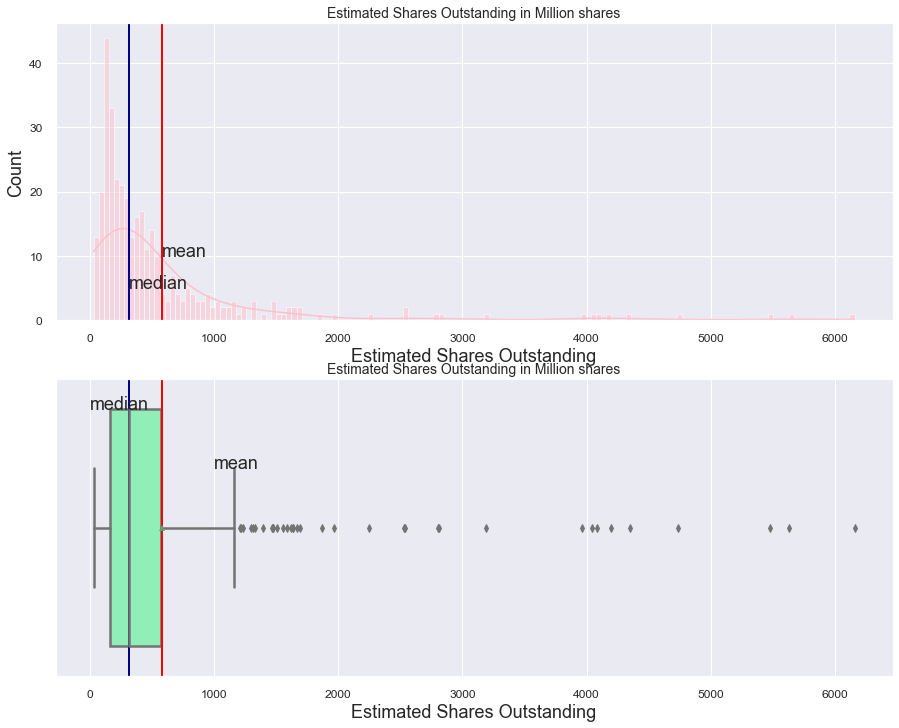

<IPython.core.display.Javascript object>

In [181]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(
    data=df,
    x=df["Estimated Shares Outstanding"] / 1000000,
    stat="count",
    color="pink",
    bins=150,
    kde=True,
)
plt.axvline(
    x=309675137 / 1000000, linewidth=2, color="darkblue"
)  # we draw the median value
plt.axvline(x=577028337 / 1000000, linewidth=2, color="red")  # we draw the mean value
plt.text(
    x=309675137 / 1000000, y=5, s="median"
)  # we add text on the plot with names for the lines
plt.text(
    x=577028337 / 1000000, y=10, s="mean"
)  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Estimated Shares Outstanding in Million shares", fontsize=14)
plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df,
    x=df["Estimated Shares Outstanding"] / 1000000,
    showmeans=True,
    linewidth=2.5,
    palette="rainbow",
)
plt.axvline(
    x=309675137 / 1000000, linewidth=2, color="darkblue"
)  # we draw the median value
plt.axvline(x=577028337 / 1000000, linewidth=2, color="red")  # we draw the mean value
plt.text(x=0, y=-0.40, s="median")  # we add text on the plot with names for the lines
plt.text(x=1000, y=-0.2, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.title("Estimated Shares Outstanding in Million shares", fontsize=14)
plt.show()

**Observations**:

-The graphic above represents the number of outstanding shares by stockholders of the companies in Millions of shares.
- The distribution is highly right skewed. The average number of shares is around 570 million, but the number is not representative of the distribution since we can count lots of outliers in the upper extreme.
- The median number of shares for the data set is 310 million per company but we can see that the most frequent number of shares is around 150 million.
-The maximum number of outstanding shares is greater than 6000 million stocks for this data set.




### 10. 'P/E Ratio' variable

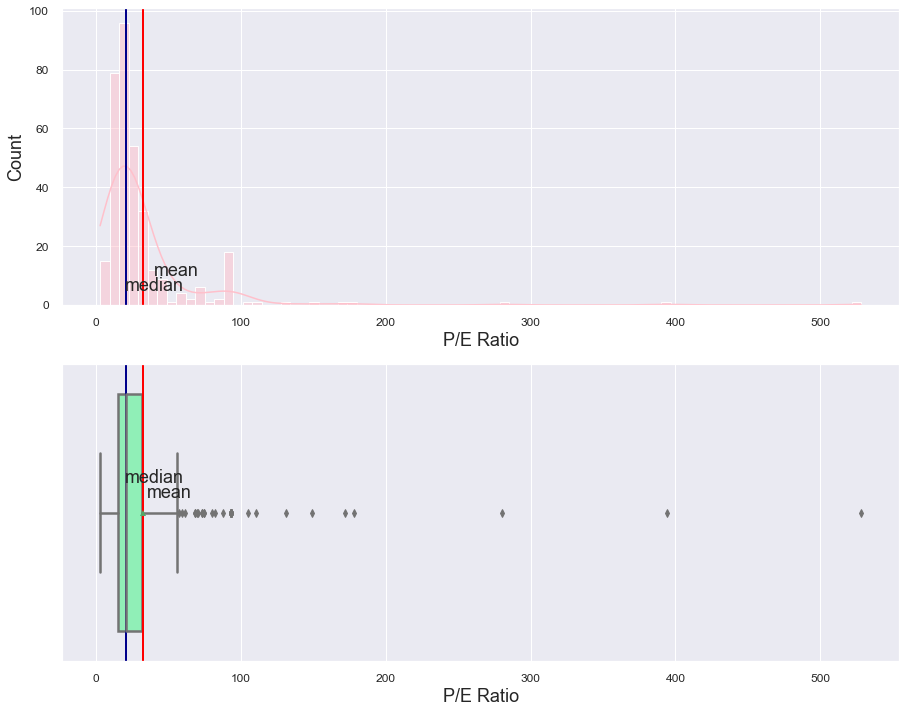

<IPython.core.display.Javascript object>

In [182]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(data=df, x=df["P/E Ratio"], stat="count", color="pink", bins=80, kde=True)
plt.axvline(x=20.8, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=32.6, linewidth=2, color="red")  # we draw the mean value
plt.text(x=20, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=40, y=10, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df, x=df["P/E Ratio"], showmeans=True, linewidth=2.5, palette="rainbow",
)
plt.axvline(x=20.8, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=32.6, linewidth=2, color="red")  # we draw the mean value
plt.text(x=20, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=35, y=-0.05, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

In [183]:
df["P/E Ratio"].value_counts().sort_values(ascending=True)

11.797     1
36.669     1
38.721     1
19.778     1
29.239     1
          ..
17.313     3
28.408     3
24.070     5
20.820     6
93.089    17
Name: P/E Ratio, Length: 295, dtype: int64

<IPython.core.display.Javascript object>

In [184]:
df[df["P/E Ratio"] > 93.08]

Ticker Symbol                     Security             GICS Sector  \
4             ADI         Analog Devices, Inc.  Information Technology   
19           ALXN      Alexion Pharmaceuticals             Health Care   
26           AMZN               Amazon.com Inc  Consumer Discretionary   
30            APA           Apache Corporation                  Energy   
31            APC      Anadarko Petroleum Corp                  Energy   
43            BCR             Bard (C.R.) Inc.             Health Care   
44            BHI             Baker Hughes Inc                  Energy   
76            COG              Cabot Oil & Gas                  Energy   
84            CXO             Concho Resources                  Energy   
102           DVN           Devon Energy Corp.                  Energy   
109           EOG                EOG Resources                  Energy   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
180           KMI                Kinder Morgan                  Energy   
216           MRO           Marathon Oil Corp.                  Energy   
222           NBL             Noble Energy Inc                  Energy   
226          NFLX                 Netflix Inc.  Information Technology   
227           NFX      Newfield Exploration Co                  Energy   
229           NOV  National Oilwell Varco Inc.                  Energy   
238           OXY         Occidental Petroleum                  Energy   
267           RRC        Range Resources Corp.                  Energy   
274           SLG              SL Green Realty             Real Estate   
284           SWN          Southwestern Energy                  Energy   
323           WMB                Williams Cos.                  Energy   
328           XEC               Cimarex Energy                  Energy   
337           ZBH       Zimmer Biomet Holdings             Health Care   

                                   GICS Sub Industry  Current Price  \
4                                     Semiconductors         55.320   
19                                     Biotechnology        190.750   
26                Internet & Direct Marketing Retail        675.890   
30                Oil & Gas Exploration & Production         44.470   
31                Oil & Gas Exploration & Production         48.580   
43                             Health Care Equipment        189.440   
44                    Oil & Gas Equipment & Services         46.150   
76                Oil & Gas Exploration & Production         17.690   
84                Oil & Gas Exploration & Production         92.860   
102               Oil & Gas Exploration & Production         32.000   
109               Oil & Gas Exploration & Production         70.790   
112               Oil & Gas Exploration & Production         52.130   
147                   Oil & Gas Equipment & Services         34.040   
180  Oil & Gas Refining & Marketing & Transportation         14.920   
216               Oil & Gas Exploration & Production         12.590   
222               Oil & Gas Exploration & Production         32.930   
226                     Internet Software & Services        114.380   
227               Oil & Gas Exploration & Production         32.560   
229                   Oil & Gas Equipment & Services         33.490   
238               Oil & Gas Exploration & Production         67.610   
267               Oil & Gas Exploration & Production         24.610   
274                                     Office REITs        112.980   
284               Oil & Gas Exploration & Production          7.110   
323               Oil & Gas Exploration & Production         25.700   
328               Oil & Gas Exploration & Production         89.380   
337                            Health Care Equipment        102.590   

     Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
4        

<IPython.core.display.Javascript object>

**Observations:**
- The variable P/E is showing the price in the market of the shares over the earning per share.
- We can see the P/E distribution is highly right skewed, but it does not contain any negative value. 
- There are many outputs as P/E ratio that seems to be wrong. Since some of the companies show negative earning per share, the P/E ration should also be negative.The current distribution is not consistent with our prior analysis where many securities were showing negative net earnings per share.
- The present of outliers is again affecting the mean value, that is greater than the median value of the distribution (32 and 20 per respectively).
- Most of the P/E value of the data set concentrate around 10 and 30.
- We do not have any negative P/E value of the data set


### 10BIS. "P/E_ratio_new" variable

In [185]:
# Adding new colunm with P/E ratio fixed.
df["P/E_ratio_new"] = df["Current Price"] / df["Earnings Per Share"]

<IPython.core.display.Javascript object>

In [186]:
df[["P/E_ratio_new", "P/E Ratio"]].sample(5, random_state=1)

P/E_ratio_new  P/E Ratio
102         -0.900     93.089
125         79.893     79.893
11          26.336     26.336
248         24.210     24.070
238         -6.609     93.089

<IPython.core.display.Javascript object>

In [187]:
Difference = np.abs(np.round((df["P/E Ratio"] - df["P/E_ratio_new"]), 2))
Difference = Difference.astype("int")
Difference.sample(5)

20     0
246    0
332    0
142    0
14     0
dtype: int32

<IPython.core.display.Javascript object>

In [188]:
Count_differ = Difference.value_counts()
Count_differ.sort_values(ascending=False).head(5)

0     290
96      4
94      3
28      2
98      2
dtype: int64

<IPython.core.display.Javascript object>

In [189]:
# Inconsistant values from "P/E Ratio"
340 - 290

50

<IPython.core.display.Javascript object>

**Observation:**

- There are 50 values that needed to be fixed on the column "P/E Ratio".
- The new variable "P/E_ratio_new" will solve the issue since it was calculated from the by using the formula (price/earning per share) with values from the data set.

In [190]:
df["P/E_ratio_new"].mean(), df["P/E_ratio_new"].median()

(24.37907178090709, 18.61229308800272)

<IPython.core.display.Javascript object>

In [191]:
# showing negative values of the distribution
df[df["P/E_ratio_new"] < 0]

Ticker Symbol                     Security                  GICS Sector  \
30            APA           Apache Corporation                       Energy   
31            APC      Anadarko Petroleum Corp                       Energy   
33           ARNC                  Arconic Inc                  Industrials   
44            BHI             Baker Hughes Inc                       Energy   
49            BSX            Boston Scientific                  Health Care   
62            CHK            Chesapeake Energy                       Energy   
64           CHTR       Charter Communications       Consumer Discretionary   
74            CNP           CenterPoint Energy                    Utilities   
76            COG              Cabot Oil & Gas                       Energy   
93          DISCA   Discovery Communications-A       Consumer Discretionary   
94          DISCK   Discovery Communications-C       Consumer Discretionary   
102           DVN           Devon Energy Corp.                       Energy   
109           EOG                EOG Resources                       Energy   
117           ETR                Entergy Corp.                    Utilities   
127           FCX    Freeport-McMoran Cp & Gld                    Materials   
137           FTR      Frontier Communications  Telecommunications Services   
147           HAL              Halliburton Co.                       Energy   
152           HCP                     HCP Inc.                  Real Estate   
153           HES             Hess Corporation                       Energy   
187           LLL  L-3 Communications Holdings                  Industrials   
216           MRO           Marathon Oil Corp.                       Energy   
219           MUR                   Murphy Oil                       Energy   
222           NBL             Noble Energy Inc                       Energy   
227           NFX      Newfield Exploration Co                       Energy   
229           NOV  National Oilwell Varco Inc.                       Energy   
238           OXY         Occidental Petroleum                       Energy   
253           PNR                 Pentair Ltd.                  Industrials   
267           RRC        Range Resources Corp.                       Energy   
284           SWN          Southwestern Energy                       Energy   
289           TDC               Teradata Corp.       Information Technology   
315          VRTX   Vertex Pharmaceuticals Inc                  Health Care   
323           WMB                Williams Cos.                       Energy   
328           XEC               Cimarex Energy                       Energy   
335          YHOO                   Yahoo Inc.       Information Technology   

                          GICS Sub Industry  Current Price  Price Change  \
30       Oil & Gas Exploration & Production         44.470        11.398   
31       Oil & Gas Exploration & Production         48.580       -20.802   
33                      Aerospace & Defense          7.399         1.648   
44           Oil & Gas Equipment & Services         46.150       -12.312   
49                    Health Care Equipment         18.440        11.758   
62                     Integrated Oil & Gas          4.500       -38.102   
64                        Cable & Satellite        183.100         3.599   
74                           MultiUtilities         18.360         1.436   
76       Oil & Gas Exploration & Production         17.690       -20.099   
93                        Cable & Satellite         26.680         2.027   
94                        Cable & Satellite         25.220         3.573   
102      Oil & Gas Exploration & Production         32.000       -15.478   
109      Oil & Gas Exploration & Production         70.790        -4.079   
117                      Electric Utilities         68.360         4.911   
127                                  Copper          6.770       -31.685   
137  Integrated Teleco

<IPython.core.display.Javascript object>

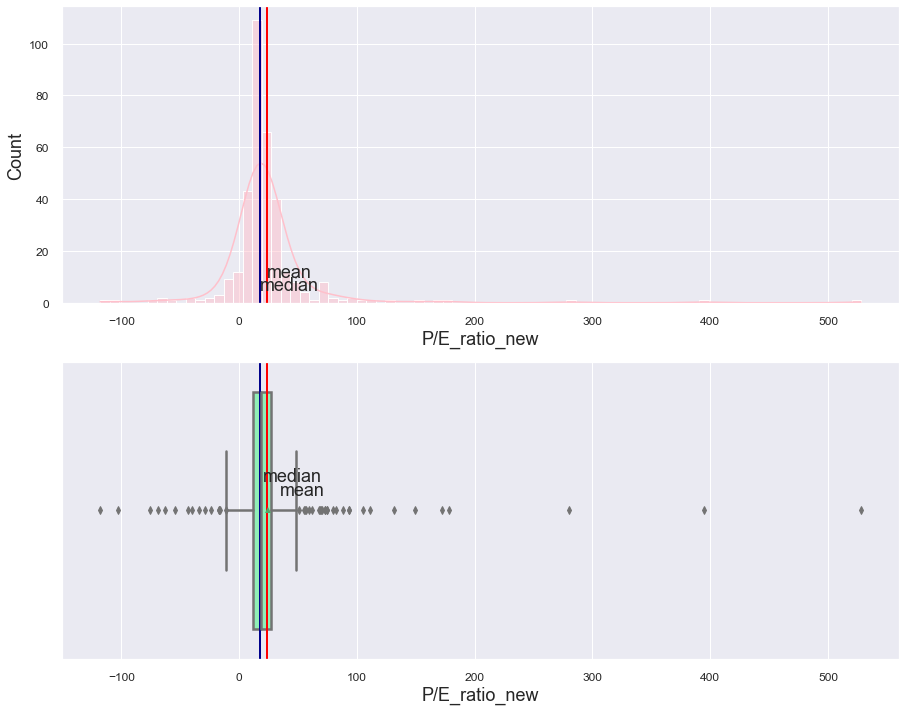

<IPython.core.display.Javascript object>

In [192]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(
    data=df, x=df["P/E_ratio_new"], stat="count", color="pink", bins=80, kde=True
)
plt.axvline(x=18, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=24, linewidth=2, color="red")  # we draw the mean value
plt.text(x=18, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=24, y=10, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df, x=df["P/E_ratio_new"], showmeans=True, linewidth=2.5, palette="rainbow",
)
plt.axvline(x=18, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=24, linewidth=2, color="red")  # we draw the mean value
plt.text(x=20, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=35, y=-0.05, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

**Observation:**
    
- It seems that we had inconsistent results for P/E ratio. Many negative values were filled in with positive values that did not make any sense.
- We have created a new variable "P/E_ratio_new" with the correct calculation of the data. We just applied the formula current price/net earnings per share.
- The new variable seems to be almost normally distributed with outlier in the upper and lower extremes of the distribution.
- The mean value is 24 and the median is 18 for the new variable "P/E_ratio_new".


### 11.'P/B Ratio' variable

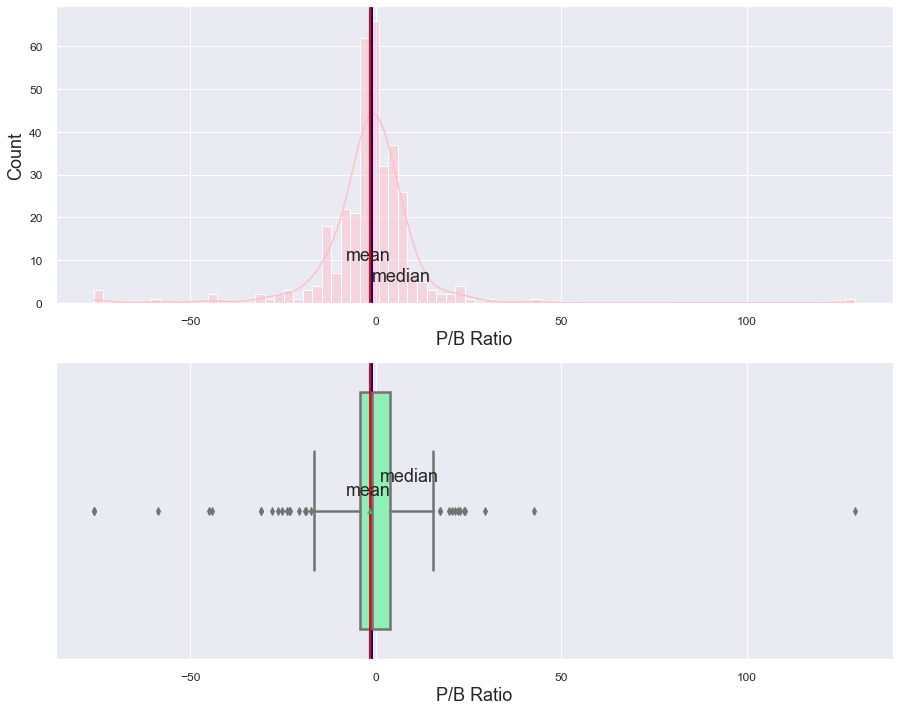

<IPython.core.display.Javascript object>

In [193]:
plt.figure(figsize=(15, 12))  # plot size

plt.subplot(2, 1, 1)  # subplot 1
sns.histplot(data=df, x=df["P/B Ratio"], stat="count", color="pink", bins=80, kde=True)
plt.axvline(x=-1.06, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=-1.7, linewidth=2, color="red")  # we draw the mean value
plt.text(x=-1.06, y=5, s="median")  # we add text on the plot with names for the lines
plt.text(x=-8, y=10, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)
plt.yticks(size=12)

plt.subplot(2, 1, 2)  # subplot 2
sns.boxplot(
    data=df, x=df["P/B Ratio"], showmeans=True, linewidth=2.5, palette="rainbow",
)
plt.axvline(x=-1.06, linewidth=2, color="darkblue")  # we draw the median value
plt.axvline(x=-1.7, linewidth=2, color="red")  # we draw the mean value
plt.text(x=1, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=-8, y=-0.05, s="mean")  # we add text on the plot with names for the lines
plt.xticks(size=12)  # change size x axis
plt.yticks(size=12)  # change size y axis
plt.show()

**Observations:**

- The variable P/B ration will help us to decide when a security price is too high or overprice. Usually, the price of the shares is above their book value.
- The average p/B ratio for the distribution is 1.7 and 1 for the mean and median values respectively.
-The distribution presents lots of outliers in both extremes, but especially the lower end of the distribution counts with more dispersed values.
-We can observe an important number or securities with P/B negative; in general, that would mean that a company liability excesses their assets. We can see some lower outliers with very negative P/B ratio (minimum is lower than -50).
- The distribution also counts with outlier in the upper extreme with a maximum value of 129.



### CATEGORICAL VARIABLES

### 12. 'Ticker Symbol' Variable

In [194]:
# checking the number of different "Ticker Symbol" assigned to securities.
df["Ticker Symbol"].value_counts()

AAL     1
NEE     1
NUE     1
NTRS    1
NSC     1
       ..
EQR     1
EQIX    1
EOG     1
EMN     1
ZTS     1
Name: Ticker Symbol, Length: 340, dtype: int64

<IPython.core.display.Javascript object>

**Observations**:

- This variable is not useful for our objective so we will not need any further analysis for 'Ticker Symbol'.
- Every security has a distinctive symbol that identify the different stocks( similar to  product ID )
- Since we have 340 securities, we can expect 340 different "Ticker Symbol".

### 13.'Security' variable

In [195]:
# checking the number of different "security names" that appear in the data.
df["Security"].value_counts()

3M Company                          1
Newmont Mining Corp. (Hldg. Co.)    1
ONEOK                               1
O'Reilly Automotive                 1
Nucor Corp.                         1
                                   ..
EQT Corporation                     1
EOG Resources                       1
E*Trade                             1
Dun & Bradstreet                    1
eBay Inc.                           1
Name: Security, Length: 340, dtype: int64

<IPython.core.display.Javascript object>

**Observation:**
    
- We count with 340 different securities, each of them has a different Ticker Symbol assigned.
- This variable can be used to identify the different financial products.
- No further analysis is need it in regards with this variable. 


### 14.'GICS Sector' variable

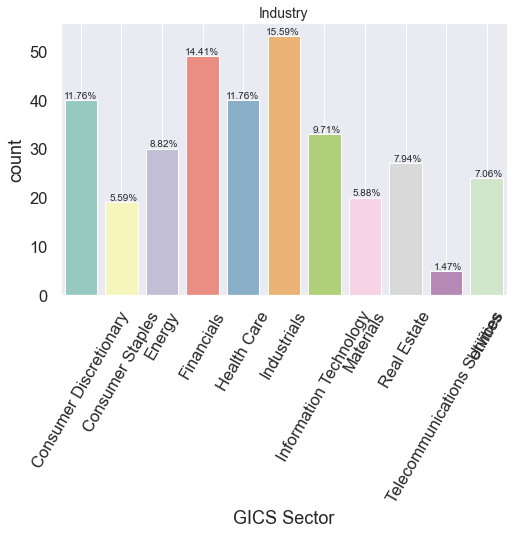

<IPython.core.display.Javascript object>

In [196]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="GICS Sector", palette="Set3"
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("Industry", fontsize=14)  # add title
plt.xticks(rotation=60)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

In [197]:
# checking number of securities in each industry
df["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

<IPython.core.display.Javascript object>

**Observation**

- The securities included in the data set belong to eleven different industries: Industrials, Financials, Consumer Discretionary, Health Care, Information Technology, Energy, Real Estate, Real Estate, Utilities, Materials, Consumer Staples, and Telecommunications Services. 
- Industrial with 15.6% of the products followed by Finances (14.5%), Healthcare and consumer discretionary both with 11,7% of the securities cover almost 50% of the shares in the data set.
- Only 1.4% of the securities belong to the Telecommunication services.


### 15.'GICS Sub Industry' variable

In [198]:
# calculating percentage per sub industry
sub_sector = np.round(df["GICS Sub Industry"].value_counts(normalize=True) * 100, 2)


<IPython.core.display.Javascript object>

In [199]:
# create a data frame to plot the sub industries
series = pd.Series(sub_sector)
Sub_df = series.to_frame()


<IPython.core.display.Javascript object>

In [200]:
# adding the sub industry
Sub_df["sub_industry"] = Sub_df.index

<IPython.core.display.Javascript object>

In [201]:
#reseting index
Sub_df=Sub_df.reset_index(drop=True)



<IPython.core.display.Javascript object>

In [202]:
# showing top sub-industries
Sub_df.head(10)

GICS Sub Industry                        sub_industry
0              4.710  Oil & Gas Exploration & Production
1              4.120                               REITs
2              4.120            Industrial Conglomerates
3              3.530        Internet Software & Services
4              3.530                  Electric Utilities
5              3.240                      MultiUtilities
6              3.240               Health Care Equipment
7              2.940                               Banks
8              2.350       Property & Casualty Insurance
9              2.060      Diversified Financial Services

<IPython.core.display.Javascript object>

In [203]:
# showing lowest percentage sub-industry
Sub_df.tail(10)

GICS Sub Industry                          sub_industry
94               0.290                  Household Appliances
95               0.290              Housewares & Specialties
96               0.290  Human Resource & Employment Services
97               0.290                  Industrial Materials
98               0.290        Life Sciences Tools & Services
99               0.290              Metal & Glass Containers
100              0.290              Motorcycle Manufacturers
101              0.290                 Multi-Sector Holdings
102              0.290                  Multi-line Insurance
103              0.290                       Water Utilities

<IPython.core.display.Javascript object>

In [204]:
Sub_df["sub_industry"].value_counts().sum()

104

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Banks'),
  Text(1, 0, 'Biotechnology'),
  Text(2, 0, 'Consumer Finance'),
  Text(3, 0, 'Diversified Chemicals'),
  Text(4, 0, 'Diversified Financial Services'),
  Text(5, 0, 'Electric Utilities'),
  Text(6, 0, 'Health Care Equipment'),
  Text(7, 0, 'Industrial Conglomerates'),
  Text(8, 0, 'Industrial Machinery'),
  Text(9, 0, 'Integrated Oil & Gas'),
  Text(10, 0, 'Internet Software & Services'),
  Text(11, 0, 'Managed Health Care'),
  Text(12, 0, 'MultiUtilities'),
  Text(13, 0, 'Oil & Gas Exploration & Production'),
  Text(14, 0, 'Oil & Gas Refining & Marketing & Transportation'),
  Text(15, 0, 'Packaged Foods & Meats'),
  Text(16, 0, 'Pharmaceuticals'),
  Text(17, 0, 'Property & Casualty Insurance'),
  Text(18, 0, 'REITs'),
  Text(19, 0, 'Semiconductors')])

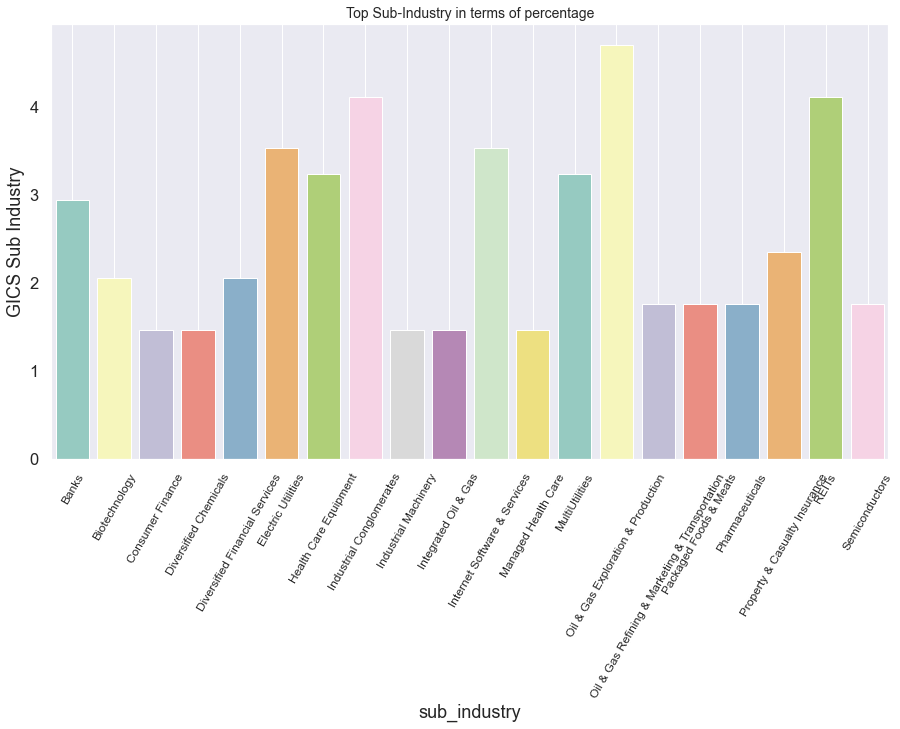

<IPython.core.display.Javascript object>

In [205]:
plt.figure(figsize=(15, 8))  # size of each plot
sns.barplot(
    data=Sub_df,
    x=Sub_df["sub_industry"],
    y="GICS Sub Industry",
    order=data["GICS Sub Industry"].value_counts().index[:20].sort_values(),
    palette="Set3",
)  # visualizing the 20 top sub industries in terms of percentage
plt.grid()  # grid will help visualization
plt.title("Top Sub-Industry in terms of percentage", fontsize=14)
plt.xticks(rotation=60)
plt.xticks(size=12)  # change size x axis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Casinos & Gaming'),
  Text(1, 0, 'Consumer Electronics'),
  Text(2, 0, 'Copper'),
  Text(3, 0, 'Diversified Commercial Services'),
  Text(4, 0, 'Drug Retail'),
  Text(5, 0, 'Electrical Components & Equipment'),
  Text(6, 0, 'Electronic Equipment & Instruments'),
  Text(7, 0, 'Financial Exchanges & Data'),
  Text(8, 0, 'Home Entertainment Software'),
  Text(9, 0, 'Industrial Materials'),
  Text(10, 0, 'Metal & Glass Containers'),
  Text(11, 0, 'Motorcycle Manufacturers'),
  Text(12, 0, 'Multi-line Insurance'),
  Text(13, 0, 'Networking Equipment'),
  Text(14, 0, 'Real Estate Services'),
  Text(15, 0, 'Semiconductor Equipment'),
  Text(16, 0, 'Technology Hardware, Storage & Peripherals'),
  Text(17, 0, 'Tires & Rubber'),
  Text(18, 0, 'Trucking'),
  Text(19, 0, 'Water Utilities')])

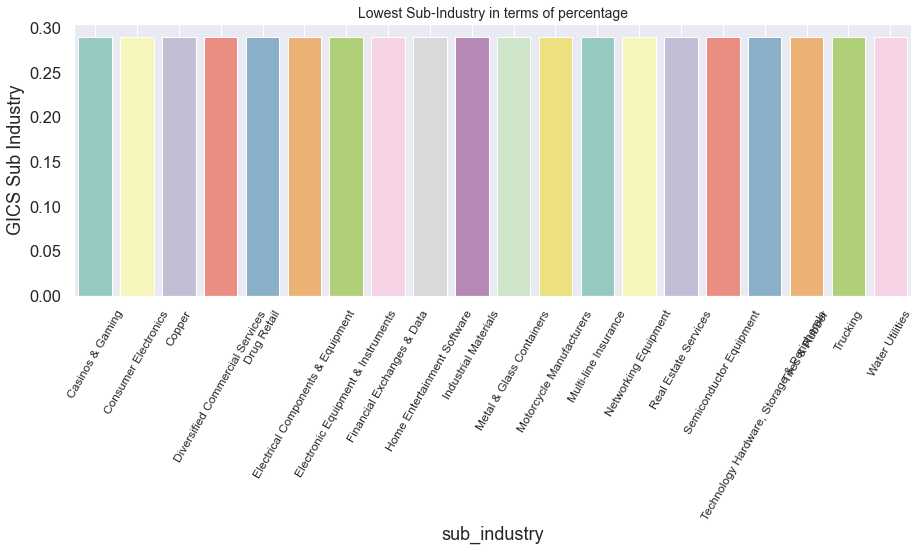

<IPython.core.display.Javascript object>

In [206]:
plt.figure(figsize=(15, 5))  # size of each plot
sns.barplot(
    data=Sub_df,
    x=Sub_df["sub_industry"],
    y="GICS Sub Industry",
    order=data["GICS Sub Industry"].value_counts().index[84:104].sort_values(),
    palette="Set3",
)  # visualizing the low percentage sub industries
plt.grid()  # grid will help visualization
plt.title("Lowest Sub-Industry in terms of percentage", fontsize=14)
plt.xticks(rotation=60)
plt.xticks(size=12)  # change size x axis

In [207]:
# Number of sub_industries with lower contribution to the total
Sub_df[Sub_df["GICS Sub Industry"] < 0.30].value_counts().sum()

42

<IPython.core.display.Javascript object>

**Observations:**

- There are 104 different sub industries included in the data.
- The most frequent sub industry is Oil & Gas Exploration & Production with 4.7% of the total, followed by REITs and Industrial conglomerates with 4.1% each.
- On the tail of the sub-Industry category we can find 42 sub industries that have a low percentage contribution, about 0.29%.  Some of them are Casinos and Gaming, Consumer electronics, Copper, Drug retail, trucking, or water utilities.


## 3.2 Bivariate analysis

### 1. Pair plot of all numeric variables

In [208]:
# Selecting the list of variables to plot
list_num = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/E_ratio_new",
    "P/B Ratio",
]

<IPython.core.display.Javascript object>

- For the bivariate analysis we are going to use "P/E_ratio_new" with the corrections instead of the initial 'P/E Ratio' since the initial variable did not contained negative values, which is inconsistent with the data provided.

<Figure size 8640x7200 with 0 Axes>

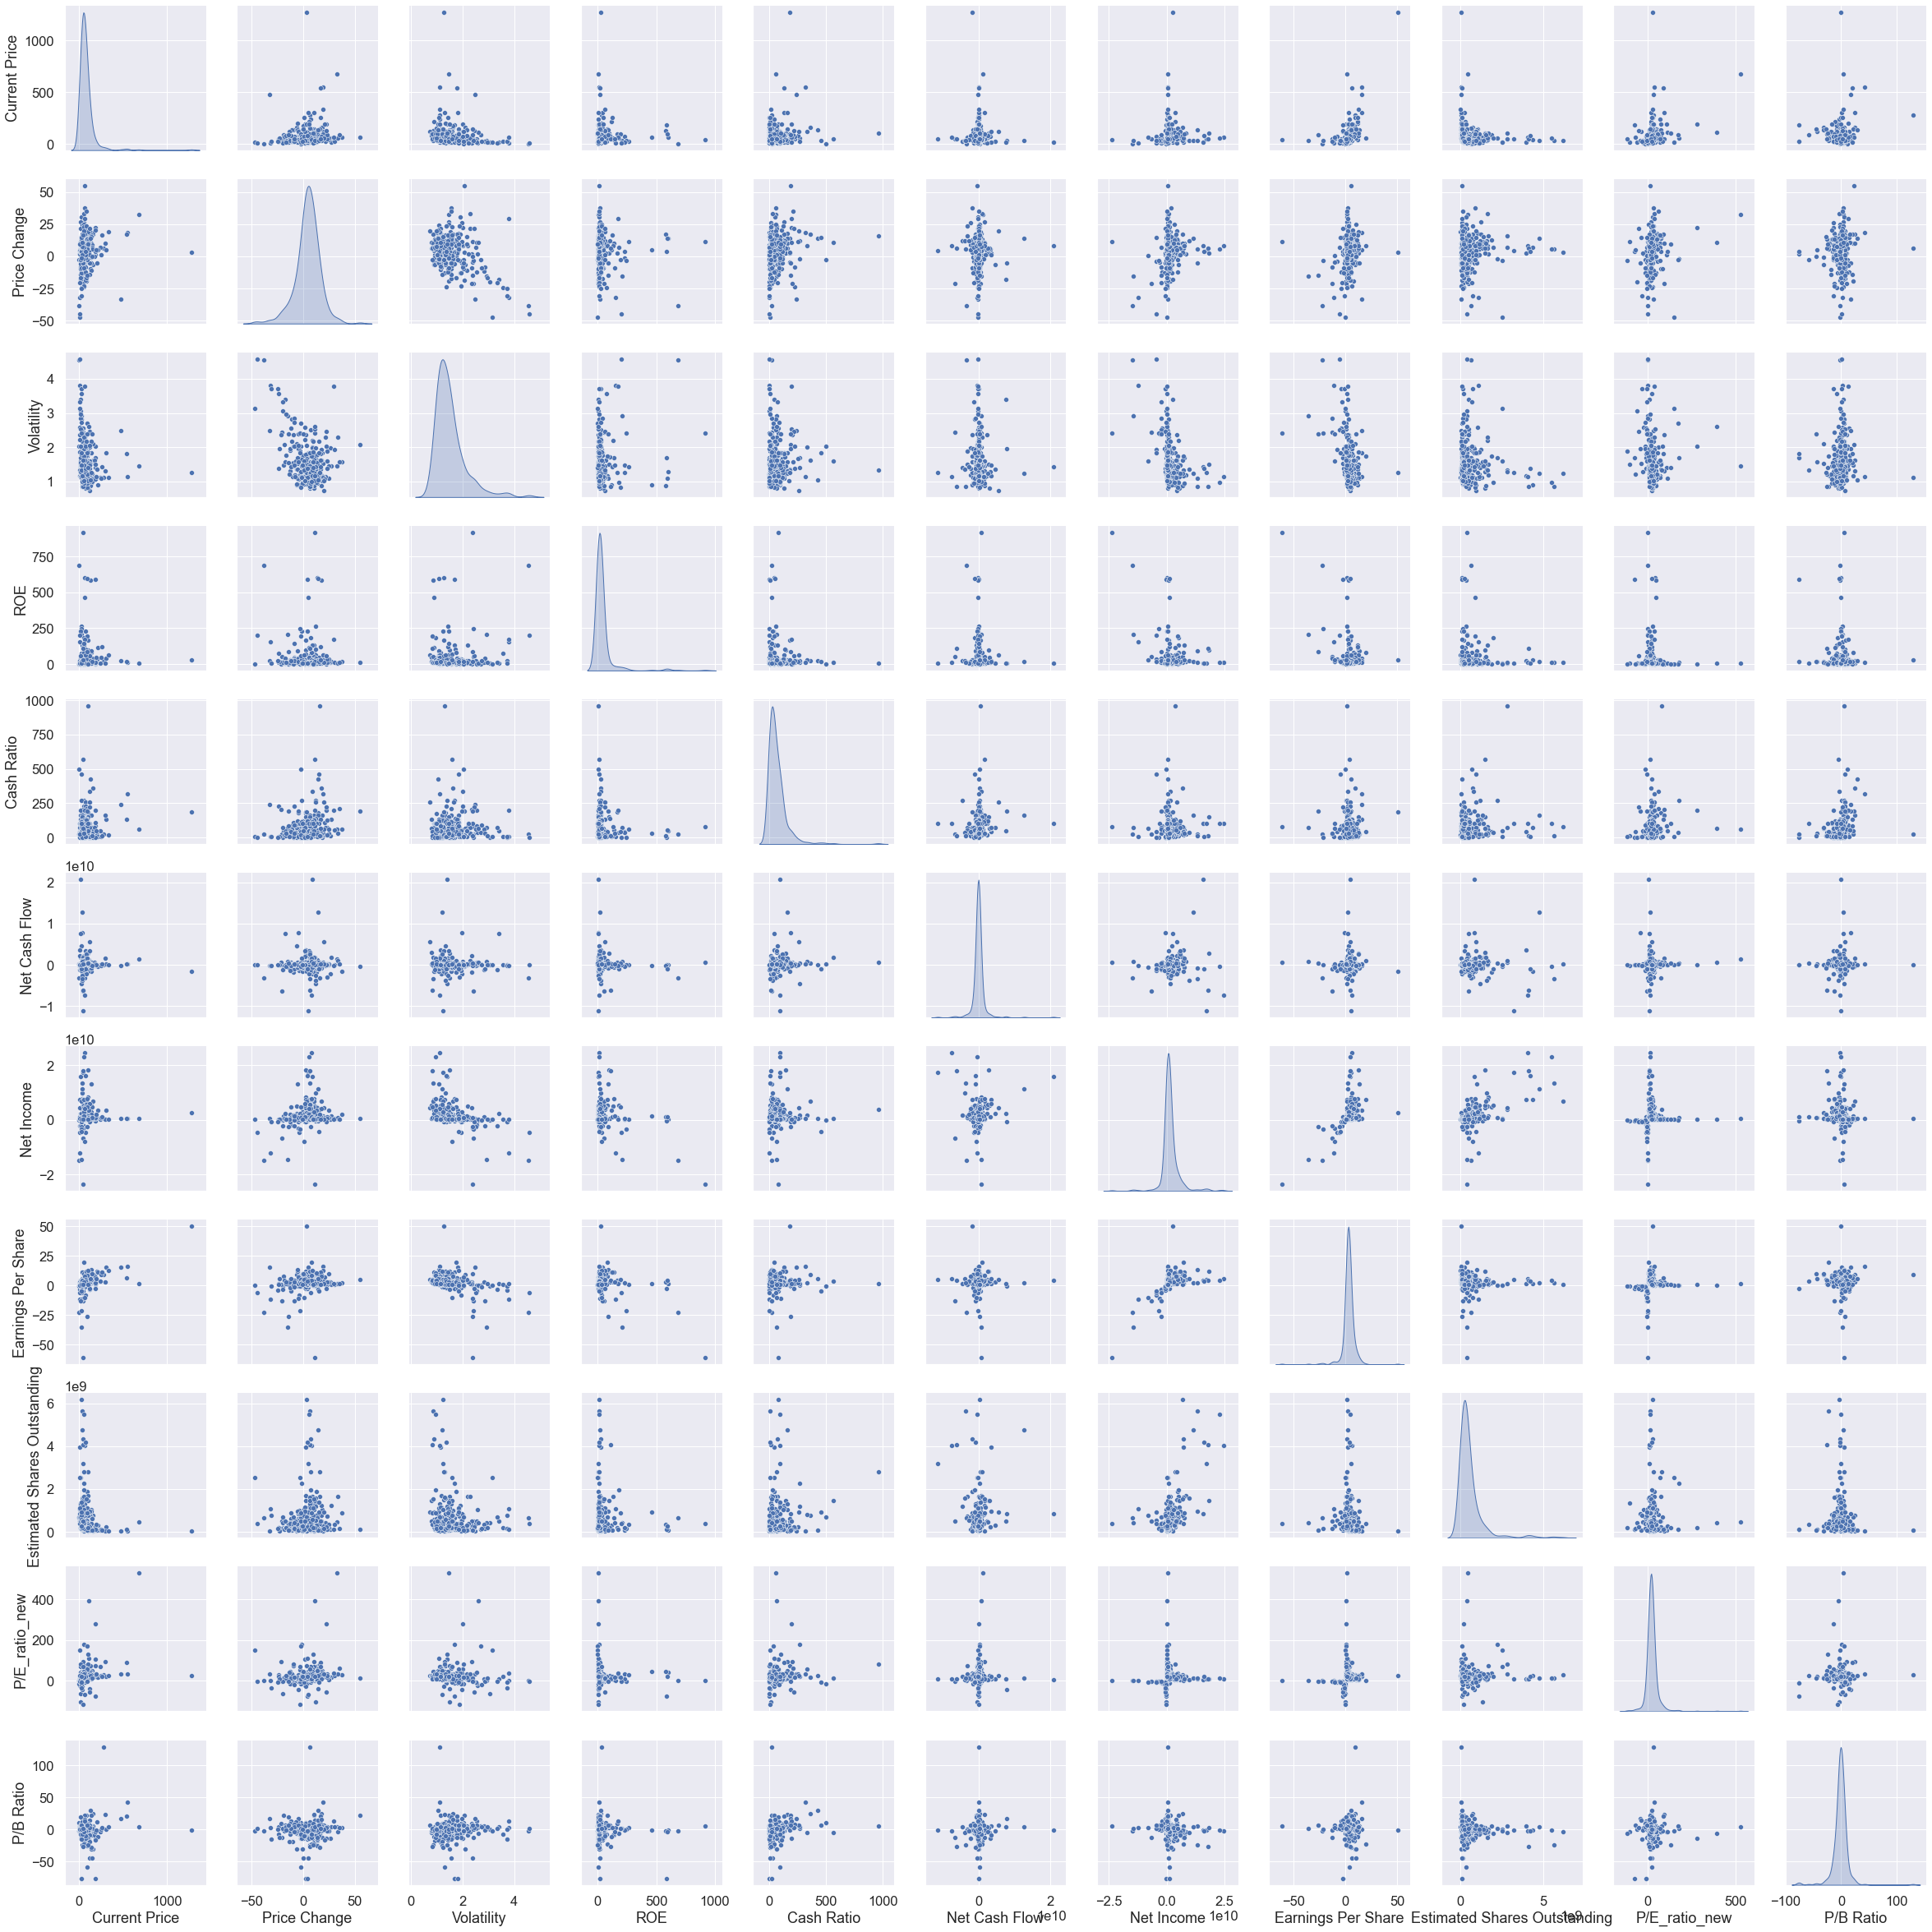

<IPython.core.display.Javascript object>

In [209]:
plt.figure(figsize=(120, 100))  # set size
sns.pairplot(
    data=df[list_num], diag_kind="kde", height=3, palette="summer",
)  # pairplot with density distribution in the diagonal.

sns.set(font_scale=1.5)
plt.tight_layout()
plt.show()

**Observations:**
    
- The pair plot does not show a strong relationship among any of the predictors, with a few exceptions.
- We can see a negative pattern between volatility and price change.
- Net income and net earnings per share also have a positive relationship.
- Net income and estimated share outstanding also show a positive plot.
- In general, is difficult to differentiate any clusters or group in the above diagonal plots. 
- Volatility and estimated share outstanding distributions shows about 3 possible clusters. "P/E_ratio_new".


### 2.Heatmap

<AxesSubplot:>

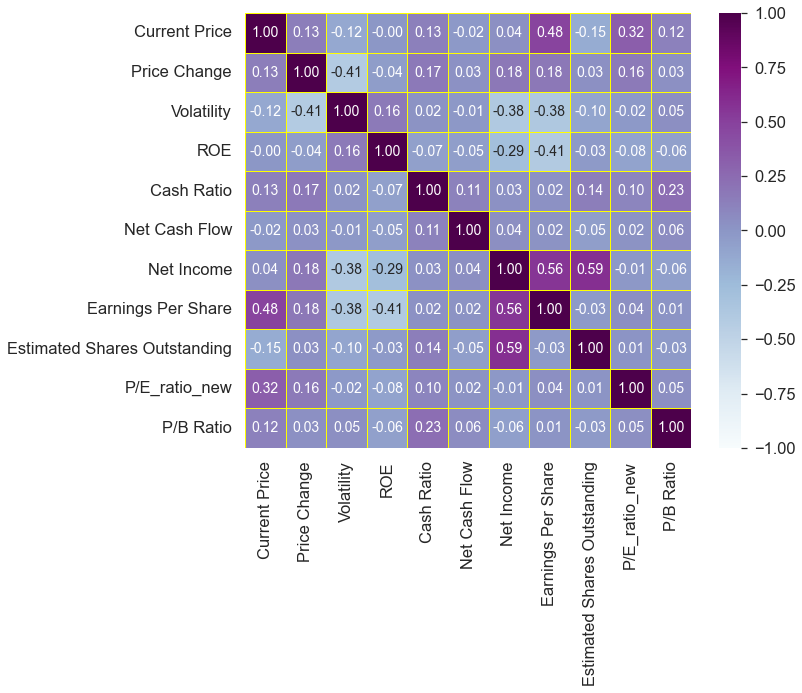

<IPython.core.display.Javascript object>

In [210]:
"""we will plot a heatmap with a min value of -1 and max value of 1 to simulate the 
coefficient of correlation."""
plt.figure(figsize=(10, 8))  # setting the size of the plot
sns.heatmap(
    df[list_num].corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    cmap='BuPu',
    linewidths=1,
    linecolor="yellow", annot_kws={"size": 14}
)  # creating heatmap with annotations


**Observations:**

- The heatmap is showing correlation among some of the variables but it is not a high correlation in any case. Since the minimum value is -1 and the maximum is 1, the heatmap is providing with the coefficient of correlation among variables.
- ‘Current price‘ shows  a slight positive correlation with 'P/E new' (price per net income per share) and it makes sense since current price is used to calculate P/E Ratio. ‘Current price’ and ‘Earning per share’ also have a moderate correlation.
- We can appreciate a negative correlation between ‘Volatility’ and ‘Price Change’. 
- ‘Volatility’ also shows a moderate correlation with ‘net income’ and ‘Earnings per Share’.
- ‘ROE’ also show a moderate negative correlation with ‘Earning per Share’ and small negative correlation with ‘Net Income’.
- ‘Net income’ also have a positive correlation with estimated share outstanding and ‘Earning per share’.
- None of the coefficient of correlation is considered high.


### 3.Current price per Industry

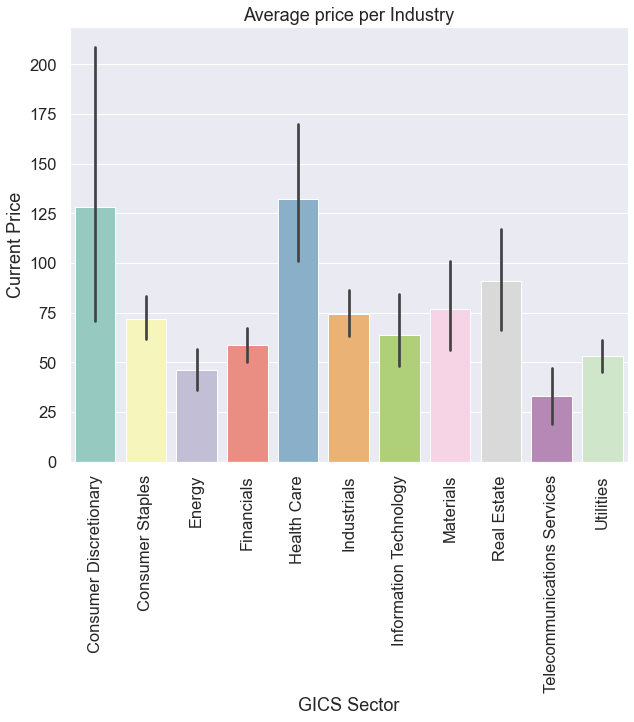

<IPython.core.display.Javascript object>

In [211]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="Current Price", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average price per Industry")
plt.show()

**Top market prices**

In [212]:
# showing mean price per sub_industry for top market price
df.groupby("GICS Sub Industry")["Current Price"].mean().sort_values(
    ascending=False
).head(20)

GICS Sub Industry
Internet & Direct Marketing Retail      540.097
Life Sciences Tools & Services          339.130
Biotechnology                           221.297
Restaurants                             216.835
Industrial Materials                    202.590
Home Furnishings                        189.390
Data Processing & Outsourced Services   156.385
Household Appliances                    146.870
Residential REITs                       137.980
Specialty Chemicals                     137.407
Specialty Stores                        132.990
Managed Health Care                     129.546
Health Care Equipment                   127.925
Aerospace & Defense                     126.625
Health Care Distributors                120.520
Construction Materials                  115.775
Office REITs                            112.980
Industrial Gases                        102.400
Drug Retail                              97.770
Health Care Supplies                     97.525
Name: Current Price, d

<IPython.core.display.Javascript object>

**Lowest market prices**

In [213]:
# showing mean price per sub_industry for bottom market price
df.groupby("GICS Sub Industry")["Current Price"].mean().sort_values(
    ascending=False
).tail(20)

GICS Sub Industry
Real Estate Services                          34.580
Fertilizers & Agricultural Chemicals          34.200
Homebuilding                                  33.365
Tires & Rubber                                32.670
Regional Banks                                31.773
Investment Banking & Brokerage                31.285
Distributors                                  29.630
Electronic Equipment & Instruments            28.070
Integrated Telecommunications Services        27.615
Networking Equipment                          27.600
Publishing                                    25.520
Automobile Manufacturers                      24.050
Technology, Hardware, Software and Supplies   20.650
Semiconductor Equipment                       18.670
Gold                                          17.990
Multi-Sector Holdings                         17.390
Thrifts & Mortgage Finance                    16.150
Technology Hardware, Storage & Peripherals    15.200
Computer Hardware           

<IPython.core.display.Javascript object>


**Observations:**
- The industry with higher share prices is ‘health care’ followed very close by ‘customer discretionary ‘('items that are not needed but the customers want') and ‘real estate’.
- The price range in the ‘customer discretionary’ varies widely when compared to the other industries.
- on the bottom of the list we can find ‘telecommunication services’, ‘energy’ and ‘utilities’ in this order.
- When focusing on the sub-industry data, we can see that the top average price is for Internet & Direct Marketing Retail with an average price of 540.097 dollars, followed by Life Sciences Tools & Services with 339 dollars per share.
- The sub-industry with lowest prices by far can be found in the ‘copper’ sub-industry with 6 dollar per share and ‘Computer Hardware’ with 11 dollars per share in average.


### 4. 'Price chance' per industry

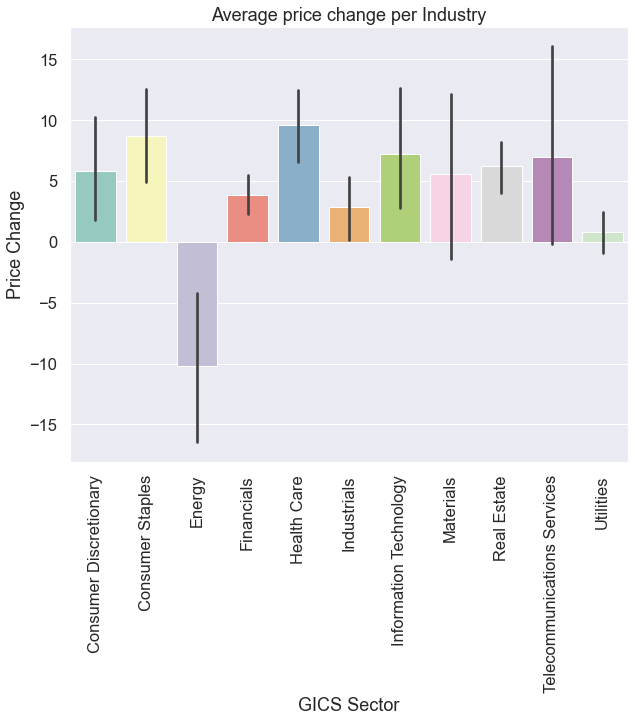

<IPython.core.display.Javascript object>

In [214]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="Price Change", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average price change per Industry")
plt.show()

**Top price change sub-industries**

In [215]:
# showing mean price change in each sub_industry
df.groupby("GICS Sub Industry")["Price Change"].mean().sort_values(
    ascending=False
).head(10)

GICS Sub Industry
Casinos & Gaming                     29.497
Semiconductor Equipment              26.834
Alternative Carriers                 24.708
Home Entertainment Software          23.320
Life Sciences Tools & Services       18.943
Internet & Direct Marketing Retail   18.789
Advertising                          18.316
Metal & Glass Containers             16.536
Health Care Distributors             16.108
Diversified Chemicals                15.593
Name: Price Change, dtype: float64

<IPython.core.display.Javascript object>

**Lowest price change sub-industries**

In [216]:
# showing mean price change in each sub_industry
df.groupby("GICS Sub Industry")["Price Change"].mean().sort_values(
    ascending=False
).tail(10)

GICS Sub Industry
Human Resource & Employment Services          -7.659
Oil & Gas Equipment & Services                -9.991
Fertilizers & Agricultural Chemicals         -10.240
Agricultural Products                        -12.017
Oil & Gas Exploration & Production           -14.242
Multi-Sector Holdings                        -14.293
Apparel, Accessories & Luxury Goods          -16.948
Motorcycle Manufacturers                     -17.247
Technology Hardware, Storage & Peripherals   -17.838
Copper                                       -31.685
Name: Price Change, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**

- The industry with the lowest price change was 'Utilities' and 'Industrials' with about 1 percent increase during the last 13 days.
- On the other hand, the industries that registered the highest price increase were 'Health Care 'and 'Customer Staples' with 10 and 9 percent increased for the period of study.
- It is very interesting how the 'Energy' industry registered negative price changes, with an average of 10 per cent decrease, but as we can see the price range varies widely among the sub-industries with some of the securities reaching a price decrease of 15 percent within the mentioned industry.
- In regards with the sub-industries, the worst numbers can be found in the ‘copper’ sub-industry with an average of 31 percent decrease, followed by ‘Technology Hardware, Storage & Peripherals’ and ‘Motorcycle Manufacturers’ which average price decrease is around 17 percent.
- The companies with the highest price increases are for 'Casinos & Gaming'(with 29 percent), ‘Semiconductor Equipment’ (with 26 percent), ‘Alternative Carriers’ (with 24 percent) and ‘Home Entertainment Software’ (with 23 percent)


### 5.Cash Ratio per industry

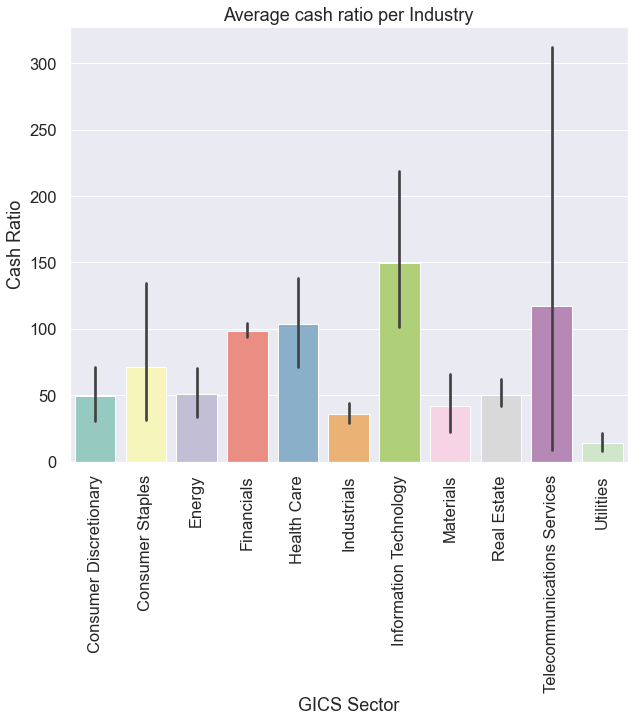

<IPython.core.display.Javascript object>

In [217]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average cash ratio per Industry")
plt.show()

**Top cash ratio for each sub-industry**

In [218]:
# showing mean cash ratio in each sub_industry
df.groupby("GICS Sub Industry")["Cash Ratio"].mean().sort_values(ascending=False).head(
    10
)

GICS Sub Industry
Biotechnology                  217.286
Internet Software & Services   205.417
Gold                           198.000
Casinos & Gaming               198.000
Soft Drinks                    192.000
Semiconductors                 189.667
Restaurants                    174.667
Electronic Components          169.000
Health Care Distributors       160.333
Steel                          147.000
Name: Cash Ratio, dtype: float64

<IPython.core.display.Javascript object>

**Lowest cash ratio for each sub-industry**

In [219]:
# showing mean cash ratio in each sub_industry
df.groupby("GICS Sub Industry")["Cash Ratio"].mean().sort_values(ascending=False).tail(
    10
)

GICS Sub Industry
Metal & Glass Containers   10.000
Household Appliances       10.000
Specialty Retail           10.000
Industrial Gases            8.000
Copper                      5.000
Water Utilities             4.000
Specialty Stores            3.333
Home Furnishings            3.000
Environmental Services      2.000
Trucking                    1.000
Name: Cash Ratio, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
    
- Information technology followed by telecommunication services and health care are the industries with highest cash ratio (with average of 150%,120% and 100% respectively).
- Utilities, material, industrial and energy and industrial are the industries with the lowest cash ratio in average from the data set.
- In regards with the sub-industry, the highest cash ratio can be found in the Biotechnology industry (217%) and Internet Software & Services   (205%). Gold and casinos sub-industries are in the third position, with a cash ratio around 198%.
- The lowest cash ratios can be found in Trucking (with only 1%) followed by Environmental Services and Home Furnishings.


### 6. P/E Ratio per industry

- **We are going to use P/E Ratio_new variable in order to analyze the ratio among industries ( the original P/E ratio do not contain negative values so it is inconsistent with the data provided).**

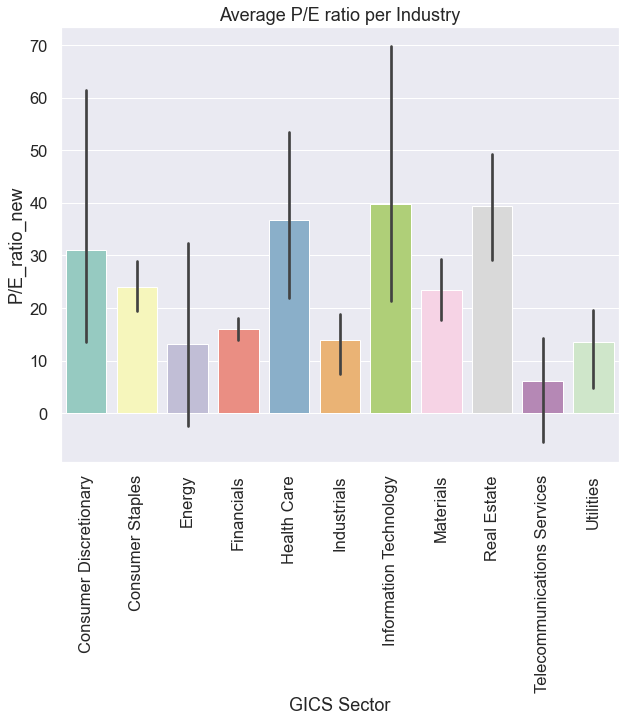

<IPython.core.display.Javascript object>

In [220]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="P/E_ratio_new", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average P/E ratio per Industry")
plt.show()

**Top P/E ratio for each sub-industry**

In [221]:
# showing mean P/E ratio in each sub_industry
df.groupby("GICS Sub Industry")["P/E_ratio_new"].mean().sort_values(
    ascending=False
).head(10)

GICS Sub Industry
Internet & Direct Marketing Retail                159.111
Office REITs                                      110.765
Home Furnishings                                   73.124
Biotechnology                                      59.879
Internet Software & Services                       58.524
Specialized REITs                                  57.526
Health Care Supplies                               54.483
Semiconductors                                     48.848
Brewers                                            48.412
Oil & Gas Refining & Marketing & Transportation    44.889
Name: P/E_ratio_new, dtype: float64

<IPython.core.display.Javascript object>

**Lowest P/E ratio for each sub-industry**

In [222]:
# showing mean P/E ratio in each sub_industry
df.groupby("GICS Sub Industry")["P/E_ratio_new"].mean().sort_values(
    ascending=False
).tail(10)

GICS Sub Industry
Airlines                                   8.161
Aerospace & Defense                        7.232
Computer Hardware                          6.578
Automobile Manufacturers                   6.571
Integrated Telecommunications Services     6.223
Alternative Carriers                       5.598
Copper                                    -0.599
Industrial Machinery                     -11.346
Oil & Gas Equipment & Services           -23.399
Cable & Satellite                        -32.236
Name: P/E_ratio_new, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**

- This ratio divides the market price share by the net income per share so a negative ratio it an indication of either big investment in research and development (R&D) that will take time to translate into higher earnings and growth, or a bad financial situation (bankruptcy).
- P/E ratio is also a way to know if a company share is undervalued or overvalued.
- According to bar plot generated for the different industries, the industry’ Information technology’ and ‘Real estate’ show the highest ratio, it is possible that some of the securities in these sectors are overvalued.
- ‘Energy’ and ‘Telecommunication services’ show the lowest P/E ratio and the confident interval is showing that some of the securities are associated to a negative P/E ratio. We would need to check what if these companies are carrying on big R&D projects to generate higher future earnings.
- If we analyze the sub-industry, the top economical field with higher ratio are 'Internet & Direct Marketing Retail'(159.111)and 'Office REITs' (within real estate industry (with a ratio 110.765).
- The data registered for the different sub-industry show the lowest P/E ratio for Cable & Satellite (-32),Oil & Gas Equipment & Services (-23) and Industrial Machinery (-11) followed by copper (-0.5).


### 7. Volatility per industry

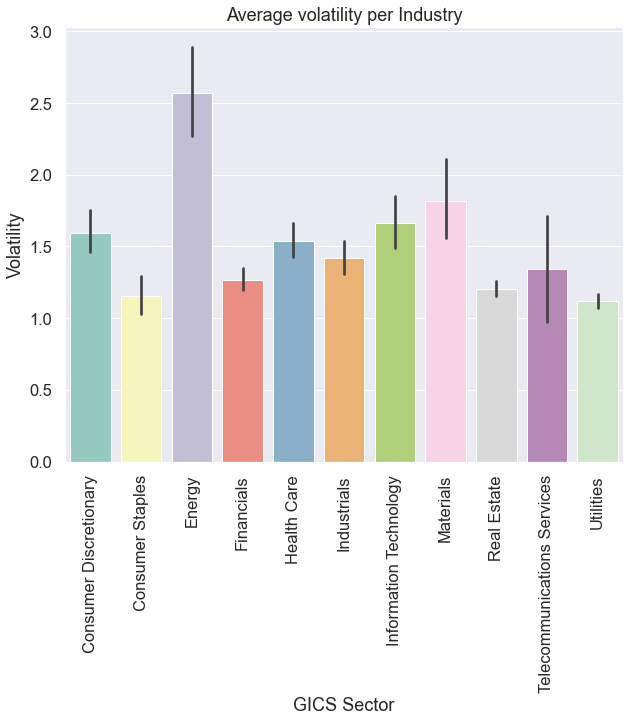

<IPython.core.display.Javascript object>

In [223]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="Volatility", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average volatility per Industry")
plt.show()

**Observation:**

- As we can see the market with higher volatility is ‘Energy’, so in general, securities in this industry will be associated to a higher risk, because prices can change very quickly.
- ‘Materials’ and ‘information technology’ are also very volatile markets.
- ‘Utilities’ and ‘Real Estate’ economic sectors seem to be the less risky from the overall portfolio.


### 8. 'Earnings Per Share' per industry


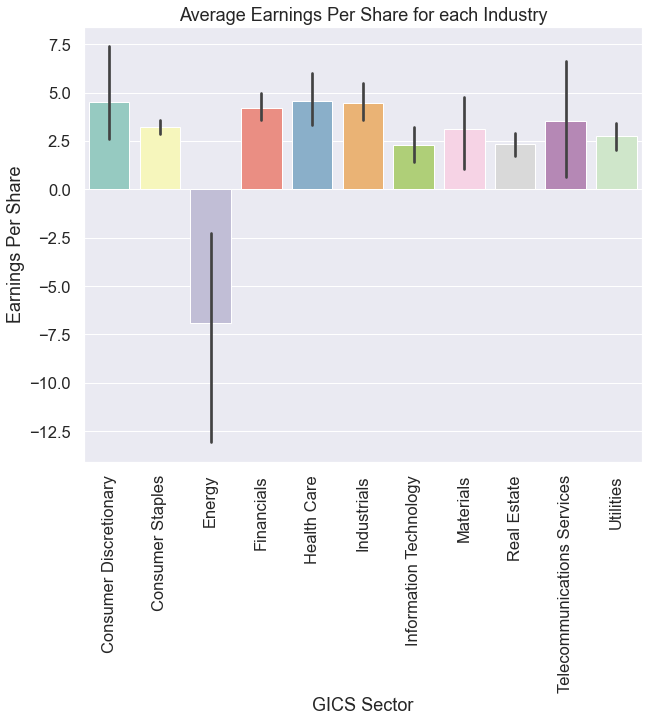

<IPython.core.display.Javascript object>

In [224]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="Earnings Per Share", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average Earnings Per Share for each Industry")
plt.show()

**Observations:**

- This bar plot is consistent whit the prior analysis for P/E ratio and how the earnings are distributed among the different economic sectors.
- Energy industry shows a negative earnings per share with an average of -7 dollars per share.
- Consumer discretionary, health care and industrial are the sectors with better earning per share ( around 4.75 dollars per share)


### 9. ROE per industry

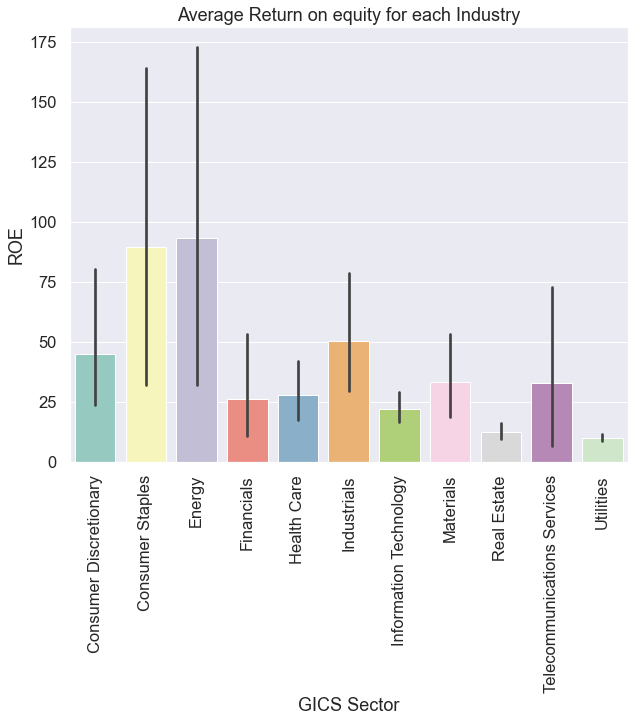

<IPython.core.display.Javascript object>

In [225]:
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="GICS Sector", y="ROE", palette="Set3")
plt.xticks(rotation=90)
plt.title("Average Return on equity for each Industry")
plt.show()

**Observations:**
    
- ROE is a ration that provide information about ration between a company net income and its equity. 
- High ROE it usually a good indication of high earning potential but other times is an indication of risk because the company may have small equity (due to loss that can be deducted from equity). 
- In the above bar plot, Energy and consumer staples are the two industries with the highest  ROE ( near 100),  but further analysis is needed to understand that ratio considering that for the other sectors the average does not surpasses 50.
. 

## 4. Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### a. Outlier check/treatment

In [226]:
#creating a list of varibles to check outliers by using a for loop
list_outliers = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/B Ratio",
    "P/E_ratio_new",
]


<IPython.core.display.Javascript object>

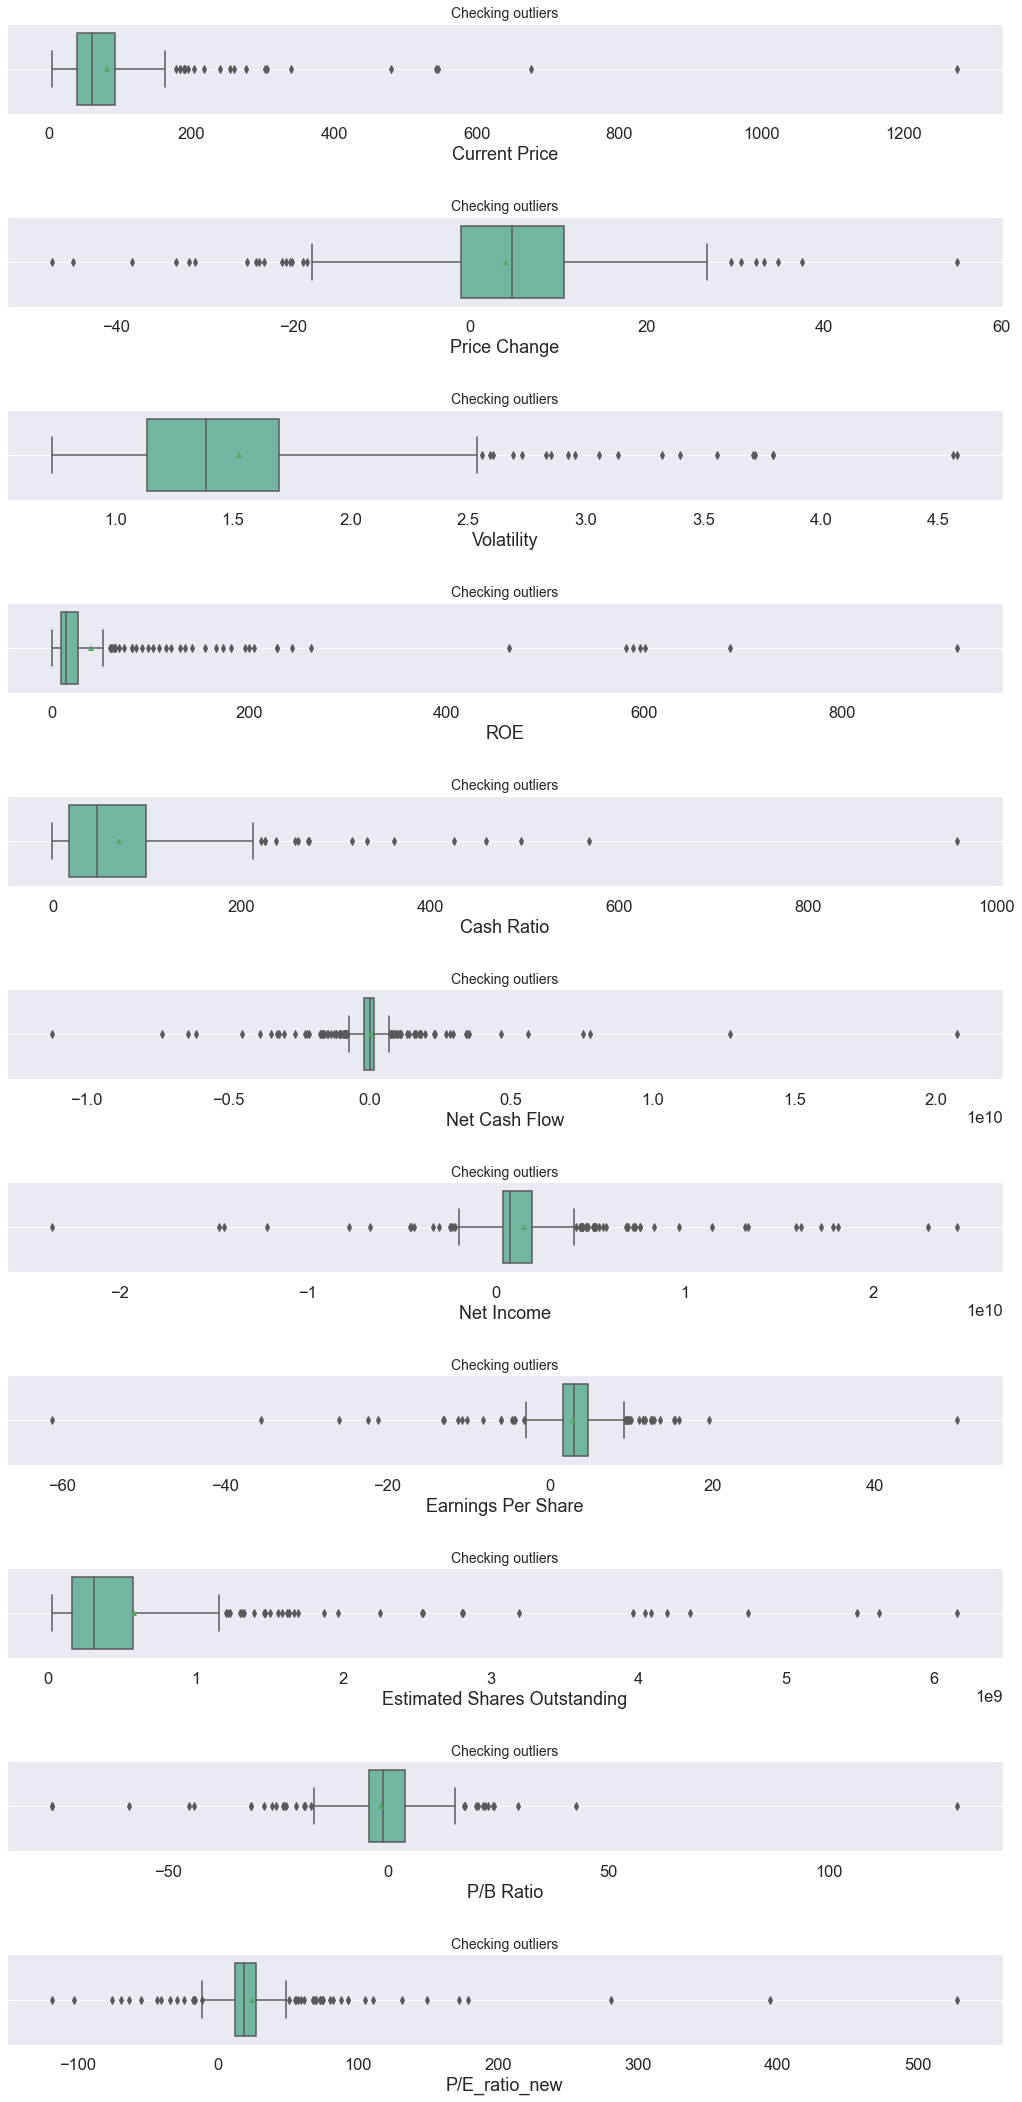

<IPython.core.display.Javascript object>

In [227]:

plt.figure(figsize=(15, 30))#setting size of plot
#creating 11 subplots with a boxplot per variable

for i, col in enumerate(list_outliers):
    plt.subplot(11, 1, i + 1)
    sns.boxplot(data=df[list_outliers], x=df[col], palette="Set2", showmeans=True)
    plt.tight_layout(pad=2)#addint space between plots
    plt.title("Checking outliers", fontdict={"fontsize": 14})# add title
    plt.grid()
    plt.show


**Observations:**

- All variables contain outliers, but we are not going to treat them since we still need to scale data. 
- The outliers should be included in the distributions to find different clusters. If we trim outliers, we may be altering the nature of the variables and would be incapable of finding all the clusters.


### b. Scaling data

In [228]:
# creating a subplot to scale data in numeric variables
df_num = df.select_dtypes(np.number)

<IPython.core.display.Javascript object>

In [229]:
# We drop P/E ration since we are going to work with P/E ratio_new
df_num = df_num.drop("P/E Ratio", axis=1)
df_num.head(3)

Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0         42.350        10.000       1.687  135          51     -604000000   
1         59.240         8.339       2.198  130          77       51000000   
2         44.910        11.301       1.274   21          67      938000000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
0  7610000000              11.390                 668129938.500     -8.784   
1  5144000000               3.150                1633015873.000     -8.750   
2  4423000000               2.940                1504421769.000     -0.394   

   P/E_ratio_new  
0          3.718  
1         18.806  
2         15.276

<IPython.core.display.Javascript object>

In [230]:
# apply StandardScaler from SKlearn (substract mean and divide by standar deviation). Output will be a array
Scaler = StandardScaler()
df_scaler_array = Scaler.fit_transform(df_num)

<IPython.core.display.Javascript object>

In [231]:
# converting df_scaler into a dataframe
df_scaler = pd.DataFrame(df_scaler_array, columns=df_num.columns)


<IPython.core.display.Javascript object>

## 4.1 EDA After scaling variables
- It is a good idea to explore the data once again after manipulating it.

### Checking the variables after applying StandardScaling from SKlearn

In [232]:
# creating list to apply for loop to visuazize
df_scaler_list = df_scaler.columns
df_scaler_list

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/B Ratio', 'P/E_ratio_new'],
      dtype='object')

<IPython.core.display.Javascript object>

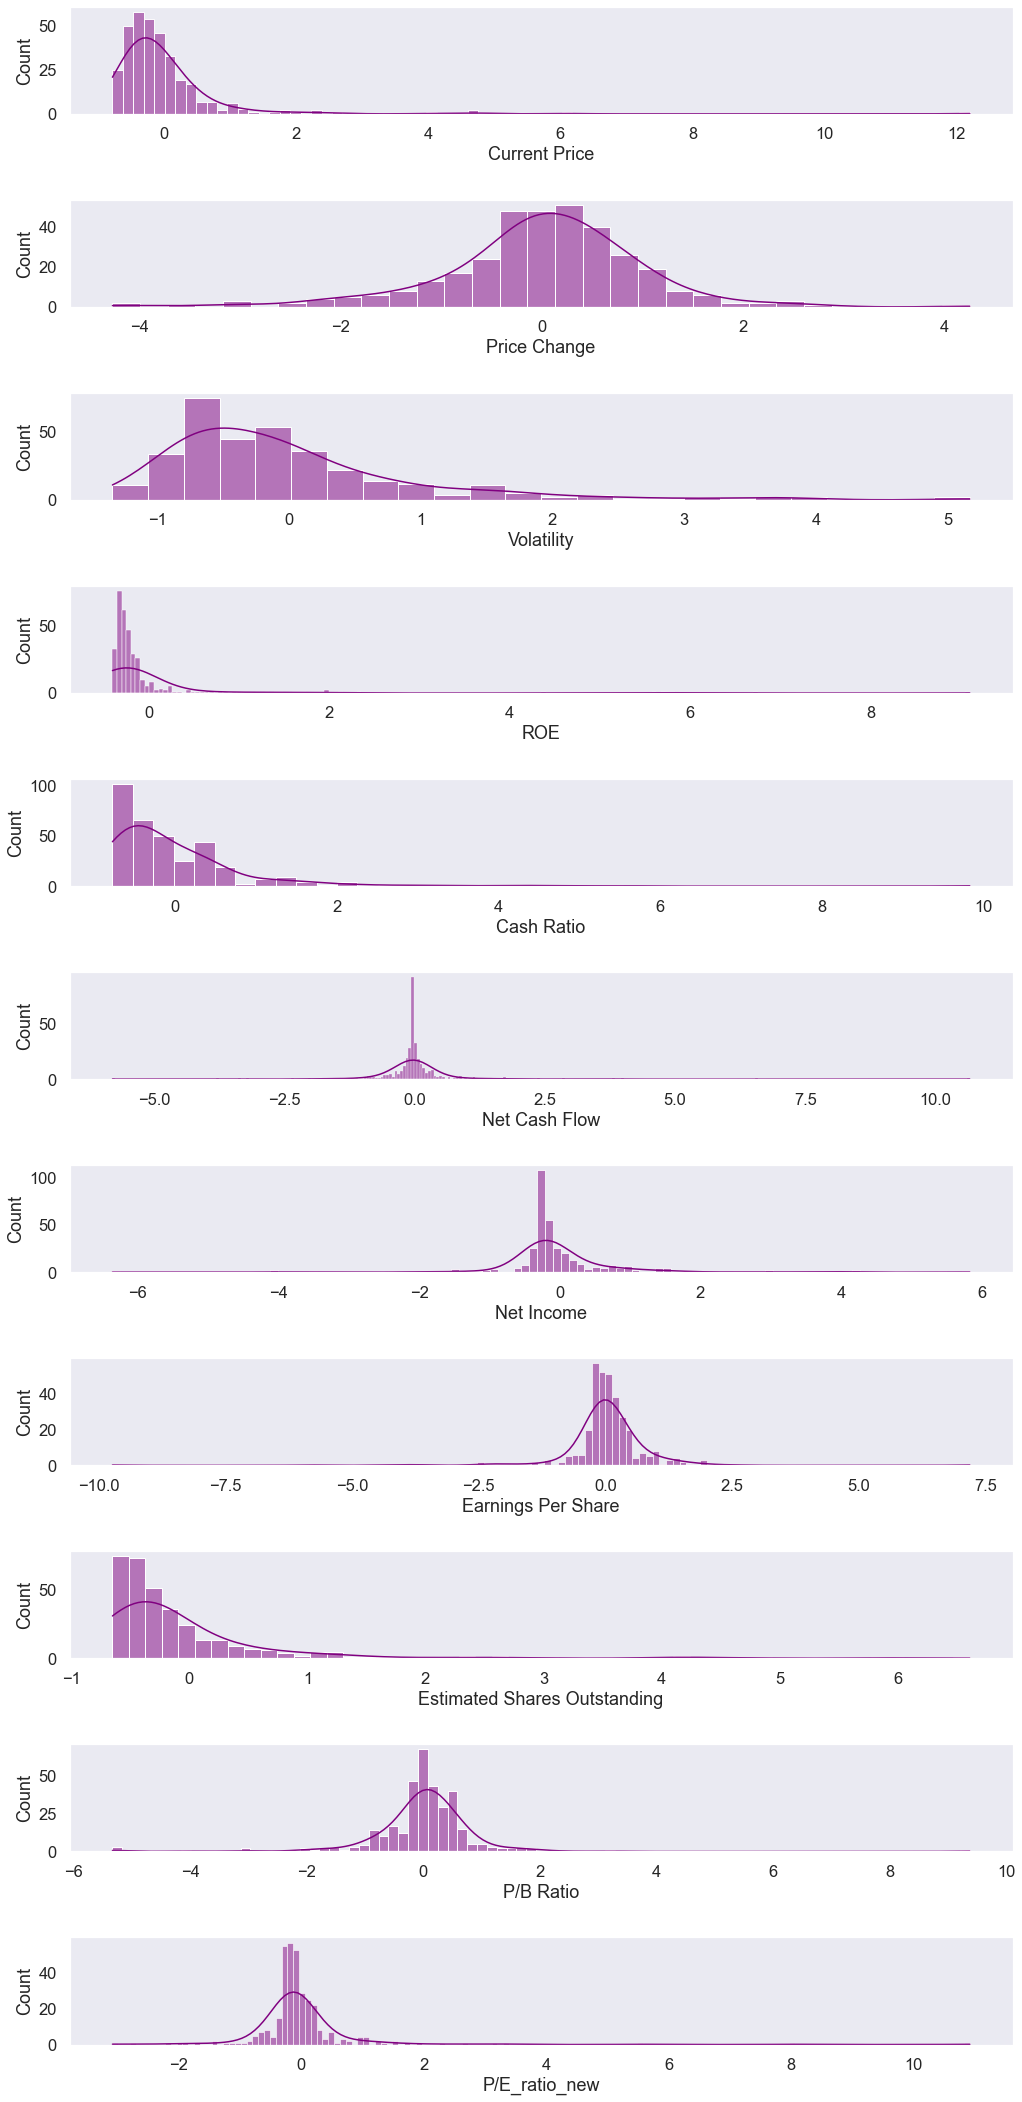

<IPython.core.display.Javascript object>

In [233]:
plt.figure(figsize=(15, 30))#setting size of plot

for i, col in enumerate(df_scaler_list):
    plt.subplot(11, 1, i + 1)
    sns.histplot(data=df_scaler,x=df_scaler[col], stat="count", color="purple",  kde=True)
    plt.tight_layout(pad=2)#adding space between plots
    plt.grid()
    plt.show


**Observations:**

- We can appreciate a change in the scale of the variables. 
- The scaling method has moved the variables along the axis. All variables have been reduced and it is noticeable in the x axis.
- When comparing scaled distribution with the previous ones, we do not appreciate a significant change in terms of the shape.
- Scaling the variables is very important since we are performing a cluster analysis; otherwise, the bigger variables will overpower the analysis.


### Cheking outliers on the Scale variables

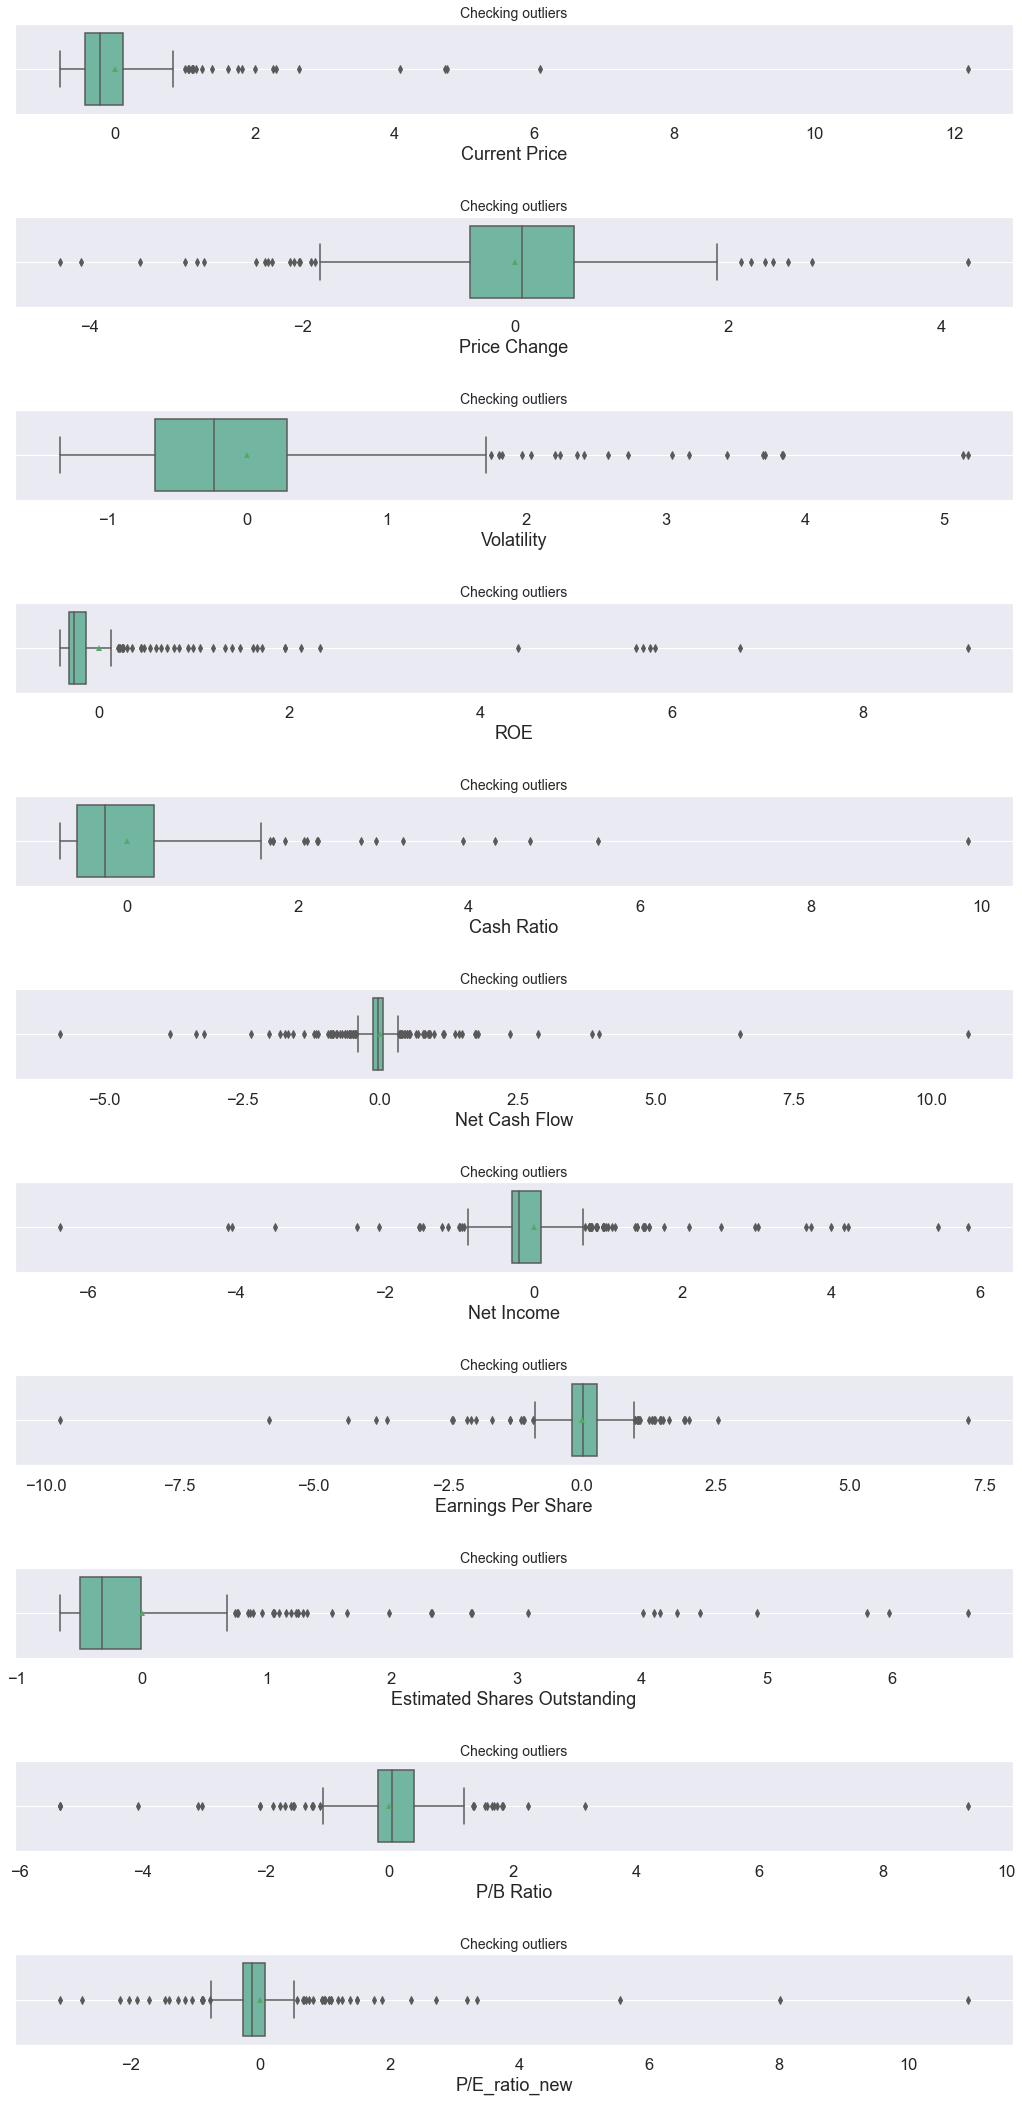

<IPython.core.display.Javascript object>

In [234]:
plt.figure(figsize=(15, 30))  # setting size of plot
# creating 11 subplots with a boxplot per variable

for i, col in enumerate(df_scaler_list):
    plt.subplot(11, 1, i + 1)
    sns.boxplot(data=df_scaler, x=df_scaler[col], palette="Set2", showmeans=True)
    plt.tight_layout(pad=2)  # addint space between plots
    plt.title("Checking outliers", fontdict={"fontsize": 14})  # add title
    plt.grid()
    plt.show

**Outlier treatment**

we could cap and trim the most extreme outlier to see if this improve our clustering later one.

In [235]:
# Making a copy to treat outliers
df_scaler_out = df_scaler.copy()

<IPython.core.display.Javascript object>

In [236]:
# listing variable of the df_scaler_out data frame.
list_scaler_out = df_scaler_out.columns

<IPython.core.display.Javascript object>

We are capping and flooring outliers by setting an maximum value and minimum to each numeric variable (col) .
Lower outlier is Q1-4 *IQR,calculation for the minimum values accepted

Upper outlier is Q3+4 *IQR, calculation for the maximun values accepted The above information shows the formulas used for treating outliers in a very conservative way. We do not want to modify many of the outlier values.

Q1=df_scaler_out[col].quantile(0.25)# 25th quantile

Q3=df_scaler_out[col].quantile(0.75)# 75th quantile

IQR=Q3-Q1# interquartile range

lw=Q1-4*IQR#lower whisker

uw=Q3+4*IQR# upper whisker



In [237]:
for col in list_scaler_out:

    Q1 = df_scaler_out[col].quantile(0.25)

    Q3 = df_scaler_out[col].quantile(0.75)

    IQR = Q3 - Q1

    lw = Q1 - 4 * IQR

    uw = Q3 + 4 * IQR

    print(col, lw, uw)

    df_scaler_out[col] = np.clip(df_scaler_out[col], lw, uw)

    print("min", df_scaler_out[col].min(), "max", df_scaler_out[col].max())

    print("************************")

Current Price -2.651468488695851 2.342108393954701
min -0.7799176336460593 max 2.342108393954701
************************
Price Change -4.300526193996259 4.433953954089253
min -4.271357342885001 max 4.251805745883049
************************
Volatility -4.457028703951267 4.082151277522842
min -1.3416420408807237 max 4.082151277522842
************************
ROE -1.025326439664795 0.5850596623854969
min -0.40036178492386054 max 0.5850596623854969
************************
Cash Ratio -4.164700107910301 3.9094392509114804
min -0.7755551918616517 max 3.9094392509114804
************************
Net Cash Flow -0.8769294207096805 0.8073791616890706
min -0.8769294207096805 max 0.8073791616890706
************************
Net Income -1.862791880459338 1.6753485563706951
min -1.862791880459338 max 1.6753485563706951
************************
Earnings Per Share -2.0475813563847836 2.1424686349398225
min -2.0475813563847836 max 2.1424686349398225
************************
Estimated Shares Outstanding

<IPython.core.display.Javascript object>

**Let's visualize the distributions after outliers treatment**

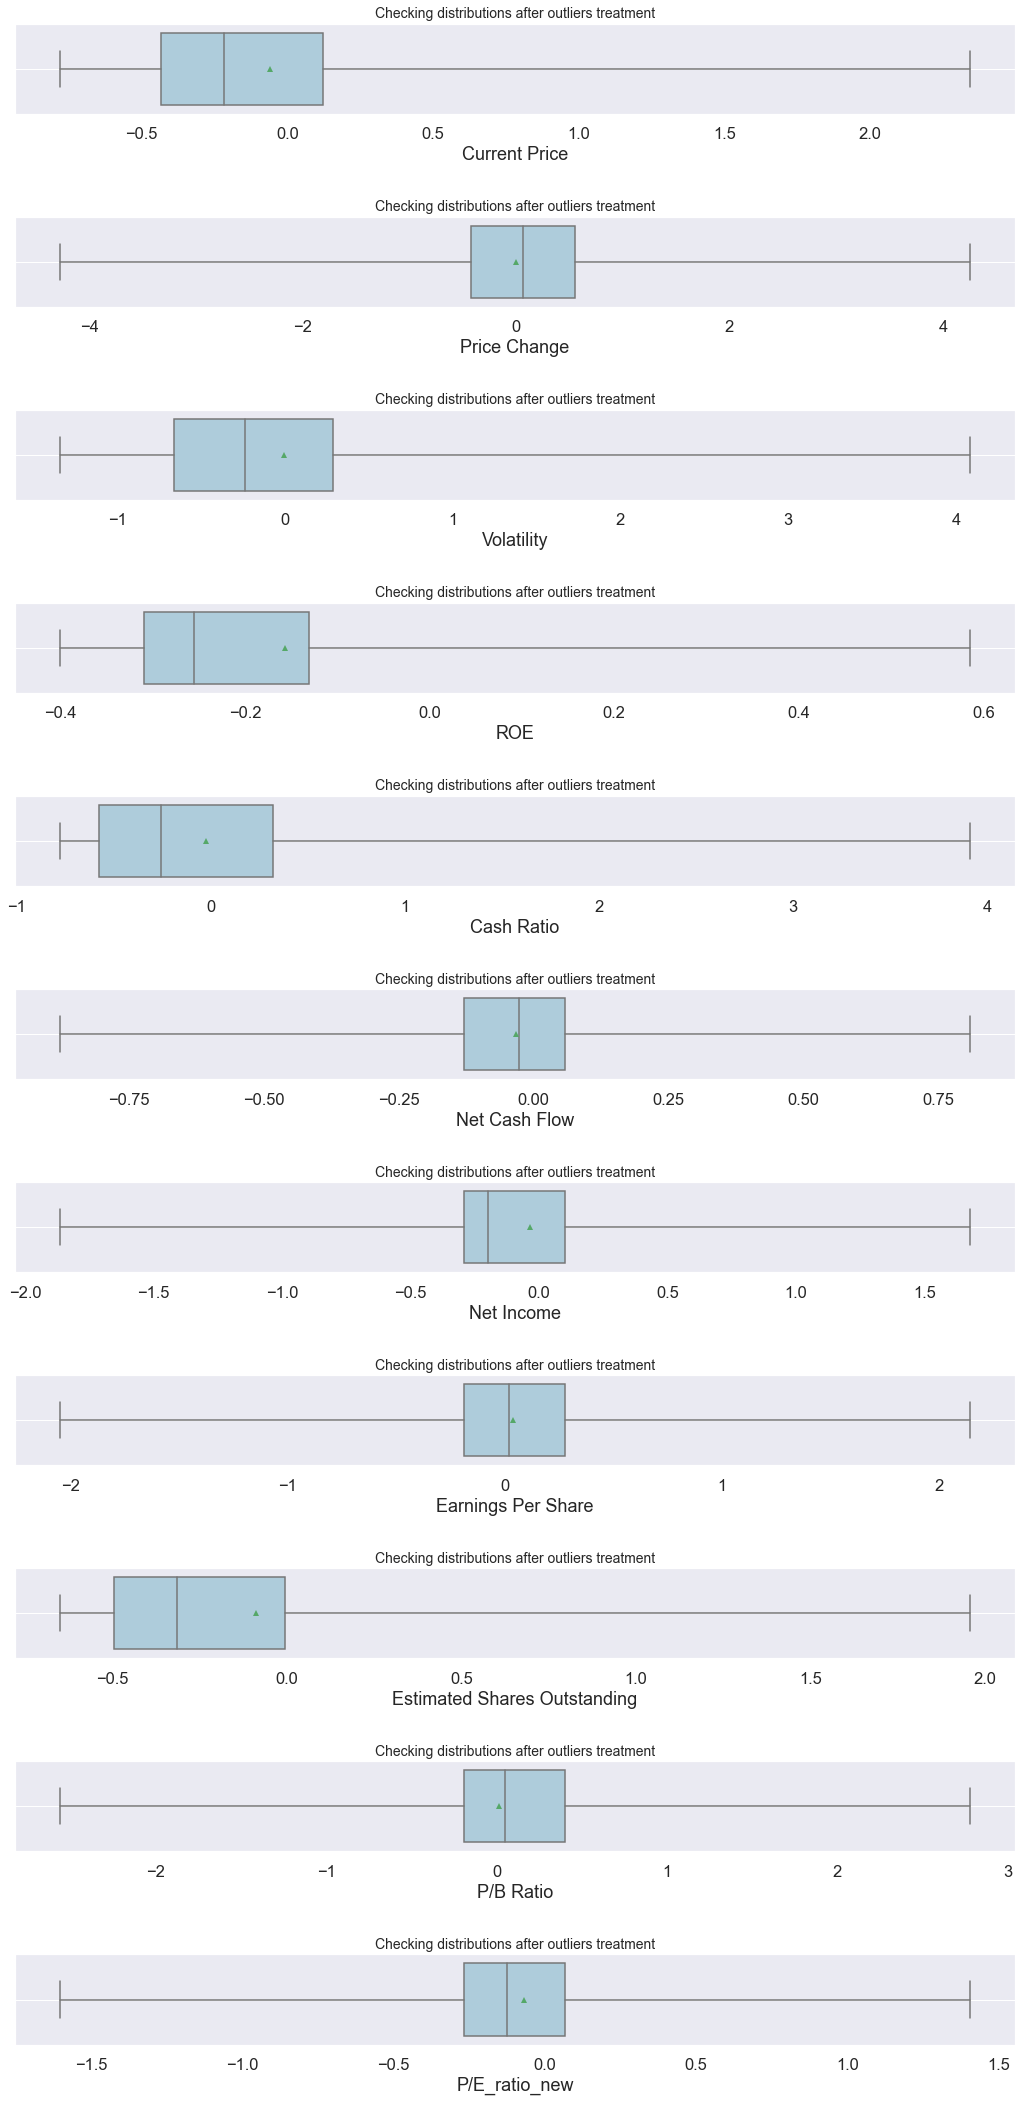

<IPython.core.display.Javascript object>

In [238]:
plt.figure(figsize=(15, 30))  # setting size of plot
# creating 11 subplots with a boxplot per variable

for i, col in enumerate(list_scaler_out):
    plt.subplot(11, 1, i + 1)
    sns.boxplot(
        data=df_scaler_out,
        x=df_scaler_out[col],
        palette="Paired",
        showmeans=True,
        whis=4,
    )
    plt.tight_layout(pad=2)  # addint space between plots
    plt.title(
        "Checking distributions after outliers treatment", fontdict={"fontsize": 14}
    )  # add title
    plt.grid()
    plt.show

**Observations:**
- As we mention previously, the variables have been scaled and reduced so the x-axis is showing smaller values for each variable.
- We can see a big number of outliers in all distributions.
- We are not going to apply any outlier treatment at this moment because lose valuable information  and influence the clustering by not taking into account all the possible clusters.


## 5. K-means Clustering

### 5.1 K-Means clustering without outlier treatment

In [239]:
# creating a copy of the scaled data to performe k-mean clusters analysis
df_scaler_KM = df_scaler.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 Average Distance: 2.5438667838432236
Number of Clusters: 2 Average Distance: 2.4083985010254154
Number of Clusters: 3 Average Distance: 2.2962266018877306
Number of Clusters: 4 Average Distance: 2.20281980423683
Number of Clusters: 5 Average Distance: 2.147024210557687
Number of Clusters: 6 Average Distance: 2.079049869000347
Number of Clusters: 7 Average Distance: 2.034371824463964
Number of Clusters: 8 Average Distance: 2.0156208137603087
Number of Clusters: 9 Average Distance: 1.9417932220639527


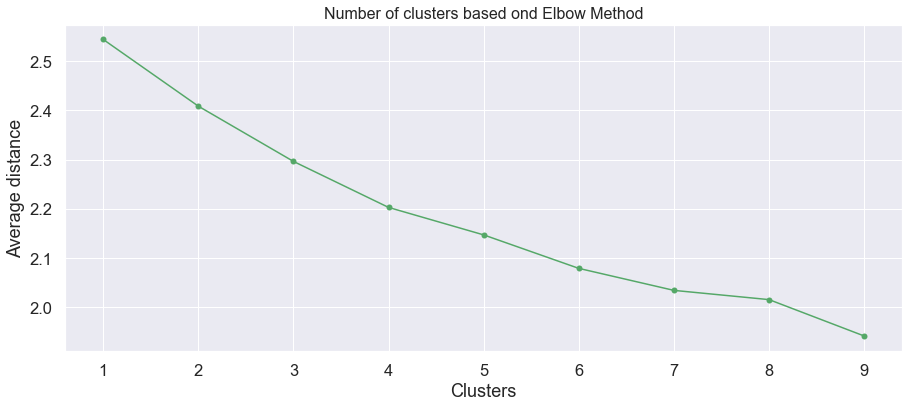

Wall time: 1.28 s


<IPython.core.display.Javascript object>

In [240]:
%%time
clusters = range(
    1, 10
)  # we are creating a range of possible clusters 
meanDistortions = []  # we create a empty list to store all possible results of distance
# for loop to try find the distance among clusters based on number of clusters
for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_scaler_KM)
    prediction = model.predict(df_scaler_KM)
    distortion = (
        sum(np.min(cdist(df_scaler_KM, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaler_KM.shape[0]
    )  # calculating distance

    meanDistortions.append(
        distortion
    )  # appending distance results per cluster to the meanDistortion list

    print(
        "Number of Clusters:", k, "Average Distance:", distortion
    )  # printing for each

plt.figure(figsize=(15, 6))
plt.plot(clusters, meanDistortions, "o-g")
plt.xlabel("Clusters")
plt.ylabel("Average distance")
plt.title("Number of clusters based ond Elbow Method", fontsize=16)
plt.show()

**Observations:**
    
- The appropriate value according to Elbow method is 3 or 4 because the line flattens up after number 4 but it is not clear which of the two would be a better number of clusters.
- Let's calculate the silhouette score to help us decide the best number of clusters.


#### Silhouette score

In [241]:
%%time
sil_score_list=[]# creating an empty list to store all silhouette_scores
cluster_list=list(range(2,10))# creating number of clusters from 2 to 9
#creating a for loop to calculate silhouette score based on number of cluster provided
for number_clusters in cluster_list:
    clusterer=KMeans(n_clusters=number_clusters, random_state=1)
    prediction=clusterer.fit_predict(df_scaler_KM)# assign data to different clusters
    sil_score = silhouette_score(df_scaler_KM, prediction)#calculate silhuette score per cluster
    sil_score_list.append(sil_score)#add silhuette scoring to the empty list
    print(f'For number of clusters {number_clusters} the silhuette score is {sil_score}')

For number of clusters 2 the silhuette score is 0.4051015270157931
For number of clusters 3 the silhuette score is 0.43181224687984143
For number of clusters 4 the silhuette score is 0.4380245161703601
For number of clusters 5 the silhuette score is 0.43887392101927525
For number of clusters 6 the silhuette score is 0.3950450030719866
For number of clusters 7 the silhuette score is 0.3482924267256234
For number of clusters 8 the silhuette score is 0.3849268040875034
For number of clusters 9 the silhuette score is 0.36999235626566873
Wall time: 553 ms


<IPython.core.display.Javascript object>

Text(0, 0.5, 'silhuette score')

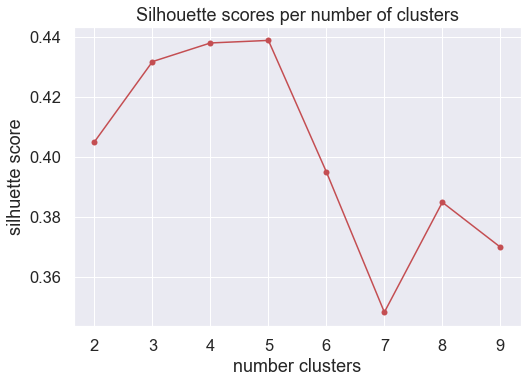

<IPython.core.display.Javascript object>

In [242]:
plt.plot(cluster_list, sil_score_list, "o-r")
plt.title("Silhouette scores per number of clusters")
plt.xlabel("number clusters")
plt.ylabel("silhuette score")


**Observations**
- According to Silhouette score analysis our best number of clusters is 5. 
- The gain from 4 to 5 clusters is very small in terms of silhouette score so we will stick to 4 clusters to simplify the analysis and profiling.


### Visualizing the optimal number of clusters

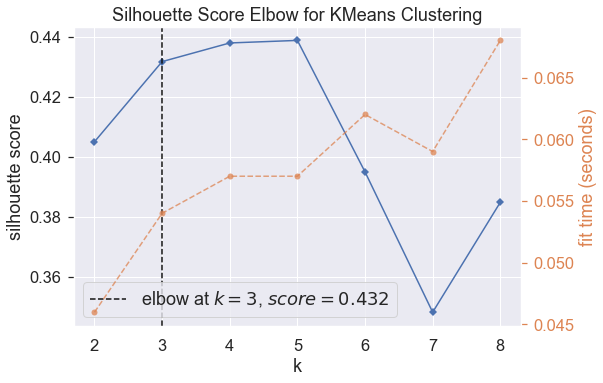

Wall time: 777 ms


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [243]:
%%time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 9), metric="silhouette", timings=True)
visualizer.fit(df_scaler_KM)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

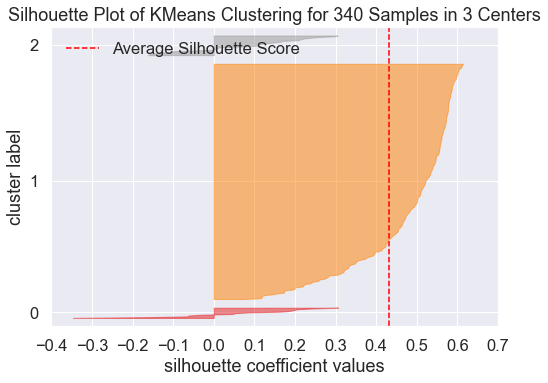

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [244]:
# visualizing silhouette coefficients for 3 clusers
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(df_scaler_KM)
visualizer.show()

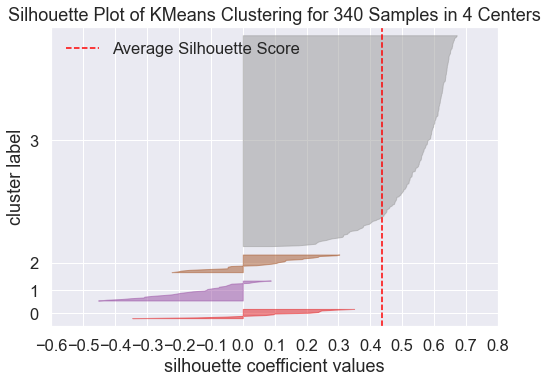

Wall time: 345 ms


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [245]:
%%time
# visualizing silhouette coefficients for 4 clusers
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaler_KM)
visualizer.show()

**Observations:**
- Silhouette score and Elbow method combined are showing 3 clusters as optimal results.
- When plotting the silhouette coefficient for number of clusters 3 and 4, none of them is showing well defined clusters because we can see some points with negative silhouette coefficient values in both plots.
- Choosing 3 clusters seems to be a better option because contains less values in the negative area of the silhouette coefficient.
-  For both possible clusters, the average silhouette coefficient is mediocre. In general, the maximum possible silhouette coefficient is 1 but after our optimal number of clusters show a coefficient of 0.431 (which is not very different the coefficient assigned to 4 clusters, 0.438).


### 5.2 K_Means clustering with outlier treatment

In [246]:
# creating a copy of the scaled data trated for outliers to performe k-mean clusters analysis
df_scaler_out_KM = df_scaler_out.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 Average Distance: 1.9911572212047628
Number of Clusters: 2 Average Distance: 1.8235532372913894
Number of Clusters: 3 Average Distance: 1.7286866115085282
Number of Clusters: 4 Average Distance: 1.6303254536244056
Number of Clusters: 5 Average Distance: 1.5550942867258908
Number of Clusters: 6 Average Distance: 1.502128803232618
Number of Clusters: 7 Average Distance: 1.470436523695205
Number of Clusters: 8 Average Distance: 1.424551753387384
Number of Clusters: 9 Average Distance: 1.387826055989351


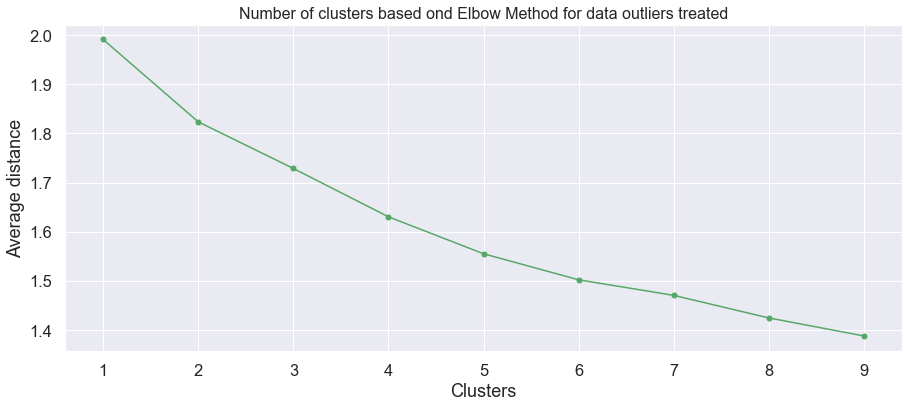

Wall time: 1.32 s


<IPython.core.display.Javascript object>

In [247]:
%%time
clusters2 = range(
    1, 10
)  # we are creating a range of possible clusters 
meanDistortions2 = []  # we create a empty list to store all possible results of distance
# for loop to try find the distance among clusters based on number of clusters
for k in clusters2:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(df_scaler_out_KM)
    prediction = model.predict(df_scaler_out_KM)
    distortion = (
        sum(np.min(cdist(df_scaler_out_KM, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaler_out_KM.shape[0]
    )  # calculating distance

    meanDistortions2.append(
        distortion
    )  # appending distance results per cluster to the meanDistortion list

    print(
        "Number of Clusters:", k, "Average Distance:", distortion
    )  # printing for each

plt.figure(figsize=(15, 6))
plt.plot(clusters2, meanDistortions2, "o-g")
plt.xlabel("Clusters")
plt.ylabel("Average distance")
plt.title("Number of clusters based ond Elbow Method for data outliers treated", fontsize=16)
plt.show()

**Obsevations:**
    
- We can see the line flattens up after the number 2, suggesting 2 clusters as best option for data without outliers.


In [248]:
%%time
sil_score_list2=[]# creating an empty list to store all silhouette_scores
cluster_list2=list(range(2,10))# creating number of clusters from 2 to 9
#creating a for loop to calculate silhouette score based on number of cluster provided
for number_clusters in cluster_list2:
    clusterer=KMeans(n_clusters=number_clusters, random_state=1)
    prediction=clusterer.fit_predict(df_scaler_out_KM)# assign data to different clusters
    sil_score = silhouette_score(df_scaler_out_KM, prediction)#calculate silhuette score per cluster
    sil_score_list2.append(sil_score)#add silhuette scoring to the empty list
    print(f'For number of clusters {number_clusters} the silhuette score is {sil_score}')

For number of clusters 2 the silhuette score is 0.34667551672934926
For number of clusters 3 the silhuette score is 0.31427953371486095
For number of clusters 4 the silhuette score is 0.23139639489120692
For number of clusters 5 the silhuette score is 0.13988801944539142
For number of clusters 6 the silhuette score is 0.1384102407624786
For number of clusters 7 the silhuette score is 0.17795185758129556
For number of clusters 8 the silhuette score is 0.14486052170803912
For number of clusters 9 the silhuette score is 0.1537579471645614
Wall time: 639 ms


<IPython.core.display.Javascript object>

Text(0, 0.5, 'silhuette score')

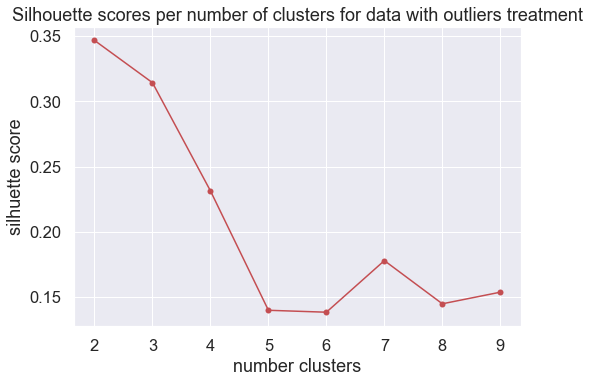

<IPython.core.display.Javascript object>

In [249]:
plt.plot(cluster_list2, sil_score_list2, "o-r")
plt.title("Silhouette scores per number of clusters for data with outliers treatment")
plt.xlabel("number clusters")
plt.ylabel("silhuette score")


**Observations**:
- The highest silhouette score is 0.34 what is much lower than the previous one with not outlier treatment.


#### Visuallizing Elbow method and silhouette score and coefficient  for data with outlier treatment

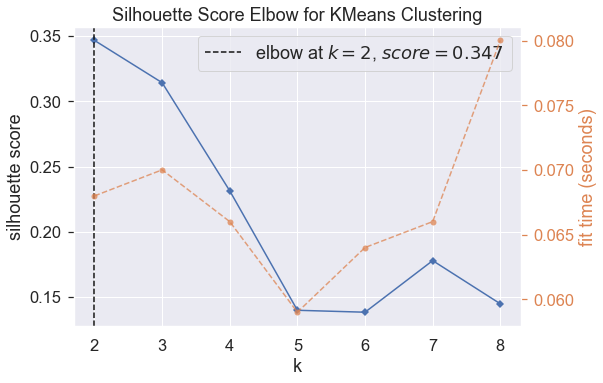

Wall time: 849 ms


<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [250]:
%%time
model2 = KMeans(random_state=1)
visualizer = KElbowVisualizer(model2, k=(2, 9), metric="silhouette", timings=True)
visualizer.fit(df_scaler_out_KM)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

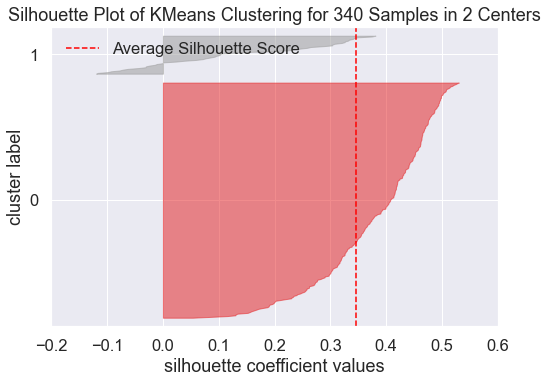

Wall time: 305 ms


<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [251]:
%%time
# visualizing silhouette coefficients for 2 clusers
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(df_scaler_out_KM)
visualizer.show()

**Observations:**

- The silhouette score elbow plot is showing the same number of clusters that we initially suggested, what is 2 clusters.
- For data with outlier treatment, the clusters are better defined, and both are above the average coefficient as we can see in the silhouette visualizer but unfortunately the coefficients is not very good (only 0.34).
- In regards with clusters defined, we still can see some data on the negative area of the silhouette coefficient, which is a sign of data points assigned to the wrong cluster.
- Two clusters simplify the profiling but the loss in terms of silhouette coefficient does not support to choose the data set with outlier treatment.


### 5.3 Choosing 3 as number of clusters for data without outlier treatment

In [252]:
# choosing number of cluster3 and fitting data frame in the K-means model
model = KMeans(n_clusters=3, random_state=1)
model.fit(df_scaler_KM)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [253]:
# Creating a copy of df wihtout initial P/E ratio column
df1 = df.drop("P/E Ratio", axis=1)

<IPython.core.display.Javascript object>

In [254]:
# Assingning different securities to the closest cluster (with the closest k_mean)
df1["stock_type"] = model.labels_
df_scaler_KM["stock_type"] = model.labels_

<IPython.core.display.Javascript object>

In [255]:
# checking the data with stock_type column added
df1.sample(5, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production         32.000       -15.478   
125        Internet Software & Services        104.660        16.224   
11                                REITs         40.030         7.579   
248                   Personal Products         79.410        10.661   
238  Oil & Gas Exploration & Production         67.610         0.865   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102       2.924  205          70      830000000 -14454000000   
125       1.321    8         958      592000000   3669000000   
11        1.163   15          47       21818000    248710000   
248       0.806   17         129      160383000    636056000   
238       1.590   32          64     -588000000  -7829000000   

     Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
102             -35.550                 406582278.500      1.786   
125               1.310                2800763359.000      5.884   
11                1.520                 163625000.000     -1.269   
248               3.280                 491391569.000     -2.257   
238             -10.230                 765298142.700      3.345   

     P/E_ratio_new  stock_type  
102         -0.900           2  
125         79.893           0  
11          26.336           1  
248         24.210           1  
238         -6.609           2

<IPython.core.display.Javascript object>

### 5.4 Cluster Profiling

In [256]:
# creating a data frame group by type of stocks and mean values.
cluster_profile = df1.groupby("stock_type").mean()
# creating a data frame group by type of stocks and median values.
cluster_profile_med = df1.groupby("stock_type").median()

<IPython.core.display.Javascript object>

- Because of the great amount of outliers, the median values are more representative of the distribution, so we are using them for profile analysis.

In [257]:
# counting number of securities in each cluster
cluster_profile["count_stock"] = (
    df1.groupby("stock_type")["Current Price"].count().values
)
# counting number of securities in each cluster
cluster_profile_med["count_stock"] = (
    df1.groupby("stock_type")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [258]:
# show cluster profile information for mean values
cluster_profile.T.style.highlight_max(color="cyan", axis=1)

<IPython.core.display.Javascript object>

In [259]:
# show cluster profile information for medium values
cluster_profile_med.T.style.highlight_max(color="pink", axis=1)

<IPython.core.display.Javascript object>

### Visualizing the clusters

In [260]:
list_column_scaled_df = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/B Ratio",
    "P/E_ratio_new",
]
list_column_scaled_df

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/B Ratio',
 'P/E_ratio_new']

<IPython.core.display.Javascript object>

#### Cluster visualization on Scaled data

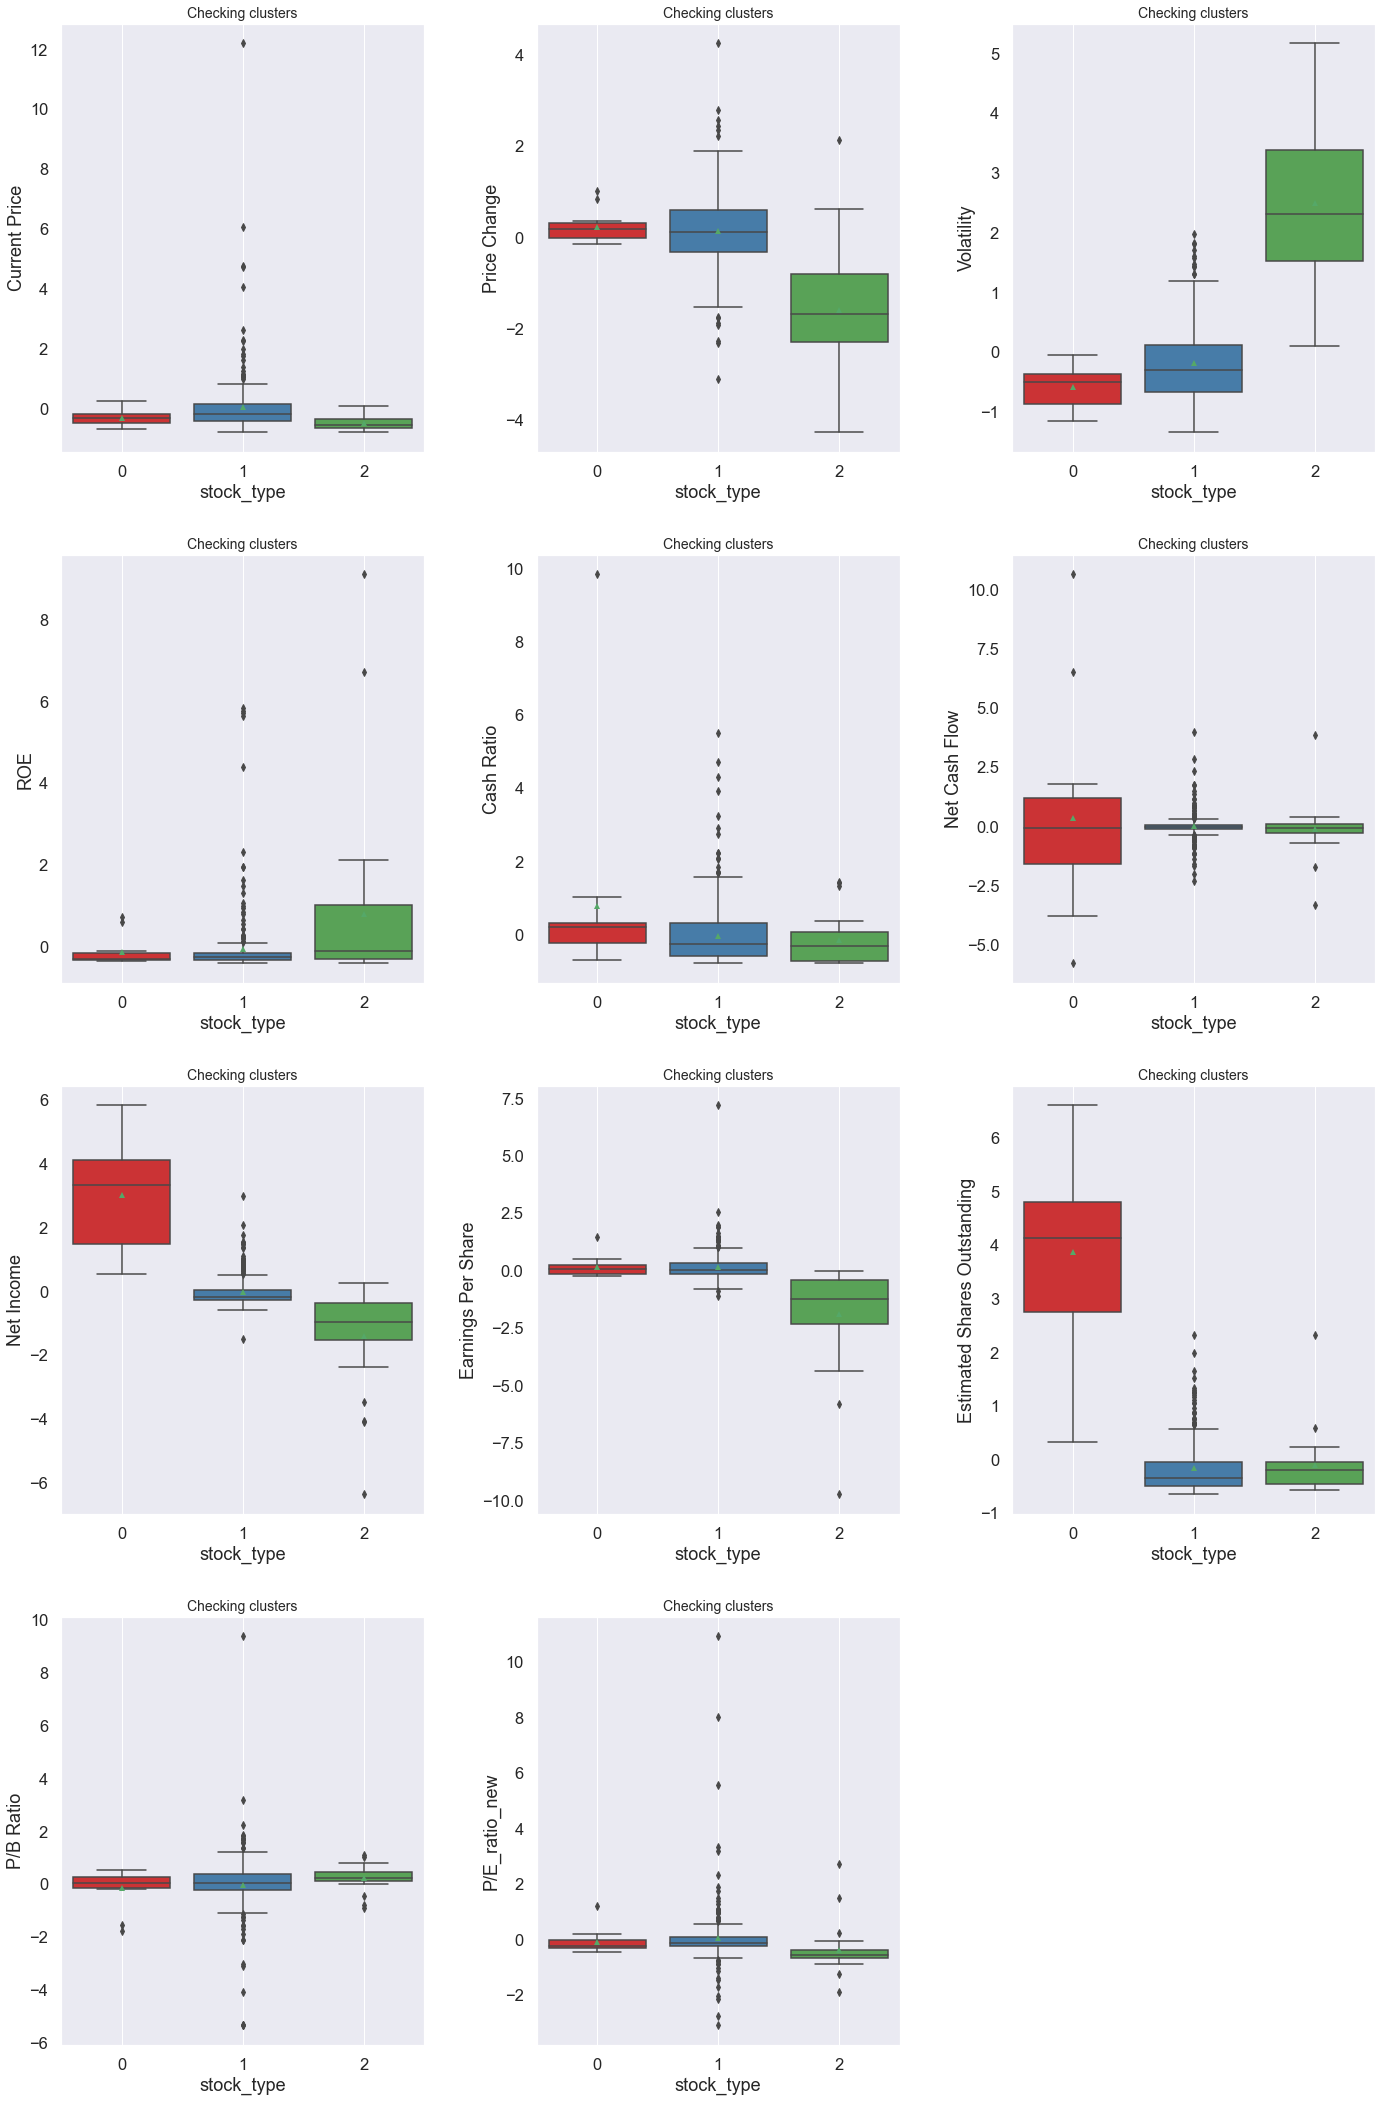

<IPython.core.display.Javascript object>

In [261]:
plt.figure(figsize=(20, 30))  # setting size of plot
# creating subplots with a boxplot per variable

for i, col in enumerate(list_column_scaled_df):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df_scaler_KM,
        y=df_scaler_KM[col],
        x=df_scaler_KM["stock_type"],
        palette="Set1",
        showfliers=True,
        showmeans=True,
    )
    plt.tight_layout(pad=2)  # addint space between plots
    plt.title("Checking clusters", fontdict={"fontsize": 14})  # add title
    plt.grid()
    plt.show

#### Cluster visualization in original data set

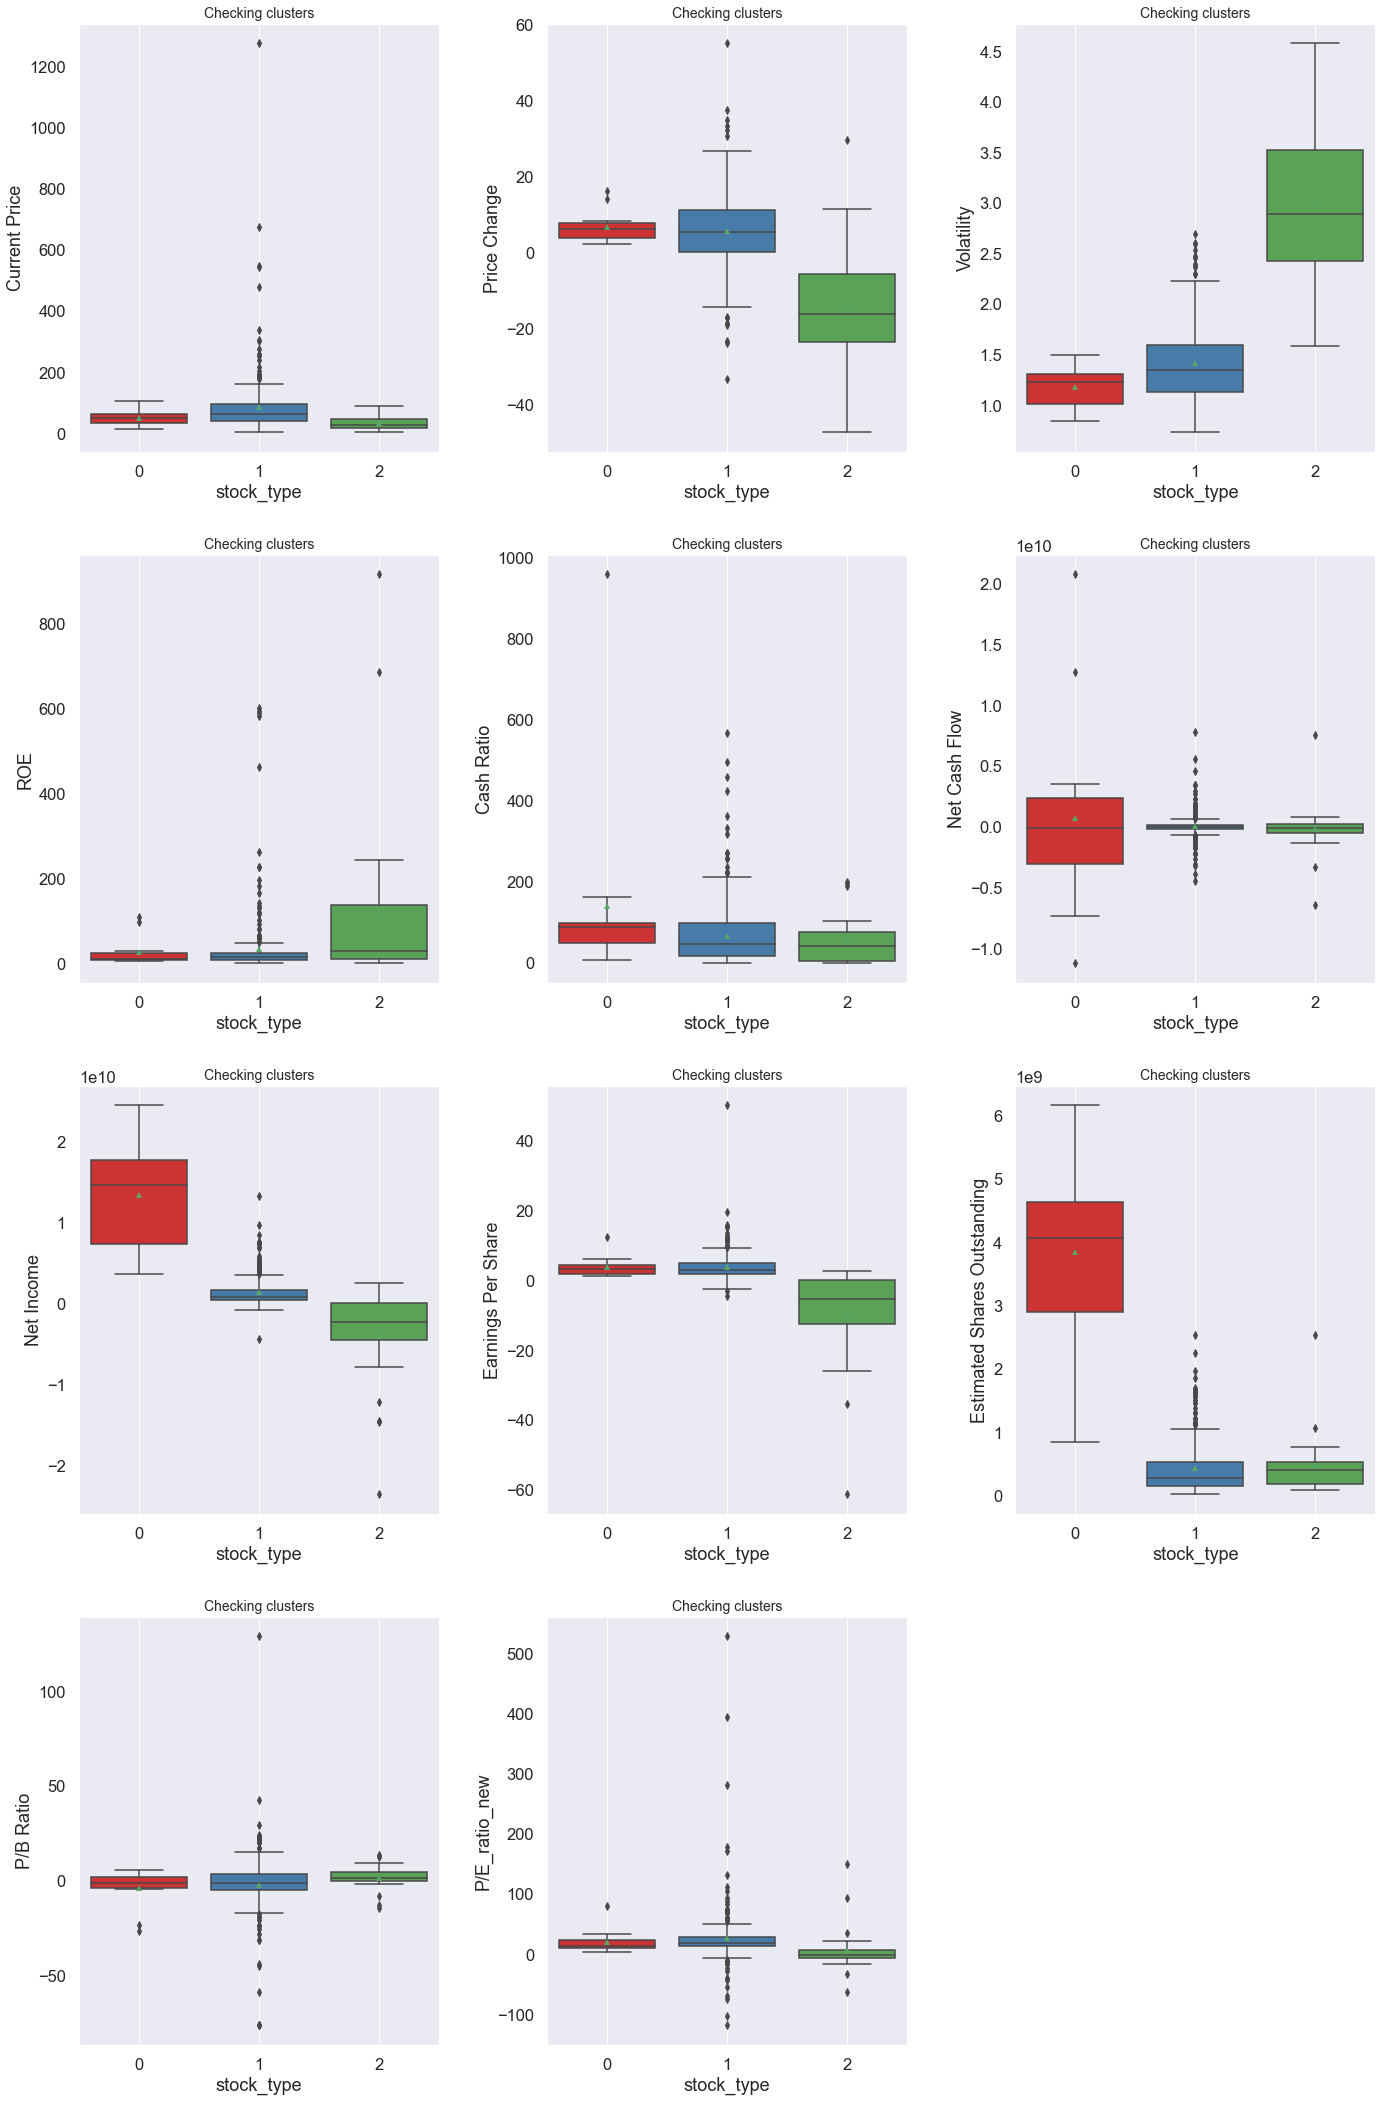

<IPython.core.display.Javascript object>

In [262]:
plt.figure(figsize=(20, 30))  # setting size of plot
# creating subplots with a boxplot per variable

for i, col in enumerate(list_column_scaled_df):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df1, y=df1[col], x=df1["stock_type"], palette="Set1", showmeans=True,
    )
    plt.tight_layout(pad=2)  # addint space between plots
    plt.title("Checking clusters", fontdict={"fontsize": 14})  # add title
    plt.grid()
    plt.show

In [263]:
# CLUSTER0
df1[df1["stock_type"] == 0].sample(3, random_state=1)

Ticker Symbol              Security             GICS Sector  \
125            FB              Facebook  Information Technology   
181            KO     Coca Cola Company        Consumer Staples   
177           JPM  JPMorgan Chase & Co.              Financials   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
125  Internet Software & Services        104.660        16.224       1.321   
181                   Soft Drinks         42.960         6.813       0.890   
177                         Banks         66.030         8.033       1.130   

     ROE  Cash Ratio  Net Cash Flow   Net Income  Earnings Per Share  \
125    8         958      592000000   3669000000               1.310   
181   29          74    -1649000000   7351000000               1.690   
177   10          99    -7341000000  24442000000               6.050   

     Estimated Shares Outstanding  P/B Ratio  P/E_ratio_new  stock_type  
125                2800763359.000      5.884         79.893           0  
181                4349704142.000     -1.466         25.420           0  
177                4040000000.000     -1.887         10.914           0

<IPython.core.display.Javascript object>

In [264]:
# CLUSTER1
df1[df1["stock_type"] == 1].sample(3, random_state=1)

Ticker Symbol           Security             GICS Sector  \
209           MMC   Marsh & McLennan              Financials   
136          FSLR    First Solar Inc  Information Technology   
205           MHK  Mohawk Industries  Consumer Discretionary   

     GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
209  Insurance Brokers         55.450         6.023       1.034   25   
136     Semiconductors         65.990        55.052       2.075   10   
205   Home Furnishings        189.390         3.514       1.492   13   

     Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
209          99     -584000000  1599000000               3.010   
136         190     -355228000   546421000               5.420   
205           3      -16185000   615302000               2.590   

     Estimated Shares Outstanding  P/B Ratio  P/E_ratio_new  stock_type  
209                 531229235.900     -1.950         18.422           1  
136                 100815682.700     22.564         12.175           1  
205                 237568339.800     -3.980         73.124           1

<IPython.core.display.Javascript object>

In [265]:
# CLUSTER2
df1[df1["stock_type"] == 2].sample(3, random_state=1)

Ticker Symbol              Security GICS Sector  \
238           OXY  Occidental Petroleum      Energy   
216           MRO    Marathon Oil Corp.      Energy   
235           OKE                 ONEOK      Energy   

                      GICS Sub Industry  Current Price  Price Change  \
238  Oil & Gas Exploration & Production         67.610         0.865   
216  Oil & Gas Exploration & Production         12.590       -20.266   
235  Oil & Gas Exploration & Production         24.660       -24.123   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
238       1.590   32          64     -588000000 -7829000000   
216       3.325   12          71    -1177000000 -2204000000   
235       3.560   73           6      -75150000   244977000   

     Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
238             -10.230                 765298142.700      3.345   
216              -3.260                 676073619.600      1.274   
235               1.170                 209382051.300     -8.025   

     P/E_ratio_new  stock_type  
238         -6.609           2  
216         -3.862           2  
235         21.077           2

<IPython.core.display.Javascript object>


**Observations:**


- **Cluster 0-'Leading Markets investment’**: 


- There are 14 securities included in this cluster.
- Current price is mid- price market position with the highest gain (6 percent increase) in the last 13 days.
- This group of securities are less volatile, with a medium value of 1.2.
- The return on equity is the lowest.
- Their median cash flow ratio is the highest, with 89 per cent cash over their short-term liabilities.
- Net cash flow range varies widely with the highest and lowest amounts when compared to the other clusters, with a negative value for the group in general terms.
- This group median net income and earnings per share show the best values.
- The average number of outstanding shares varies widely among the different companies in the cluster but overall is much higher than for the other clusters with a median value of 4060 million of shares.
- The p/B ratio is the less attractive with a negative medium value -1.3, due to a negative book value, sometimes they are old industries.
- The median P/E is 13.64, so it is the second best. This ratio tells investors how much the company worth.
- Pfizer, Coca-Cola, Facebook, Merck & Co and Citygroup are some of the securities in this group.

    
- **Cluster 1-'Conservative investment'**:


- This cluster include 300 securities
- This group of companies registered the highest prices in the last 13 days, with a median current price of 65 dollars and their prices suffered a small increase in the last 13 days.
- The volatility of this securities is moderate with a median value for the cluster of 1.3.
- median return per equity is 15.
- Cash ratio varies widely in this group, but all values are positive. In general, their liquidity would cover about 50% of the companies’ liabilities.
- Net income and net cash flow are low in general.
- The median Earning per share is the moderate, 3 dollars per share
- Estimated share outstanding per company is the lowest among the 3 groups
- The average P/B is negative, so the median share book value is negative.
- Median P/E ratio is the highest, so the median price to earning is 19.
- Companies such as Phillips, Citrix, American Airlines, Alliance, Whirlpool and Yahoo.

    
- **Cluster 2-'High risk investment'**:

 
- There are 26 securities in this cluster.
- The current price is the lowest in the market with medium value of 27dollars per share. 
- For this group, the price decreased about 16 percent in the last 13 days and also shows high volatility, from 2.5 to 3.5.
- Return per equity varies significantly between securities for this cluster but overall, the medium value is the highest (2.88).
- Cash ratio is low, only 42 percent, so the companies in this group would be able to cover less than the half of their obligations in case of financial stress in the business.
- The lowest medium value for net cash flow, around -68 million dollars. The net income also a negative value for the group (-2237 million dollars).
- Earning per share are negative for this cluster.
- Second highest number of share outstanding
- P/B ratio is positive, with a median value of 1.6.
- P/E ratio (price to earnings) is negative for the cluster with some exceptions. We can see a medium value of -1.6.
- Most of the companies in this cluster belong to the Energy industry.




## 6. Hierarchical Clustering

In [266]:
# Making copy of the data set to create a Hierarchical Clustering
df_scaler_HC = df_scaler.copy()

<IPython.core.display.Javascript object>

In [267]:
%%time
# list of distance metrics to check the best clustering parameters
distance_metrics = ['euclidean', 'chebyshev','cityblock', 'mahalanobis'] 

# list of linkage methods
linkage_methods = ['single', 'complete', 'weighted', 'average'] 
#to calculate the highest cophenet correlation starting with 0
high_cophenet_corr = 0
#to calculate the highest distance and linkage values starting with 0 each.
high_dm_lm = [0, 0]
#create list to store results
list_coph_dm_lm=[]
# for loop to iterate different distances and linkage methods in order to find the maximum cophenet correlation
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaler_HC, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaler_HC))
        r=print(f' Cophenetic correlation for {dm} distance and {lm} linkage is {c}')# print results for each distance and linkage
        list_coph_dm_lm.append([c,dm,lm])# append resutls to the list 
        if high_cophenet_corr < c:
            high_cophenet_corr = c #to replace the highest cophenetic coefficient if greater than o
            high_dm_lm[0] = dm #assigning distance value
            high_dm_lm[1] = lm#assigning linkage method to the list
            


 Cophenetic correlation for euclidean distance and single linkage is 0.921815338882465
 Cophenetic correlation for euclidean distance and complete linkage is 0.727445741516206
 Cophenetic correlation for euclidean distance and weighted linkage is 0.7986178336443547
 Cophenetic correlation for euclidean distance and average linkage is 0.9418566735330262
 Cophenetic correlation for chebyshev distance and single linkage is 0.9041502872253672
 Cophenetic correlation for chebyshev distance and complete linkage is 0.8165184960581786
 Cophenetic correlation for chebyshev distance and weighted linkage is 0.8834861990317712
 Cophenetic correlation for chebyshev distance and average linkage is 0.928126289963721
 Cophenetic correlation for cityblock distance and single linkage is 0.9319032316282937
 Cophenetic correlation for cityblock distance and complete linkage is 0.6570498554925107
 Cophenetic correlation for cityblock distance and weighted linkage is 0.7949470728118442
 Cophenetic correlati

<IPython.core.display.Javascript object>

In [268]:
# storing all cophenetic correlation, distance metrics and linkage
SC = pd.Series(list_coph_dm_lm)
SC_DF = SC.to_frame()
SC_DF

0
0        [0.921815338882465, euclidean, single]
1      [0.727445741516206, euclidean, complete]
2     [0.7986178336443547, euclidean, weighted]
3      [0.9418566735330262, euclidean, average]
4       [0.9041502872253672, chebyshev, single]
5     [0.8165184960581786, chebyshev, complete]
6     [0.8834861990317712, chebyshev, weighted]
7       [0.928126289963721, chebyshev, average]
8       [0.9319032316282937, cityblock, single]
9     [0.6570498554925107, cityblock, complete]
10    [0.7949470728118442, cityblock, weighted]
11     [0.9275227827244084, cityblock, average]
12    [0.9240922654427253, mahalanobis, single]
13  [0.7391524087793849, mahalanobis, complete]
14  [0.8514456383343297, mahalanobis, weighted]
15   [0.9351741163827868, mahalanobis, average]

<IPython.core.display.Javascript object>

- Maximum Cophenetic correlation for euclidean distance and average linkage is 0.9418566735330262

**Let's try additional linkage  with euclidean as distance metric**

In [269]:
%%time


# list of linkage methods
linkage_methods = ['single', 'complete', 'weighted', 'average', 'ward','centroid'] 
#to calculate the highest cophenet correlation starting with 0
high_cophenet_corr = 0
#to calculate the highest distance and linkage values starting with 0 each.
high_dm_lm = [0, 0]
#create list to store results
list_coph_lm=[]
# for loop to iterate different linkage methods in order to find the maximum cophenet correlation
for lm in linkage_methods:
    Z = linkage(df_scaler_HC, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaler_HC))
    r=print(f' Cophenetic correlation for eclideant distance and {lm} linkage is {c}')# print results for each distance and linkage
    list_coph_lm.append([c,lm])# append results to the list 
    if high_cophenet_corr < c:
        high_cophenet_corr = c #to replace the highest cophenetic coefficient if greater than o
        high_dm_lm[0] = 'euclidean' 
        high_dm_lm[1] = lm #assigning linkage method to the list

 Cophenetic correlation for eclideant distance and single linkage is 0.921815338882465
 Cophenetic correlation for eclideant distance and complete linkage is 0.727445741516206
 Cophenetic correlation for eclideant distance and weighted linkage is 0.7986178336443547
 Cophenetic correlation for eclideant distance and average linkage is 0.9418566735330262
 Cophenetic correlation for eclideant distance and ward linkage is 0.6872357398216056
 Cophenetic correlation for eclideant distance and centroid linkage is 0.9406999214356025
Wall time: 45 ms


<IPython.core.display.Javascript object>

In [270]:
SC2 = pd.Series(list_coph_lm)
SC2_df = SC2.to_frame()
SC2_df

0
0     [0.921815338882465, single]
1   [0.727445741516206, complete]
2  [0.7986178336443547, weighted]
3   [0.9418566735330262, average]
4      [0.6872357398216056, ward]
5  [0.9406999214356025, centroid]

<IPython.core.display.Javascript object>

- The best cophenetic correlation is for euclidean distance and average linkage:0.9418566735330262.

### 6.1 Dendrograms

#### Dendrograms for euclidean distance

Wall time: 2.45 s


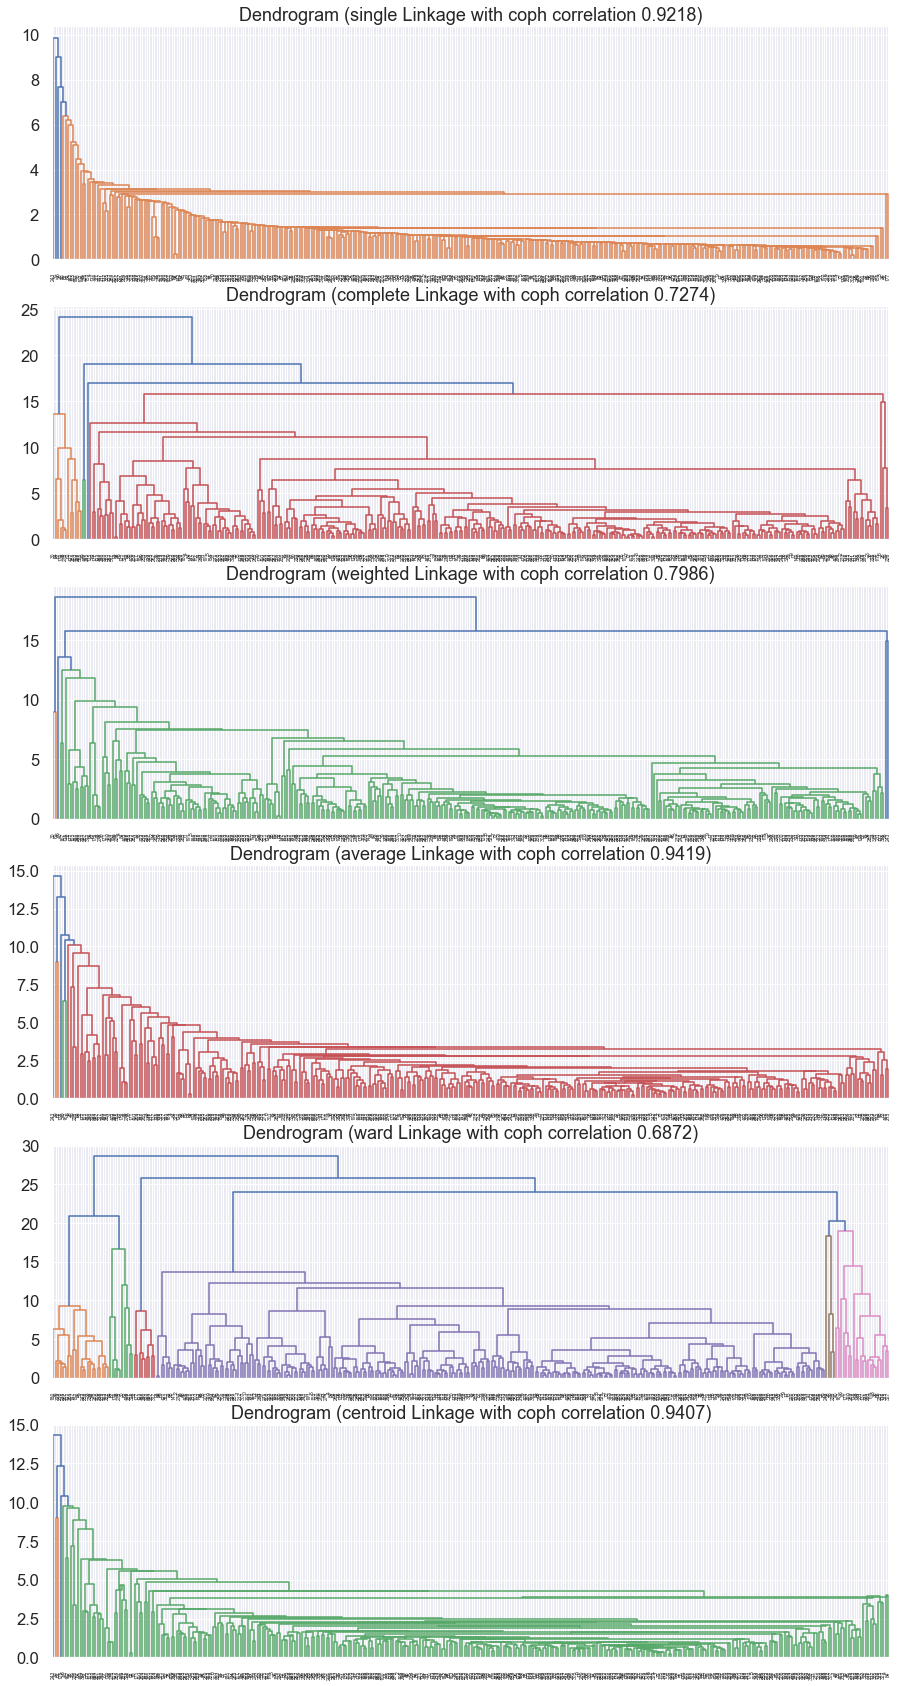

<IPython.core.display.Javascript object>

In [271]:
%%time
# list of linkage methods for euclidean distance
linkage_methods = ["single", "complete", "weighted", "average", "ward", "centroid"]

# lists to save results of cophenetic correlation calculation
result_cols = ["Linkage", "Cophenetic Coefficient"]
result = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))


# plotting different dendrogram for euclidean distance and different linkage to calculate cophenet correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaler_HC, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
 
    c, coph_dist = cophenet(Z, pdist(df_scaler_HC))
    axs[i].set_title(f"Dendrogram ({method} Linkage with coph correlation {c:0.4f})")
    
    result.append([method, c])

In [272]:
# Storing the results for different linkage methods
RC = pd.Series(result)
RC_df = RC.to_frame()
RC_df

0
0     [single, 0.921815338882465]
1   [complete, 0.727445741516206]
2  [weighted, 0.7986178336443547]
3   [average, 0.9418566735330262]
4      [ward, 0.6872357398216056]
5  [centroid, 0.9406999214356025]

<IPython.core.display.Javascript object>

#### Dendrograms different types of distance

Wall time: 716 ms


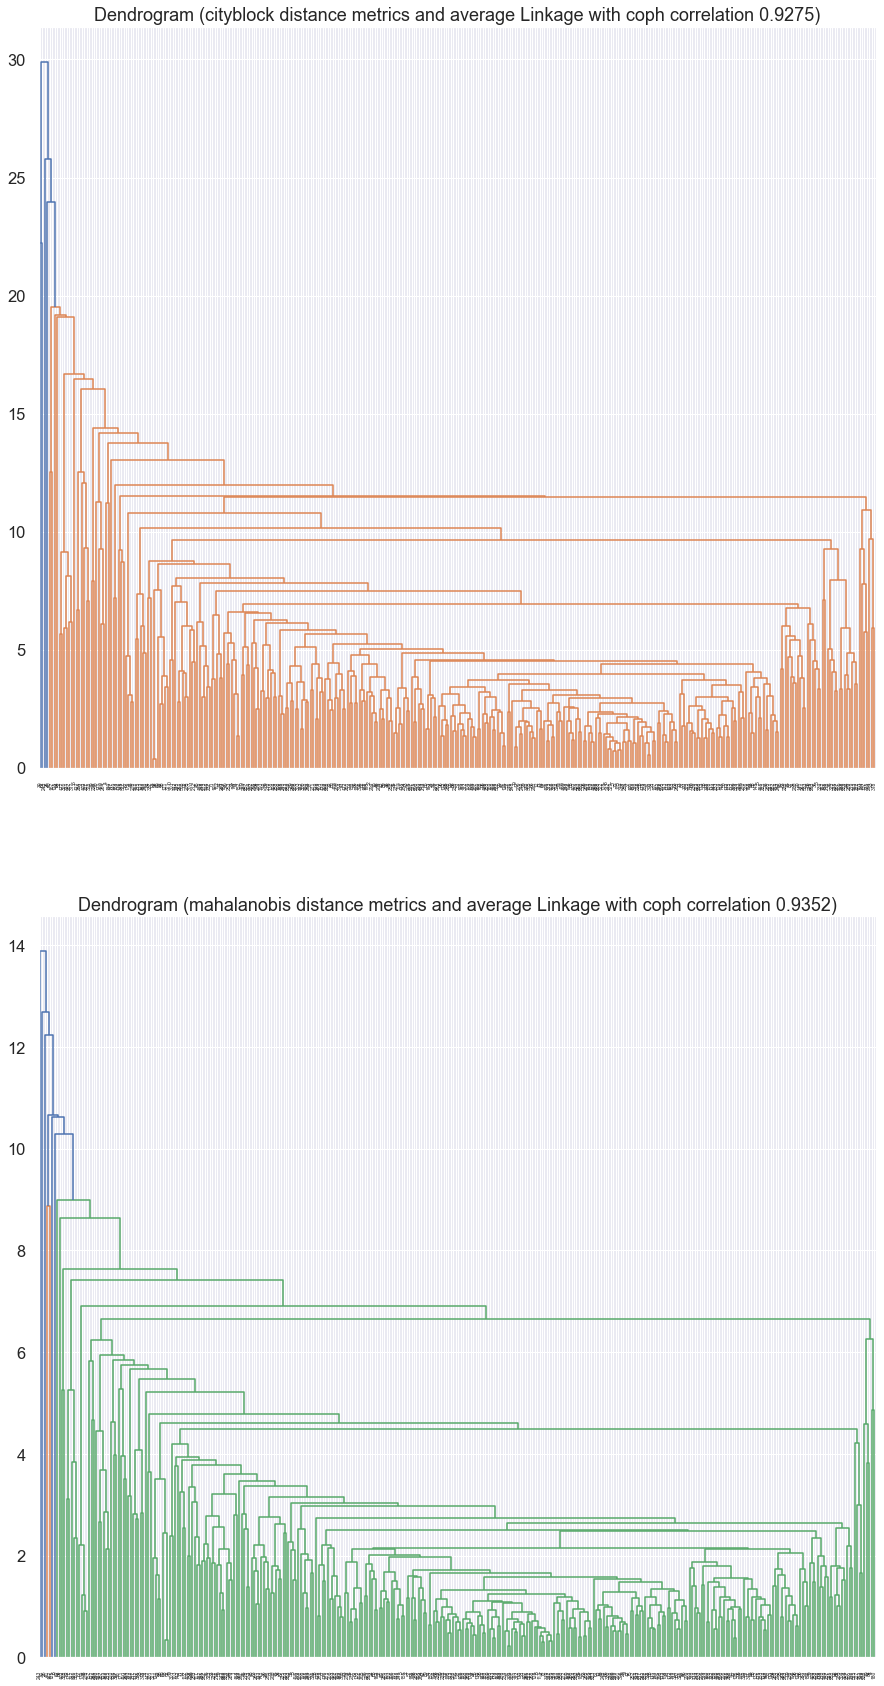

<IPython.core.display.Javascript object>

In [273]:
%%time
# list of distance metrics to check the best clustering parameters
distance_metrics = ['cityblock', 'mahalanobis'] 


# lists to save results of cophenetic correlation calculation
result_cols = ["distance", "Cophenetic Coefficient"]
result2 = []

# to create a subplot image
fig, axs = plt.subplots(len(distance_metrics), 1, figsize=(15, 30))


# plotting different dendrogram for euclidean distance and different linkage to calculate cophenet correlation
for i, metrics in enumerate(distance_metrics):
    Z = linkage(df_scaler_HC, metric=metrics, method='average')

    dendrogram(Z, ax=axs[i])
 
    c, coph_dist = cophenet(Z, pdist(df_scaler_HC))
    axs[i].set_title(f"Dendrogram ({metrics} distance metrics and average Linkage with coph correlation {c:0.4f})")
    
    result2.append([method, c])

In [274]:
# Storing the results for different distances metrics and average linkage method
RC2 = pd.Series(result2)
RC2_df = RC2.to_frame()
RC2_df

0
0  [centroid, 0.9275227827244084]
1  [centroid, 0.9351741163827868]

<IPython.core.display.Javascript object>

**Dendrograms with Manhattan distance to decrease outliers' effect**

Wall time: 1.06 s


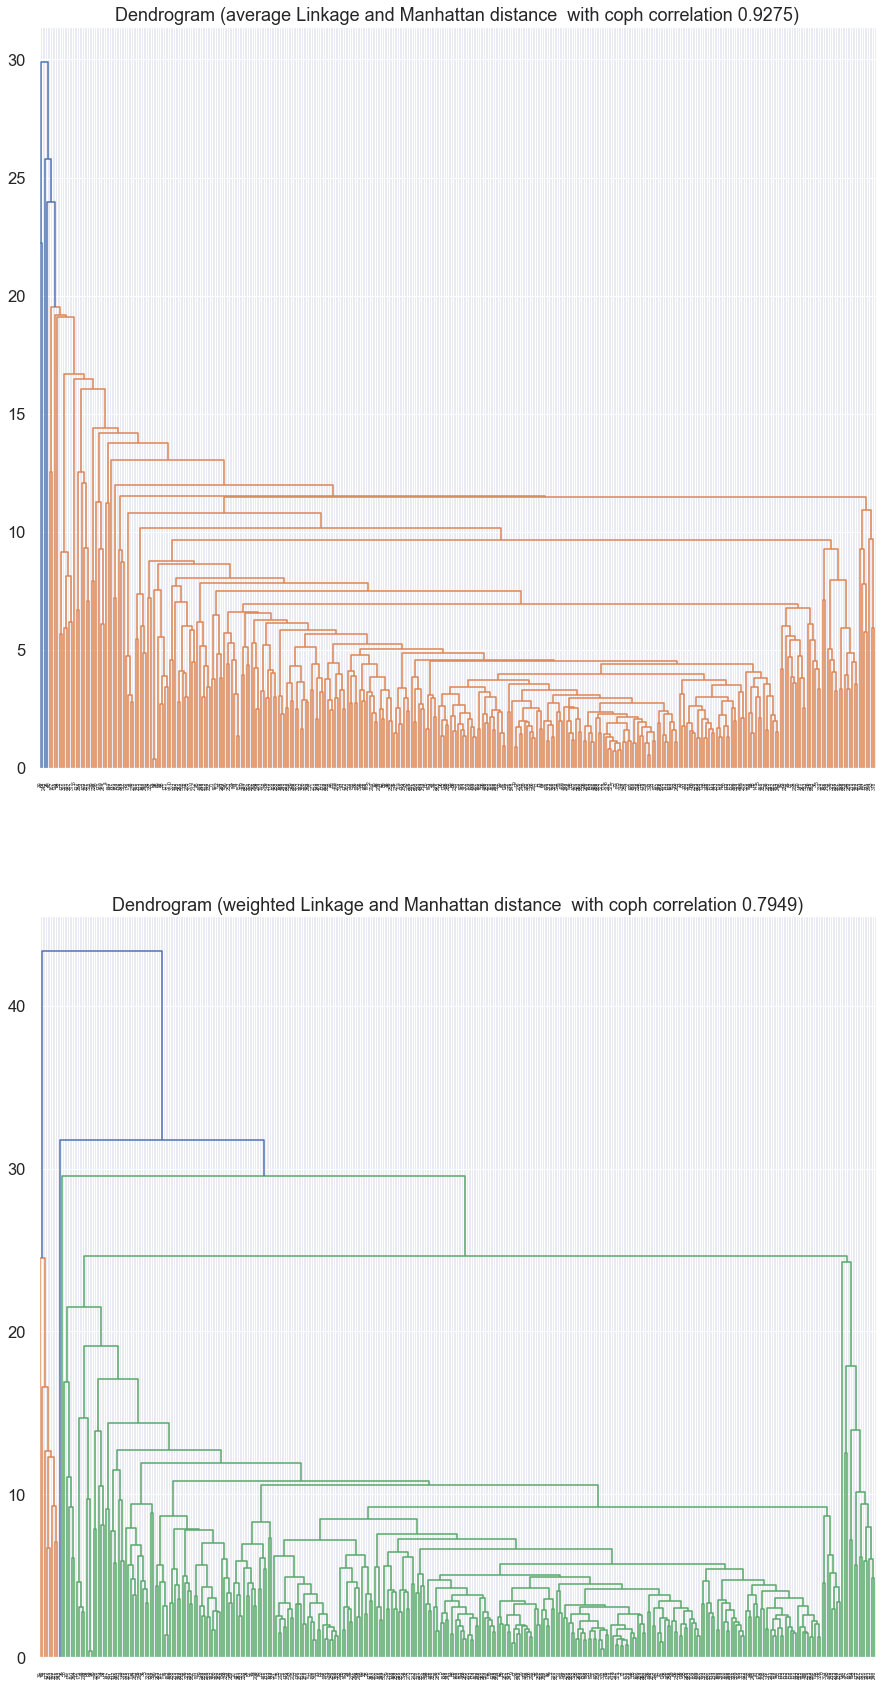

<IPython.core.display.Javascript object>

In [275]:
%%time
# list of linkage method to check the best clustering parameters
linkage_method = ['average','weighted'] 


# lists to save results of cophenetic correlation calculation
result_cols = ["distance", "Cophenetic Coefficient"]
result2M = []

# to create a subplot image
fig, axs = plt.subplots(len(distance_metrics), 1, figsize=(15, 30))


# plotting different dendrogram for Manhattan distance and different linkage to calculate cophenet correlation
for i, methods in enumerate(linkage_method):
    Z = linkage(df_scaler_HC, metric='cityblock', method=methods)

    dendrogram(Z, ax=axs[i])
 
    c, coph_dist = cophenet(Z, pdist(df_scaler_HC))
    axs[i].set_title(f"Dendrogram ({methods} Linkage and Manhattan distance  with coph correlation {c:0.4f})")
    
    result2M.append([methods, c])

In [276]:
# Storing the results for Manhattan distance metrics and average and weighted linkage
RCM = pd.Series(result2M)
RC2M_df = RCM.to_frame()
RC2M_df

0
0   [average, 0.9275227827244084]
1  [weighted, 0.7949470728118442]

<IPython.core.display.Javascript object>

**Observations**

- The highest cophenetic correlation is for average linkage but ward linkage method is showing better defined clusters.
- The dendrograms for distance metrics Manhattan and Mahalanobis did not give better results in term of cophenetic correlation than average linkage and still the clusters do not seem to be clearly defined.
- Ward method seems to be the best for clustering.
- For Ward method and Euclidean distance, the model gives us the best  defined clusters, but we need to sacrifice in terms of cophenetic correlation.
- Manhattan distance and weighted linkage has better cophenetic correlation and also show relatively well-defined clusters. 
- Sklearn AgglomerativeClustering does not support weighted linkage so Ward method with euclidean distance seem to be the most practical option as well. 


### 6.2 Choosing the Hierarchical clustering model with 4 clusters

#### Chosing the number of cluster by using Silhouette score for each model

In [277]:
%%time
sil_score_list=[]# creating an empty list to store all silhouette_scores
cluster_list=list(range(2,8))# creating number of clusters from 2 to 4
#creating a for loop to calculate silhouette score based on number of cluster provided
for number_clusters in cluster_list:
    clusterer=AgglomerativeClustering(n_clusters=number_clusters,affinity="euclidean", linkage="ward")
    prediction=clusterer.fit_predict(df_scaler_HC)# assign data to different clusters
    sil_score = silhouette_score(df_scaler_HC, prediction)#calculate silhuette score per cluster
    sil_score_list.append(sil_score)#add silhuette scoring to the empty list
    print(f'For number of clusters {number_clusters} the silhuette score is {sil_score}')

For number of clusters 2 the silhuette score is 0.40334243954115184
For number of clusters 3 the silhuette score is 0.4201414527024113
For number of clusters 4 the silhuette score is 0.4317598167540387
For number of clusters 5 the silhuette score is 0.37315154196838957
For number of clusters 6 the silhuette score is 0.379118637942203
For number of clusters 7 the silhuette score is 0.38348950634747164
Wall time: 70 ms


<IPython.core.display.Javascript object>

In [278]:
# creating dataframe to plot sil scores
S=pd.Series(sil_score_list)
sil_score_df=S.to_frame()
sil_score_df['K']=range(2,8)
sil_score_df['Sil_score']=S


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Silhouette score per number of clusters')

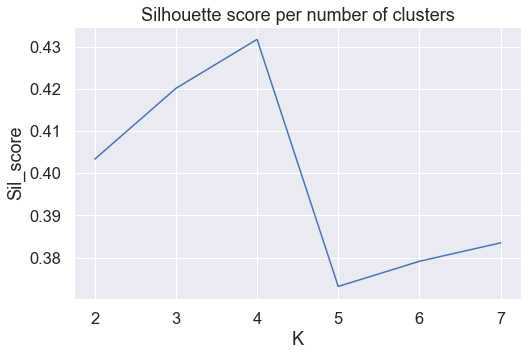

<IPython.core.display.Javascript object>

In [279]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=sil_score_df, x="K", y="Sil_score")
plt.title("Silhouette score per number of clusters")

- The optimal number of clusters for Euclidean distance and ward linkage is 4 so we are going to build 4 clusters by using agglomerative clustering.

In [280]:
# fitting the Hierarchical model for 4 clusters, euclidean distance and ward linkage method
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(df_scaler_HC)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [281]:
# copying original data set without P/E Ratio
df2 = df.copy()
df2 = df2.drop("P/E Ratio", axis=1)

<IPython.core.display.Javascript object>

In [282]:
# Assigning clusters to each  security of the scaled data set
df_scaler_HC["stock_type"] = HCmodel.labels_

# Assigning clusters to each  security of the original data set
df2["stock_type"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [283]:
df2.sample(5, random_state=1)

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production         32.000       -15.478   
125        Internet Software & Services        104.660        16.224   
11                                REITs         40.030         7.579   
248                   Personal Products         79.410        10.661   
238  Oil & Gas Exploration & Production         67.610         0.865   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102       2.924  205          70      830000000 -14454000000   
125       1.321    8         958      592000000   3669000000   
11        1.163   15          47       21818000    248710000   
248       0.806   17         129      160383000    636056000   
238       1.590   32          64     -588000000  -7829000000   

     Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
102             -35.550                 406582278.500      1.786   
125               1.310                2800763359.000      5.884   
11                1.520                 163625000.000     -1.269   
248               3.280                 491391569.000     -2.257   
238             -10.230                 765298142.700      3.345   

     P/E_ratio_new  stock_type  
102         -0.900           0  
125         79.893           1  
11          26.336           3  
248         24.210           3  
238         -6.609           0

<IPython.core.display.Javascript object>

### 6.3 Cluster profiling

In [284]:
# creating a data set to separate the data among clusters by mean values
cluster_profile2 = df2.groupby("stock_type").mean()
# creating a data set to separate the data among clusters by median values
cluster_profile2_med = df2.groupby("stock_type").median()

<IPython.core.display.Javascript object>

- Because of the great amount of outliers, the median values are more representative of the distribution, so we are using them for profile analysis.

In [285]:
# Checking number of securities in each cluster
cluster_profile2["count_stock"] = (
    df2.groupby("stock_type")["Current Price"].count().values
)
# Checking number of securities in each cluster for median values frame
cluster_profile2_med["count_stock"] = (
    df2.groupby("stock_type")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [286]:
# showing profiles summary by using the mean values
cluster_profile2.T.style.highlight_max(color="cyan", axis=1)

<IPython.core.display.Javascript object>

In [287]:
# Showing profiles by using median values
cluster_profile2_med.T.style.highlight_max(color="pink", axis=1)

<IPython.core.display.Javascript object>

#### Cluster visualization on Scaled data

In [288]:
# list of variable to visualize clustes
list_df_Scaler_HC = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/B Ratio",
    "P/E_ratio_new",
]

<IPython.core.display.Javascript object>

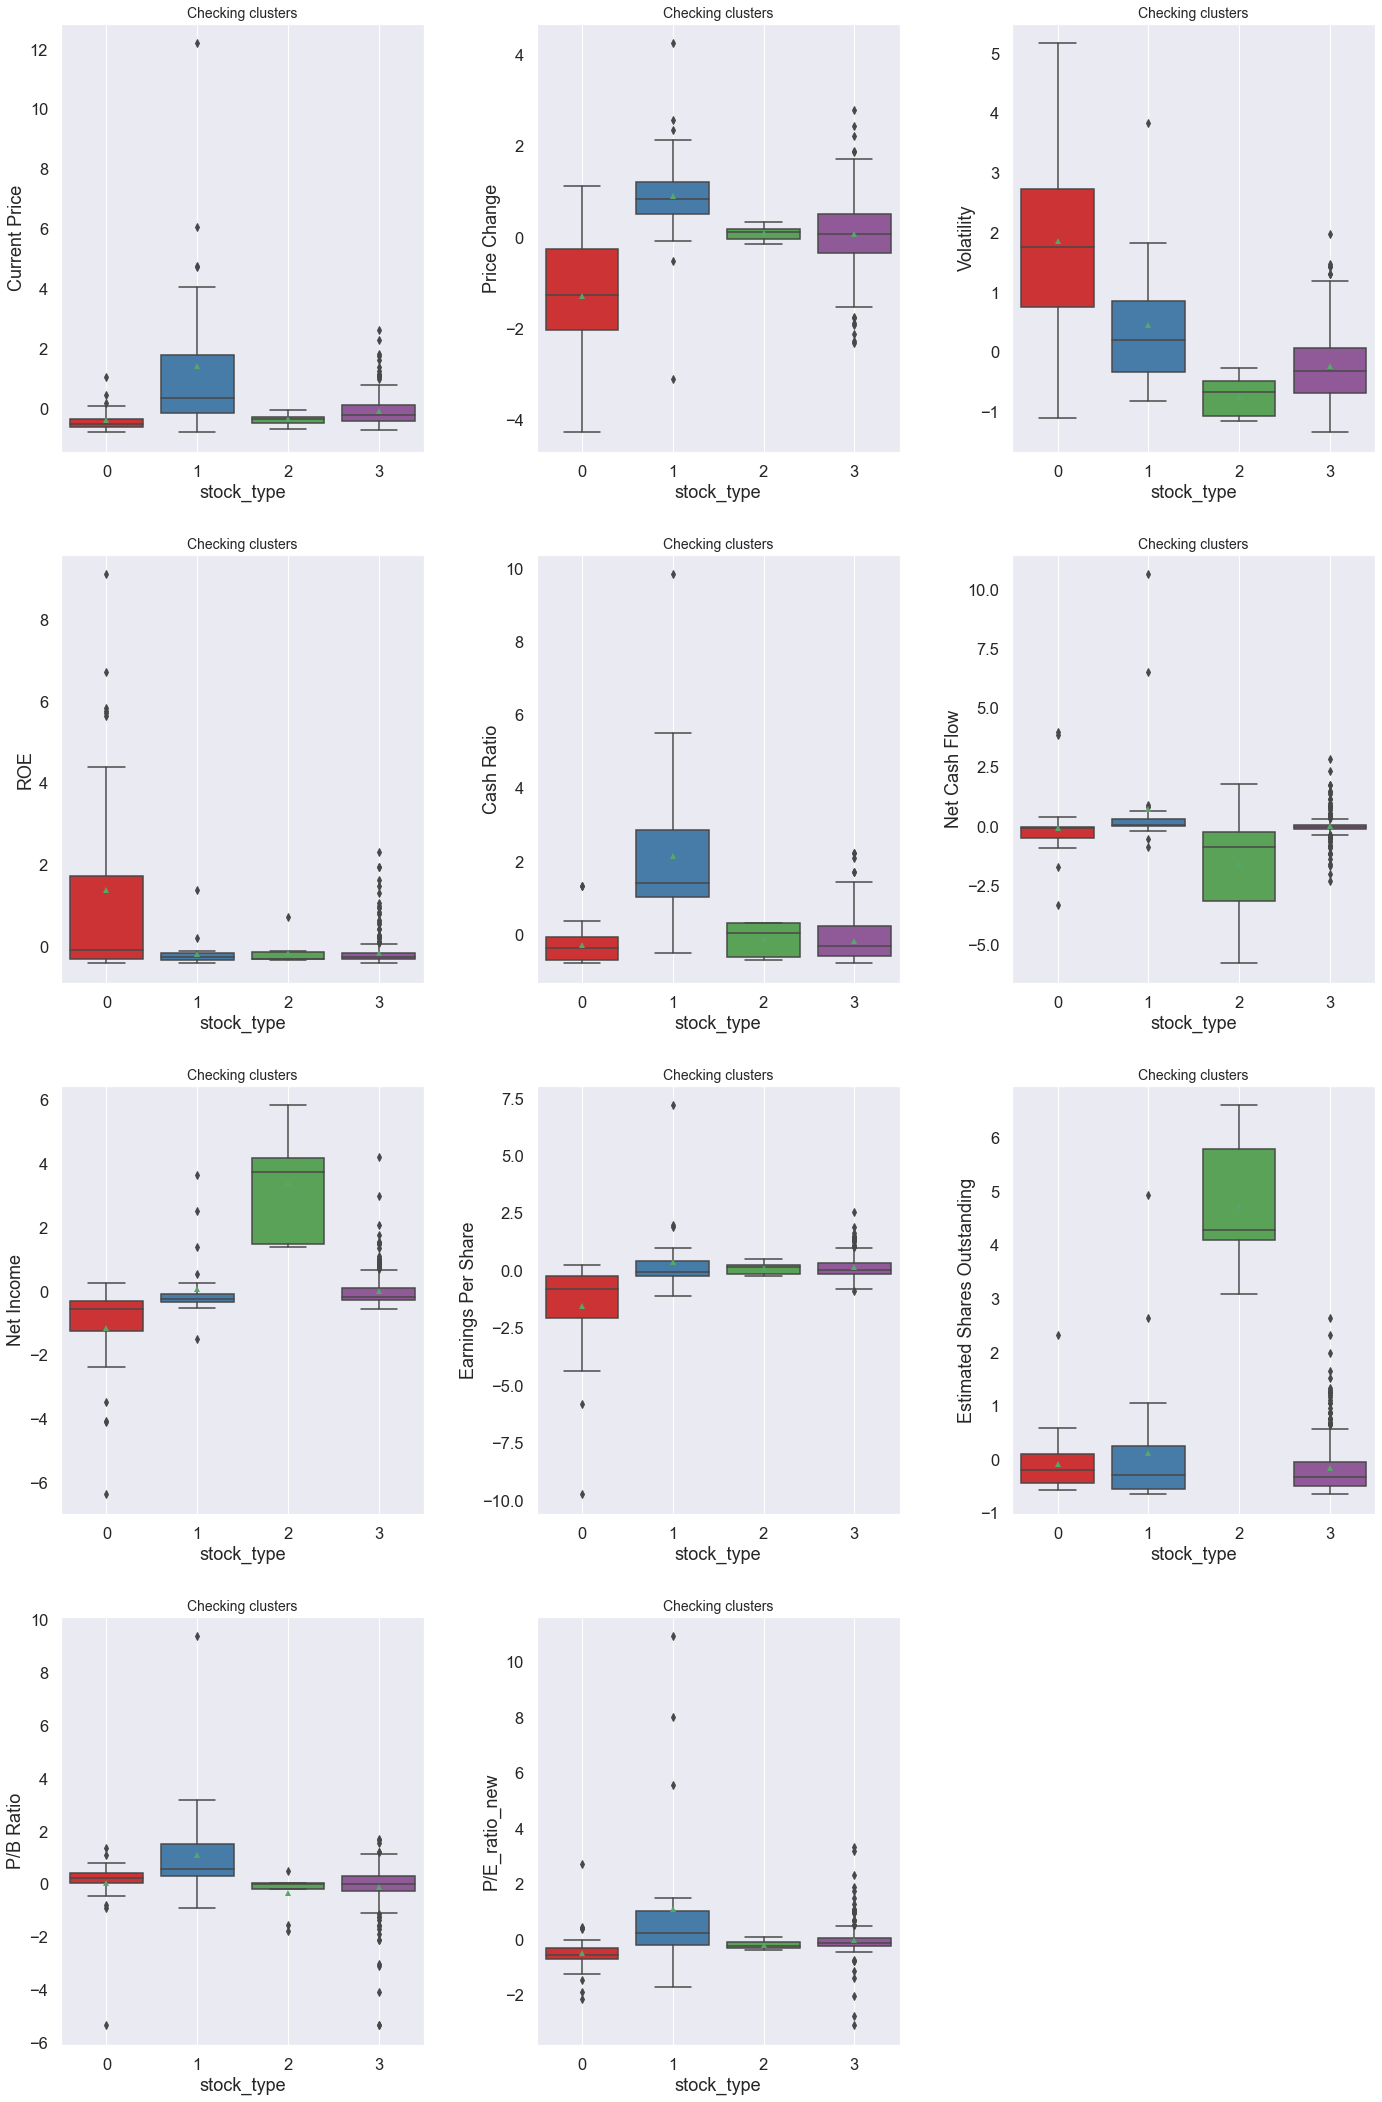

<IPython.core.display.Javascript object>

In [289]:
plt.figure(figsize=(20, 30))  # setting size of plot
# creating subplots with a boxplot per variable

for i, col in enumerate(list_df_Scaler_HC):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df_scaler_HC,
        y=df_scaler_HC[col],
        x=df_scaler_HC["stock_type"],
        palette="Set1",
        showfliers=True,
        showmeans=True,
    )
    plt.tight_layout(pad=2)  # addint space between plots
    plt.title("Checking clusters", fontdict={"fontsize": 14})  # add title
    plt.grid()
    plt.show

In [290]:
### Visualizing cluster in the original data set

<IPython.core.display.Javascript object>

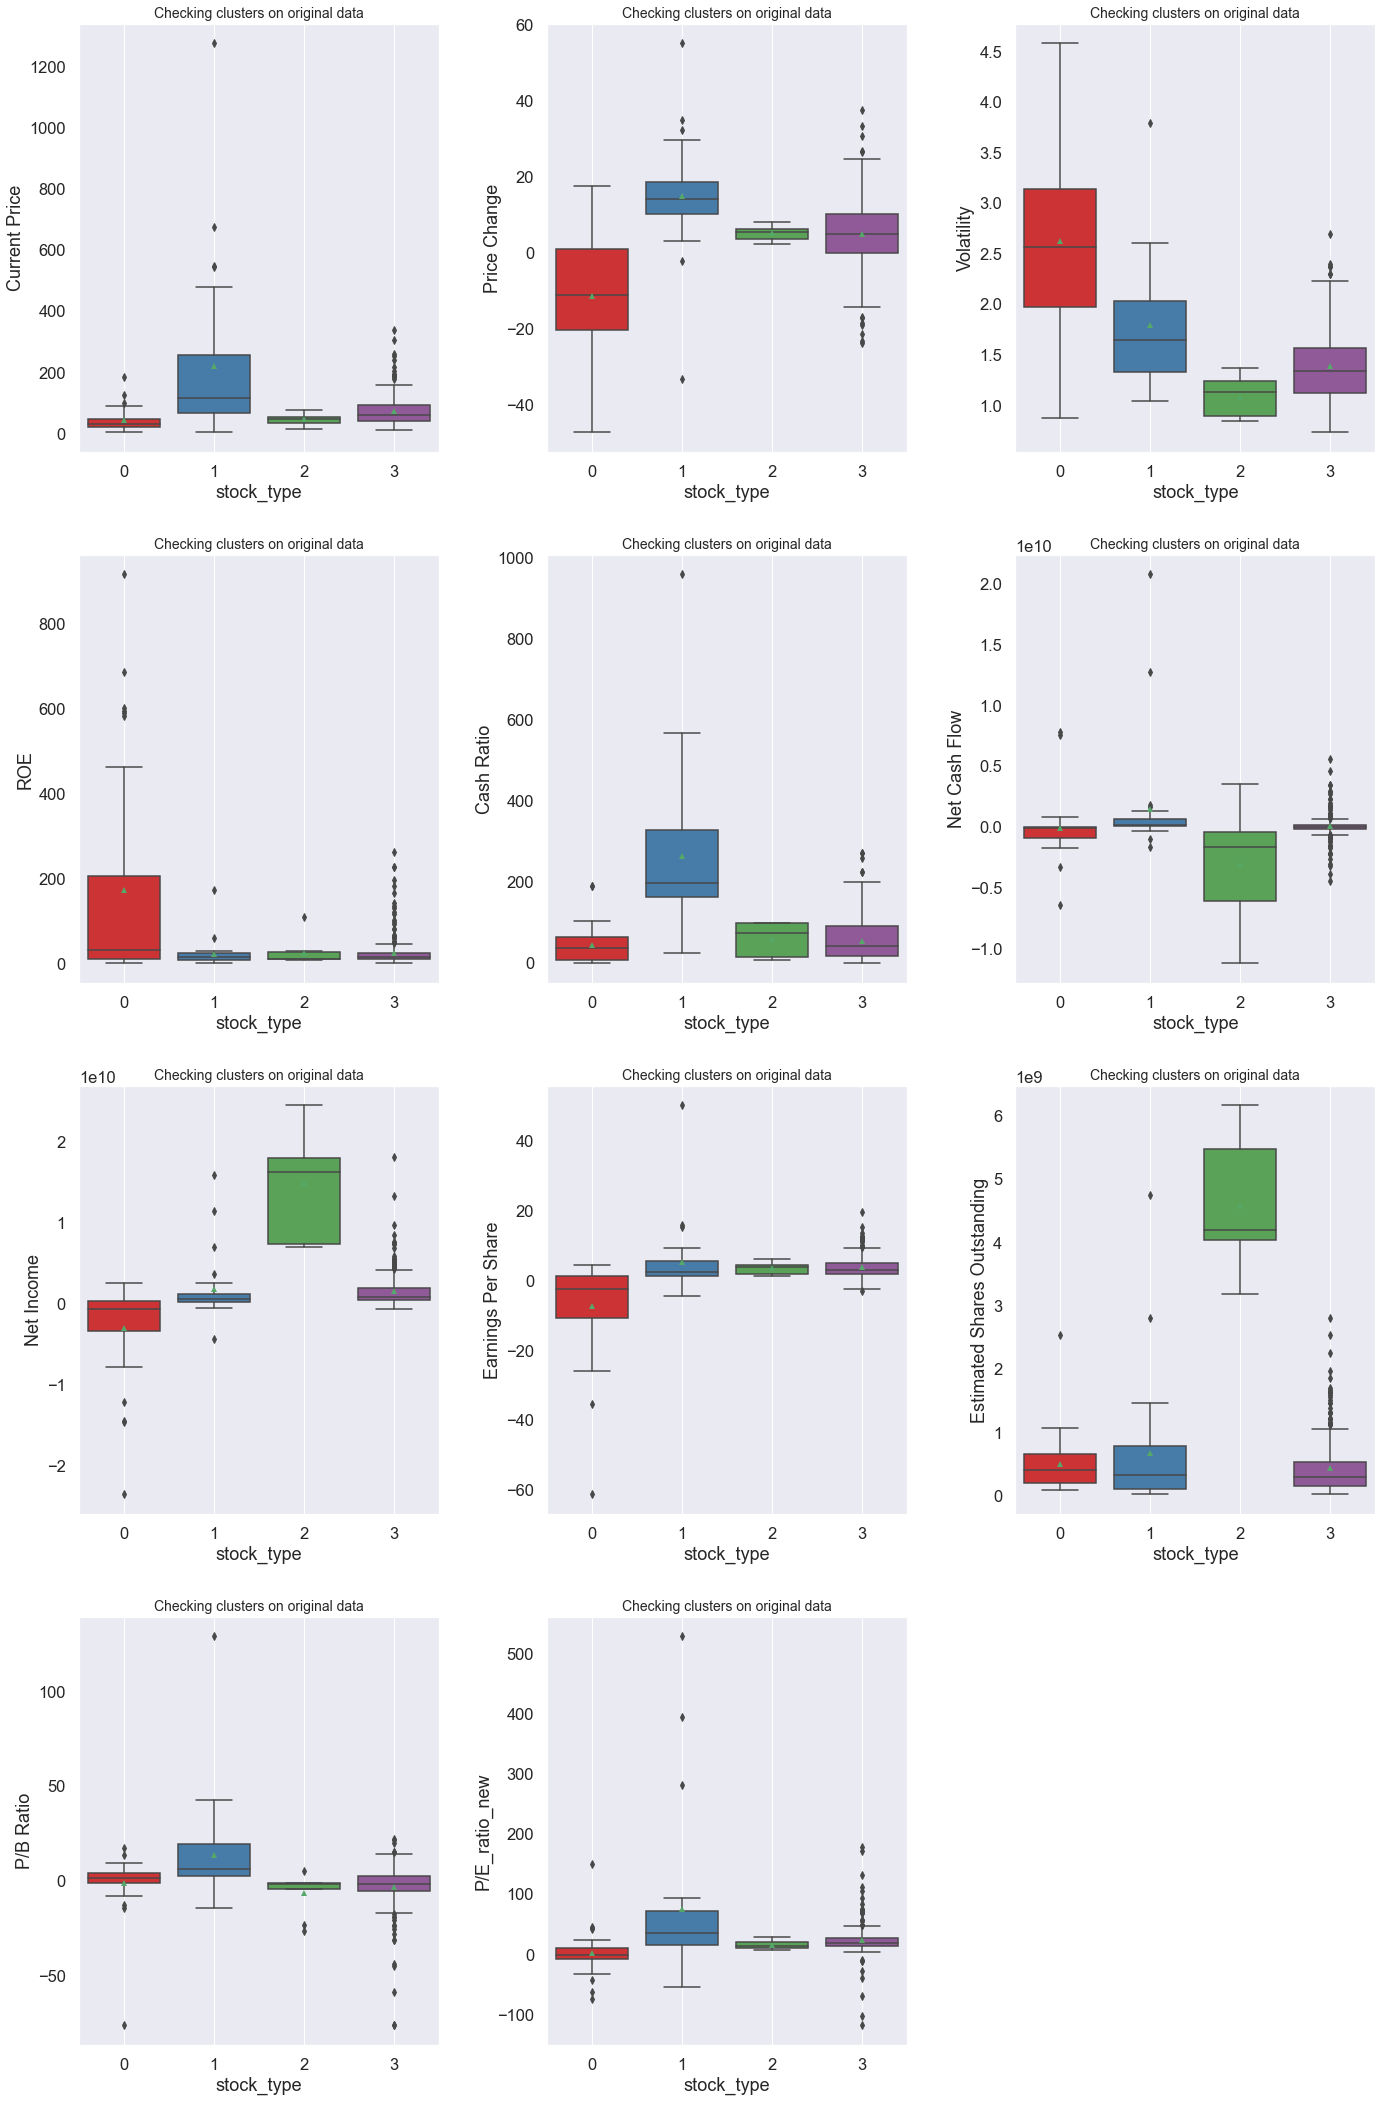

<IPython.core.display.Javascript object>

In [291]:
plt.figure(figsize=(20, 30))  # setting size of plot
# creating subplots with a boxplot per variable

for i, col in enumerate(list_df_Scaler_HC):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df2, y=df2[col], x=df2["stock_type"], palette="Set1", showmeans=True,
    )
    plt.tight_layout(pad=2)  # addint space between plots
    plt.title(
        "Checking clusters on original data", fontdict={"fontsize": 14}
    )  # add title
    plt.grid()
    plt.show

In [292]:
# CLUSTER0
df2[df2["stock_type"] == 0].sample(3, random_state=1)

Ticker Symbol            Security  GICS Sector  \
153           HES    Hess Corporation       Energy   
216           MRO  Marathon Oil Corp.       Energy   
33           ARNC         Arconic Inc  Industrials   

                      GICS Sub Industry  Current Price  Price Change  \
153                Integrated Oil & Gas         48.480        -4.586   
216  Oil & Gas Exploration & Production         12.590       -20.266   
33                  Aerospace & Defense          7.399         1.648   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
153       2.399   16         103      272000000 -3056000000   
216       3.325   12          71    -1177000000 -2204000000   
33        2.592    3          37       42000000  -322000000   

     Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
153             -10.780                 283487940.600      6.265   
216              -3.260                 676073619.600      1.274   
33               -0.310                1038709677.000      2.640   

     P/E_ratio_new  stock_type  
153         -4.497           0  
216         -3.862           0  
33         -23.867           0

<IPython.core.display.Javascript object>

In [293]:
# CLUSTER1
df2[df2["stock_type"] == 1].sample(3, random_state=1)

Ticker Symbol                          Security  \
226          NFLX                      Netflix Inc.   
137           FTR           Frontier Communications   
225           NEM  Newmont Mining Corp. (Hldg. Co.)   

                     GICS Sector                       GICS Sub Industry  \
226       Information Technology            Internet Software & Services   
137  Telecommunications Services  Integrated Telecommunications Services   
225                    Materials                                    Gold   

     Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
226        114.380        11.146       2.606    6          65      695722000   
137          4.670        -2.301       2.027    3         496      254000000   
225         17.990        10.844       2.536    2         198      379000000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
226   122641000               0.290                 422900000.000     -5.700   
137  -196000000              -0.290                 675862069.000     10.498   
225   220000000               0.430                 511627907.000      6.972   

     P/E_ratio_new  stock_type  
226        394.414           1  
137        -16.103           1  
225         41.837           1

<IPython.core.display.Javascript object>

In [294]:
# CLUSTER2
df2[df2["stock_type"] == 2].sample(3, random_state=1)

Ticker Symbol                Security                  GICS Sector  \
331           XOM       Exxon Mobil Corp.                       Energy   
177           JPM    JPMorgan Chase & Co.                   Financials   
317            VZ  Verizon Communications  Telecommunications Services   

                          GICS Sub Industry  Current Price  Price Change  \
331                    Integrated Oil & Gas         77.950         3.657   
177                                   Banks         66.030         8.033   
317  Integrated Telecommunications Services         46.220         6.277   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
331       1.370    9           7     -911000000  16150000000   
177       1.130   10          99    -7341000000  24442000000   
317       0.843  109          14    -6128000000  17879000000   

     Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
331               3.850                4194805195.000     -2.706   
177               6.050                4040000000.000     -1.887   
317               4.380                4081963470.000    -26.381   

     P/E_ratio_new  stock_type  
331         20.247           2  
177         10.914           2  
317         10.553           2

<IPython.core.display.Javascript object>

In [295]:
# CLUSTER3
df2[df2["stock_type"] == 3].sample(3, random_state=0)

Ticker Symbol                Security             GICS Sector  \
271            SE    Spectra Energy Corp.                  Energy   
321           WHR         Whirlpool Corp.  Consumer Discretionary   
252           PNC  PNC Financial Services              Financials   

                                   GICS Sub Industry  Current Price  \
271  Oil & Gas Refining & Marketing & Transportation         23.940   
321                             Household Appliances        146.870   
252                                            Banks         95.310   

     Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
271        -9.898       2.031    3           6       -2000000   196000000   
321        -0.231       2.398   17          10     -254000000   783000000   
252         6.994       1.121    9          99     -295000000  4106000000   

     Earnings Per Share  Estimated Shares Outstanding  P/B Ratio  \
271               0.290                 675862069.000     -2.580   
321               9.950                  78693467.340    -45.086   
252               7.520                 546010638.300     -0.694   

     P/E_ratio_new  stock_type  
271         82.552           3  
321         14.761           3  
252         12.674           3

<IPython.core.display.Javascript object>

**Observations**:

-**Cluster 0- high-risk investment**:

- For this group, current price is the lowest and the priced decreased during the last 13 days.
- This type of securities are the ones with the highest volatility; values change from 2 to 3.
- ROE ratio varies widely among the group, but it shows higher median value (32 per cent) of all clusters.
- This group shows the low cash ratio, 37 per cent. They are able to cover only the 37 percent of their short-term liabilities with their cash inflow.
- Negative net income, (median value -713 million dollars), and negative cash flow.
- Earning per share is also negative, with a median value of -2.4.
- Moderate number of share outstanding, around 4 million shares.
- P/B ratio, price over book value is 1.2 for this group.
- P/E is negative for this cluster with a median value of -1.7.
- Energy and oil companies are mostly the ones in this group of 33 securities.

    
    
-**Cluster 1- Leading investments:**

- This cluster shows the highest share prices, and the ones with greatest increase in the last 13 days.
- Volatility is moderate for this group with a medium value of 1.6.
- Return over equity is the second highest (14.5 for the group).
-  Cash ratio is he highest, with a median value of 190 percent, so liquidity for this group companies doubles the amount needed to cover short-term liabilities.
- Net cash flow is also the highest, with almost 160 million dollars as median cash follow value.
- Net income is the third highest one If compare with other clusters.
- low earning per share (2.3) and moderate number of estimated shares outstanding.
- Highest P/B value (price over book value is 6 in average).
- highest P/E ratio with a median number of 34.
- There are 26 securities in the clusters that belong to companies such as Netflix, Amazon, Vertex, Priceline, Facebook, Alliance, Bank of America.

    
-**Cluster 2-  Conservative investments with higher earning per share:**

- For the cluster2, the median price is 46 per share, and the price increase slightly in the last 13 days (5 per cent).
- These securities are the ones that show less volatility with number around 1.
- Median ROE is 11 per cent and median cash ratio is 74 percent (they can cover 74 per cent of their short-term liabilities).
- Negative Cash flow is one of the main attributes of this group, with a median value of -1649 Million dollars, but it varies significantly among the cluster.
- Net income is the highest of all groups, as well as earning per share with 3.8 per cent as median value.
- This group counts with the biggest number of shares, 4194 million of shares in average.
- Lowest P/B ratio with -1.88 as median value for the cluster.
- Median P/E ratio is 13 for this cluster.
- We can count with 9 securities in this cluster, most of them related to telecommunication and financial institutions such as Citygroup, Verizon, Wells Fargo and AT&T.

    
-**Cluster 3 -Conservative investments with moderate earning per share:**


- Cluster 3 median price is 46 per share, and the price increase slightly in the last 13 days (4.8 per cent).
- These securities have associated low volatility or low risk (median cluster volatility 1.33).
- Median ROE is 15 per cent and median cash ratio is 42 percent (they can cover less than the half their short-term liabilities).
- Median Cash flow is 2.8 million dollars for this group and earning per share 3.07 dollars.
- Net income is around 780 million dollars.
- This group counts with moderate number of shares, 290 million of shares in average.
- Low P/B ratio with -1.5 as median value.
- Second highest median P/E ratio (18).
- This cluster contains 272 securities, that can be mostly defined  as conservative investments. We can find all types of industries in this cluster. Some of the securities are Paypal, Phillips, Marriott internationals, Afflac or Phillip Morris International.



## 7. K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.


#### Summary comparison: 

- The below summary table compares the K-Mean method with 3 clusters and Euclidean distance, and Hierarchical clustering method using ward linkage and Euclidean distance.




| Clustering method |  K-Mean         | Hierarchical          |
|-------------------|-----------------|-----------------------|
|Time needed        | 2.5 seconds     |5 seconds              |
|-------------------|-----------------|-----------------------|
|Number clusters    | 3               |4                      |
|-------------------|-----------------|-----------------------|
|Number observations|cluster0:14      |cluster0:33            |
|                   |cluster1:300     |cluster1:26            |
|                   |cluster2:26      |cluster2:9             |
|                   |                 |cluster3:272           |
|-------------------|-----------------|-----------------------|                   
|Score              | Sil_coeff:0.43  | Coph_coeff:0.68       |
| |                 |                       |
|-------------------|-----------------|-----------------------|
|Better defined     |                 |                       |
|clusters           |  No             |    yes                |
|-------------------|-----------------|-----------------------|
|simplicity         |  yes            |    No                 |

- K-Mean clustering with Euclidean distance was computationally less expensive than the Hierarchical clustering.
- The number of clusters defined by each model was different: optimal number of clusters for K-Mean model was 3 while for Hierarchical technique the best number of clusters was 4.
- High Silhouette score is used as indicator of good clustering for K-Means technique, the closest to one the better the score.
- Cophenetic correlation coefficient is used to measure how good Hierarchical model performs, the closest to one, the better the model.
- K-Mean Silhouette score was 0.43 out (maximum possible score is 1) while Hierarchical model scored higher cophenetic coefficient was 0.68 (maximum possible score is 1).
- Profiling with K-mean was easier because we used only three clusters: ‘leading market investments', 'conservative investments' and 'high risk investment'. The clusters were not extremely well defined as the silhouette visualizer showed. Some data appeared on the negative area indicating that they may be assigned to the wrong cluster. 
- Profiling with Hierarchical clustering was more tedious because the clusters were not perfectly defined but we managed to differentiate four groups: ‘Leading markets investments', 'High risk investment' and two kinds of conservative investments: ‘conservative investments with higher earnings per share' and 'conservative investments with moderate earning per share'.
-The profiles for k-Means and Hierarchical were very similar for risk investments mostly associated to energy and oil industry and leading market investments, associated to growing companies in the technology and biomedical sector.
- It seems that the ‘conservative investment' cluster created by K-means clustering technique correspond with the addition of both types of conservative investments created by Hierarchical model.
- Hierarchical clustering managed to distinguish moderate earning and high earning per share within the conservative investments.


## 8. Actionable Insights and Recommendations


- A good investing strategy should be based on a diversified investment portfolio in order to fight the overall risk of the markets.
- It is extremely important for Trade&Ahead consultancy firm to identify the risk of each security to be able to perform a correct analysis and risk management for each of its clients.
- Hierarchical clustering was used to group the overall stock portfolio in four clusters based on risk(volatility), net income, price, cash ratio and price to earnings ratio, Return per equity and industry among other indicators:


- **Cluster 0- high-risk investment:**
- We have 33 securities in this clusters, most of them belong to the energy and oil industry. The market is volatile and risky. At the moment earning per share is negative so the current price is low.
- This type of security may be lucrative in short term, so it is the moment to invest and sell when the market improves.
- Investors that tolerate high risk or are savvy investors can benefit for this type of stocks, they do not mind to deal with risk in order to grow their investments.


- **Cluster 1- Leading investments:**
- This group of securities is a good investment for long or mid-term investment. Their price is high, but we have expectation of continue growing. These stocks belong to the leading companies in the market so even if the customer buy at a current high price, the stock value is expected to hold along time even though volatility is moderate, and P/E may indicate some of the stocks are overvalued. 
- Balanced Investors strikes balance between safe and risky. This type of investment would be a good fit for them.


- **Cluster 2- Conservative investments with higher earnings per share:**

- This cluster holds the most conservative investments, the ones with lowest prices and high net income, most of them belong to the financial industry or mature economic sectors.
- Mostly, this time of stocks are good for customers that appreciate liquidity and do not tolerate risk well at all. Allocations from conservative investors near retirement that need to preserve their investments may be looking to invest on cluster2 shares.


- **Cluster 3 -Conservative investments with moderate earning per share:**

- Most of the securities belong to this group so we can find stock for different industries.The price of this shares is on the lowest side but not as low as cluster 2 stocks. The return per equity is higher than for the cluster 2 as well as earning per share.  
- These securities are good option for people that do not want to take high risks but still want to have the opportunity to grow their saving in the mid-term or long-term. Since volatility is higher there is more room to create more wealth. 
- Clients  that are looking to grow their investment and follow a conservative approach can look into these type of securities with a bit more of  price volatility  and potential to grow their saving quicker.
